In [10]:
#Start from pollution_nightlight_df and work on the data manipulation and correlation models

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from gadm import GADMDownloader
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from itertools import combinations

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
cleaned_pollution_nightlight_data = pd.read_csv("cleaned_pollution_nightlight_data.csv")

In [13]:
#EDA of pollution data


In [14]:
cleaned_pollution_nightlight_data.head()

,District,matched_district_name,NAME_1,NAME_2,latitude,longitude,district_centroid,1_Closest_Station,1_Distance,2_Closest_Station,...,year,state_name,district_name,viirs_annual_min,viirs_annual_max,viirs_annual_mean,viirs_annual_sum,viirs_annual_num_cells,pc11_pca_tot_p,pc11_pca_no_hh
0,Agra,Agra,Uttar Pradesh,Agra,27.007505,78.062924,POINT (78.06292448694016 27.00750514448138),1126,19.888379,1125,...,2013.0,uttar pradesh,agra,0.0,60.754906,1.922315,42942.593750,22339.0,4418797.0,710566.0
1,Agra,Agra,Uttar Pradesh,Agra,27.007505,78.062924,POINT (78.06292448694016 27.00750514448138),1126,19.888379,1125,...,2015.0,uttar pradesh,agra,0.0,50.201164,1.935065,43227.419922,22339.0,4418797.0,710566.0
2,Agra,Agra,Uttar Pradesh,Agra,27.007505,78.062924,POINT (78.06292448694016 27.00750514448138),1126,19.888379,1125,...,2012.0,uttar pradesh,agra,0.0,68.892418,1.656543,37005.507812,22339.0,4418797.0,710566.0
3,Agra,Agra,Uttar Pradesh,Agra,27.007505,78.062924,POINT (78.06292448694016 27.00750514448138),1126,19.888379,1125,...,2017.0,uttar pradesh,agra,0.0,65.482452,2.603362,58156.494141,22339.0,4418797.0,710566.0
4,Agra,Agra,Uttar Pradesh,Agra,27.007505,78.062924,POINT (78.06292448694016 27.00750514448138),1126,19.888379,1125,...,2014.0,uttar pradesh,agra,0.0,57.359678,1.975266,44125.472656,22339.0,4418797.0,710566.0


In [15]:
cleaned_pollution_nightlight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 52 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   District                        829 non-null    object 
 1   matched_district_name           829 non-null    object 
 2   NAME_1                          829 non-null    object 
 3   NAME_2                          829 non-null    object 
 4   latitude                        829 non-null    float64
 5   longitude                       829 non-null    float64
 6   district_centroid               829 non-null    object 
 7   1_Closest_Station               829 non-null    int64  
 8   1_Distance                      829 non-null    float64
 9   2_Closest_Station               829 non-null    int64  
 10  2_Distance                      829 non-null    float64
 11  3_Closest_Station               829 non-null    int64  
 12  3_Distance                      829 

In [16]:
cleaned_pollution_nightlight_data[['District', 'matched_district_name', 'NAME_1', 'NAME_2', 'latitude',
       'longitude', 'district_centroid', '1_Closest_Station', '1_Distance',
       '2_Closest_Station', '2_Distance', '3_Closest_Station', '3_Distance',
       '4_Closest_Station', '4_Distance', '5_Closest_Station', '5_Distance',
       'matched_pollution_station', 'STATION CODE',
       'NAME OF MONITORING LOCATION', 'STATE NAME', 'TEMPERATURE_MIN',
       'TEMPERATURE_MAX', 'DISSOLVED_OXYGEN_MIN', 'DISSOLVED_OXYGEN_MAX',
       'pH_Min', 'pH_Max', 'CONDUCTIVITY_Min', 'CONDUCTIVITY_Max',
       'BIOCHEMICAL_OXYGEN_DEMAND_Min', 'BIO_CHEMICAL_OXYGEN_DEMAND_Max',
       'NITRATE_MIN', 'NITRATE_MAX', 'FECAL_COLIFORM_MIN',
       'FECAL_COLIFORM_MAX', 'TOTAL_COLIFORM_MIN', 'TOTAL_COLIFORM_MAX',
       'Year', 'not_drinkable']].describe()

,latitude,longitude,1_Closest_Station,1_Distance,2_Closest_Station,2_Distance,3_Closest_Station,3_Distance,4_Closest_Station,4_Distance,...,pH_Max,CONDUCTIVITY_Min,CONDUCTIVITY_Max,BIO_CHEMICAL_OXYGEN_DEMAND_Max,FECAL_COLIFORM_MIN,FECAL_COLIFORM_MAX,TOTAL_COLIFORM_MIN,TOTAL_COLIFORM_MAX,Year,not_drinkable
count,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,...,805.000000,765.000000,765.000000,806.000000,7.430000e+02,7.410000e+02,7.580000e+02,7.610000e+02,825.000000,825.000000
mean,26.656482,82.193974,3057.983112,23.382258,4076.195416,30.000045,4976.893848,34.043626,5511.763571,39.737979,...,8.160969,290.764314,995.564052,8.421005,1.299765e+04,1.395764e+05,2.790237e+04,2.934171e+05,2016.779394,0.972121
std,1.814509,3.212938,4467.290092,19.176281,4968.409125,22.633139,6913.038842,22.866961,7364.882979,24.703751,...,0.398933,266.729999,2896.279896,22.884287,1.290248e+05,1.364274e+06,3.466684e+05,2.448680e+06,2.864210,0.164725
min,22.026699,77.276470,1046.000000,0.846939,1052.000000,3.221451,1046.000000,4.942872,1054.000000,6.440181,...,7.100000,1.000000,81.000000,0.800000,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,2012.000000,0.000000
25%,25.512262,79.081390,1363.000000,8.396304,1487.000000,11.203931,1736.000000,15.156121,1778.000000,19.822035,...,7.900000,181.000000,334.000000,2.800000,4.400000e+02,1.700000e+03,1.100000e+03,3.400000e+03,2014.000000,1.000000
50%,26.484826,82.012526,2477.000000,17.887934,2491.000000,28.189337,2498.000000,30.880900,2495.000000,36.710006,...,8.200000,230.000000,455.000000,3.600000,1.400000e+03,6.200000e+03,3.150000e+03,1.600000e+04,2017.000000,1.000000
75%,27.576148,84.535561,2587.000000,32.898722,4296.000000,38.959842,3457.000000,45.526206,4769.000000,50.795723,...,8.500000,312.000000,588.000000,5.600000,4.000000e+03,2.800000e+04,8.100000e+03,8.400000e+04,2019.000000,1.000000
max,30.978351,88.778291,30077.000000,106.044381,30037.000000,120.247109,30081.000000,120.481196,30079.000000,125.492502,...,9.800000,3860.000000,32900.000000,440.000000,3.300000e+06,3.500000e+07,9.400000e+06,5.400000e+07,2021.000000,1.000000


In [17]:
# 2. Univariate Analysis
# Number of unique districts and states
print("Unique districts:", cleaned_pollution_nightlight_data['District'].nunique())
print("Unique states:", cleaned_pollution_nightlight_data['STATE NAME'].nunique())

# Number of unique station codes
print("Unique station codes:", cleaned_pollution_nightlight_data['STATION CODE'].nunique())

# Longitude and Latitude ranges
print("Longitude range:", cleaned_pollution_nightlight_data['longitude'].min(), "to", cleaned_pollution_nightlight_data['longitude'].max())
print("Latitude range:", cleaned_pollution_nightlight_data['latitude'].min(), "to", cleaned_pollution_nightlight_data['latitude'].max())

# Descriptive statistics for Temperature Max, Nitrate Max, BOD Max, pH Max
pollution_variables = ['TEMPERATURE_MAX', 'NITRATE_MAX', 'BIO_CHEMICAL_OXYGEN_DEMAND_Max', 'pH_Max']
pollution_stats = cleaned_pollution_nightlight_data[pollution_variables].describe()
print(pollution_stats)

# Frequency of not drinkable
print("Frequency of Not Drinkable:", cleaned_pollution_nightlight_data['not_drinkable'].value_counts())


Unique districts: 122
Unique states: 15
Unique station codes: 100
Longitude range: 77.2764695464771 to 88.7782906574565
Latitude range: 22.0266993342115 to 30.9783506463683
       TEMPERATURE_MAX  BIO_CHEMICAL_OXYGEN_DEMAND_Max      pH_Max
count       766.000000                      806.000000  805.000000
mean         28.943603                        8.421005    8.160969
std           5.245555                       22.884287    0.398933
min           0.000000                        0.800000    7.100000
25%          25.925000                        2.800000    7.900000
50%          30.000000                        3.600000    8.200000
75%          33.000000                        5.600000    8.500000
max          52.000000                      440.000000    9.800000
Frequency of Not Drinkable: not_drinkable
1.0    802
0.0     23
Name: count, dtype: int64


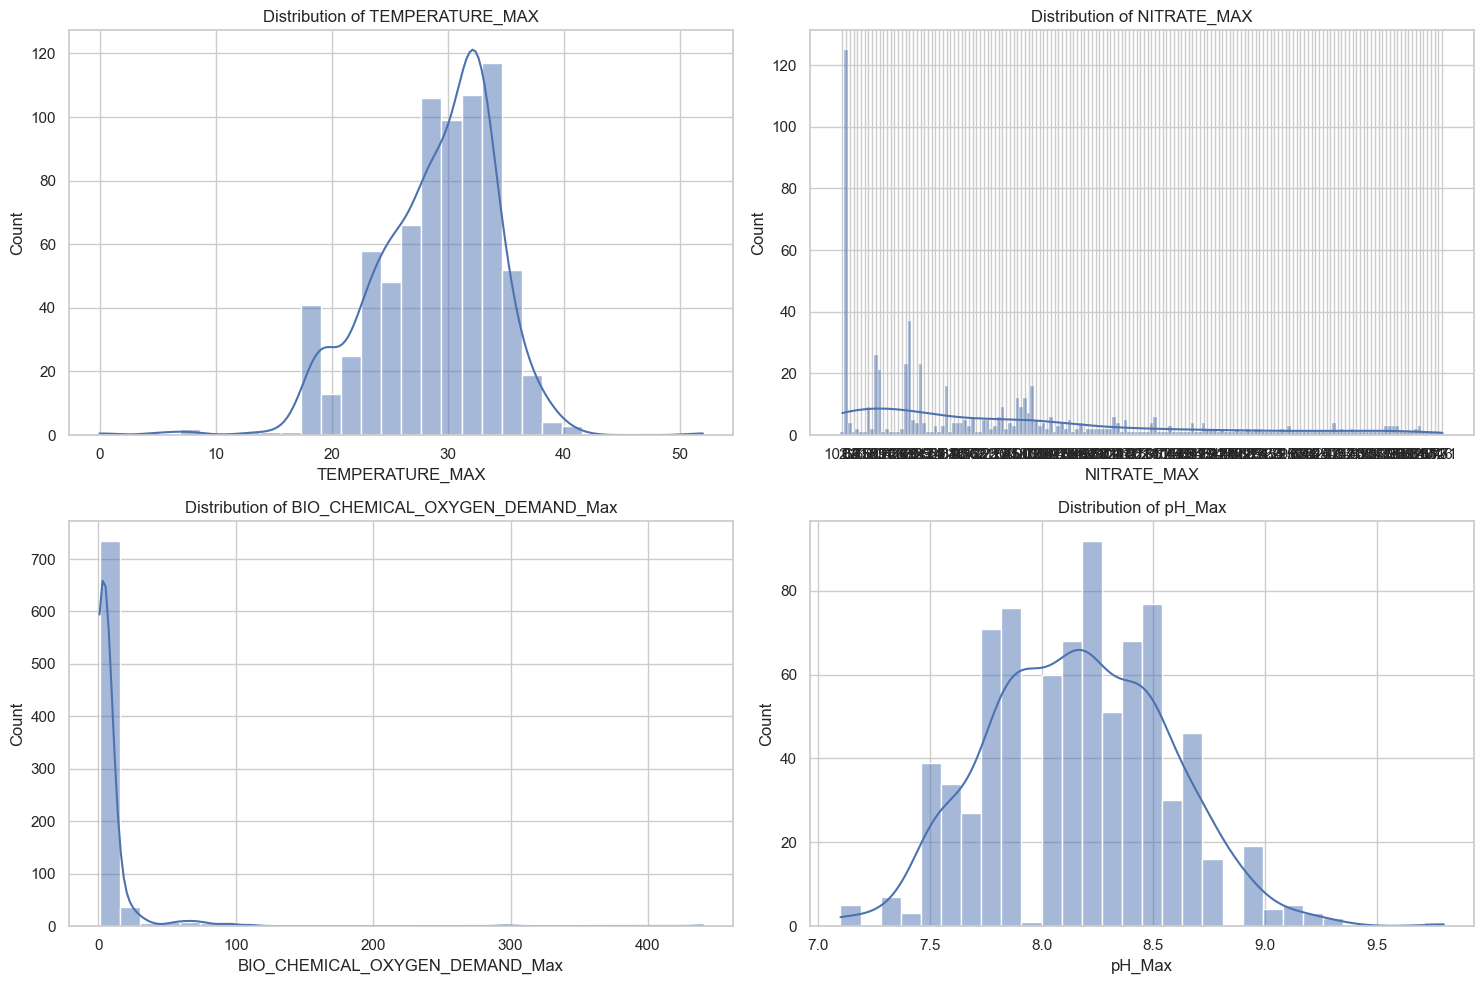

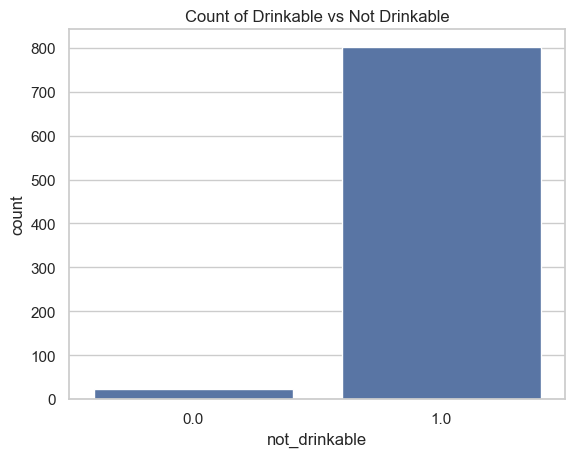

In [18]:
# 3. Visualizations
# Histograms for Temperature Max, Nitrate Max, BOD Max, pH Max
sns.set(style='whitegrid')
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for ax, variable in zip(axs.flatten(), pollution_variables):
    sns.histplot(cleaned_pollution_nightlight_data[variable], bins=30, ax=ax, kde=True)
    ax.set_title(f'Distribution of {variable}')

plt.tight_layout()
plt.show()

# Bar chart for not drinkable
sns.countplot(x='not_drinkable', data=cleaned_pollution_nightlight_data)
plt.title('Count of Drinkable vs Not Drinkable')
plt.show()

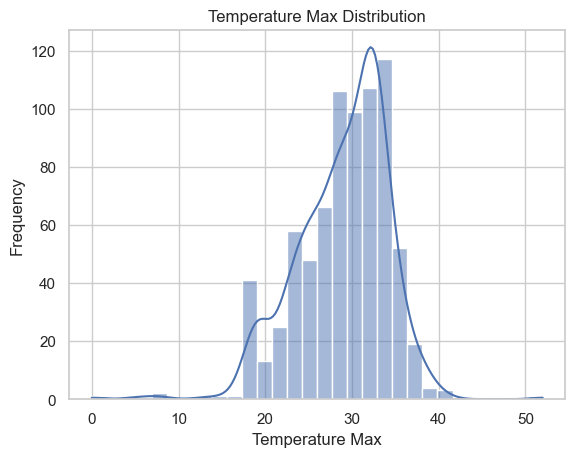

ValueError: could not convert string to float: 'BDL'

In [19]:
# Count of not drinkable
not_drinkable_count = cleaned_pollution_nightlight_data['not_drinkable'].value_counts()



# Visualization
# Temperature Max Histogram
sns.histplot(cleaned_pollution_nightlight_data['TEMPERATURE_MAX'].dropna(), bins=30, kde=True)
plt.title('Temperature Max Distribution')
plt.xlabel('Temperature Max')
plt.ylabel('Frequency')
plt.show()

# Nitrate Max Histogram
sns.histplot(cleaned_pollution_nightlight_data['NITRATE_MAX'].dropna().astype(float), bins=30, kde=True)  # Assuming the column is read as a string
plt.title('Nitrate Max Distribution')
plt.xlabel('Nitrate Max')
plt.ylabel('Frequency')
plt.show()

# BOD Max Histogram
sns.histplot(cleaned_pollution_nightlight_data['BIO_CHEMICAL_OXYGEN_DEMAND_Max'].dropna(), bins=30, kde=True)
plt.title('BOD Max Distribution')
plt.xlabel('BOD Max')
plt.ylabel('Frequency')
plt.show()

# Not Drinkable Bar Plot
sns.countplot(x='not_drinkable', data=cleaned_pollution_nightlight_data)
plt.title('Not Drinkable Distribution')
plt.xlabel('Not Drinkable')
plt.ylabel('Count')
plt.show()

In [ ]:
cleaned_pollution_nightlight_summary = cleaned_pollution_nightlight_data.describe()
#save the summary to a csv file
cleaned_pollution_nightlight_summary.to_csv("cleaned_pollution_nightlight_summary.csv")

In [ ]:
cleaned_pollution_nightlight_data.columns

Index(['District', 'matched_district_name', 'NAME_1', 'NAME_2', 'latitude',
       'longitude', 'district_centroid', '1_Closest_Station', '1_Distance',
       '2_Closest_Station', '2_Distance', '3_Closest_Station', '3_Distance',
       '4_Closest_Station', '4_Distance', '5_Closest_Station', '5_Distance',
       'matched_pollution_station', 'STATION CODE',
       'NAME OF MONITORING LOCATION', 'STATE NAME', 'TEMPERATURE_MIN',
       'TEMPERATURE_MAX', 'DISSOLVED_OXYGEN_MIN', 'DISSOLVED_OXYGEN_MAX',
       'pH_Min', 'pH_Max', 'CONDUCTIVITY_Min', 'CONDUCTIVITY_Max',
       'BIOCHEMICAL_OXYGEN_DEMAND_Min', 'BIO_CHEMICAL_OXYGEN_DEMAND_Max',
       'NITRATE_MIN', 'NITRATE_MAX', 'FECAL_COLIFORM_MIN',
       'FECAL_COLIFORM_MAX', 'TOTAL_COLIFORM_MIN', 'TOTAL_COLIFORM_MAX',
       'Year', 'not_drinkable', 'nightlight_district_matched',
       'pc11_district_id', 'pc11_state_id', 'year', 'state_name',
       'district_name', 'viirs_annual_min', 'viirs_annual_max',
       'viirs_annual_mean', 'vi

In [33]:
#Add a derived parameter: pca per capita
cleaned_pollution_nightlight_data['nightlight_per_capita'] = cleaned_pollution_nightlight_data['viirs_annual_mean'] / cleaned_pollution_nightlight_data['pc11_pca_tot_p']
 

<H1>Plots

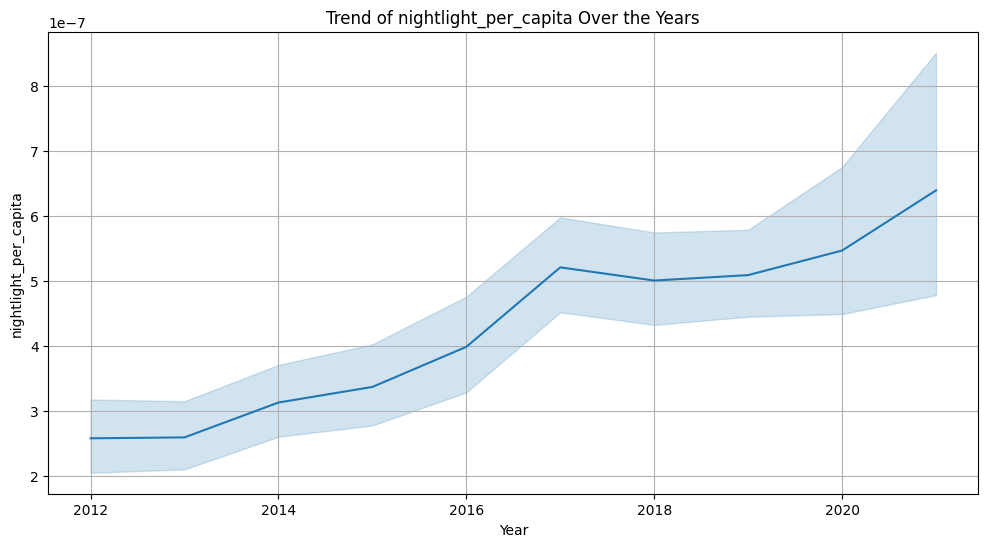

In [ ]:
#Nightlight_per_capita vs years

df = cleaned_pollution_nightlight_data.copy()
# Sort the DataFrame by 'Year' for a more meaningful plot
df = df.sort_values(by='Year')

# Create a line plot to visualize the trend of 'nightlight_per_capita' over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='nightlight_per_capita', data=df)
plt.title('Trend of nightlight_per_capita Over the Years')
plt.xlabel('Year')
plt.ylabel('nightlight_per_capita')
plt.grid(True)

# Show the plot
plt.show()


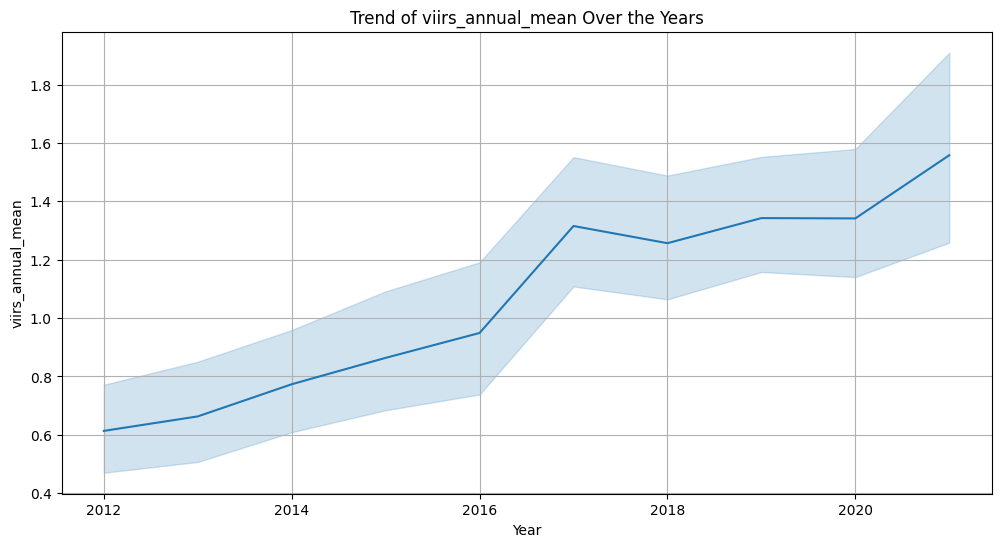

In [ ]:
# Create a line plot to visualize the trend of 'nightlight_per_capita' over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='viirs_annual_mean', data=df)
plt.title('Trend of viirs_annual_mean Over the Years')
plt.xlabel('Year')
plt.ylabel('viirs_annual_mean')
plt.grid(True)

# Show the plot
plt.show()


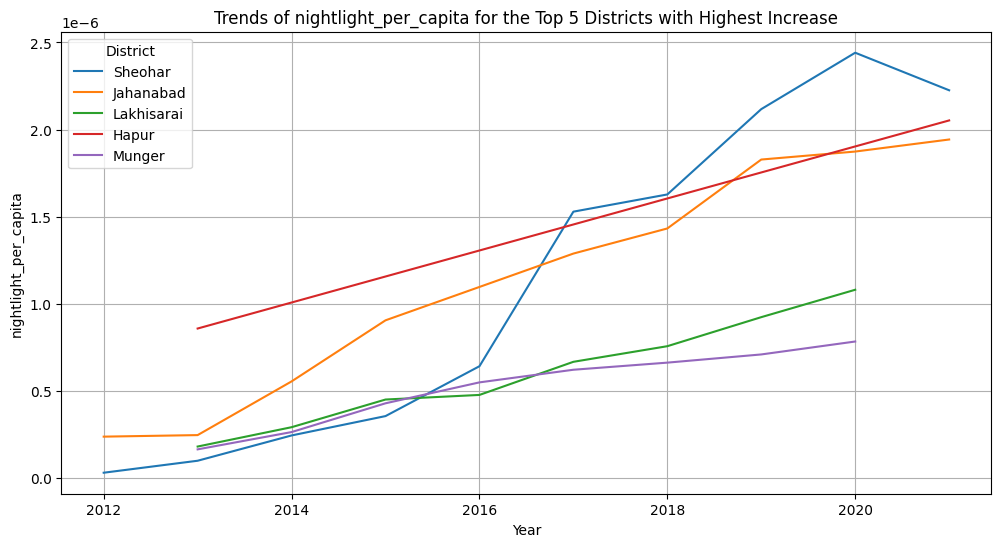

In [ ]:

# Calculate the difference in nightlight_per_capita between the first and last year for each district
district_changes = df.groupby('District').apply(lambda x: x['nightlight_per_capita'].values[-1] - x['nightlight_per_capita'].values[0]).reset_index(name='Change')

# Sort districts based on the change in nightlight_per_capita
top_5_districts = district_changes.sort_values(by='Change', ascending=False).head(5)

# Filter the original DataFrame to include only the top 5 districts
top_5_df = df[df['District'].isin(top_5_districts['District'])]

# Create a line plot to visualize the trends of nightlight_per_capita for the top 5 districts
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='nightlight_per_capita', hue='District', data=top_5_df)
plt.title('Trends of nightlight_per_capita for the Top 5 Districts with Highest Increase')
plt.xlabel('Year')
plt.ylabel('nightlight_per_capita')
plt.grid(True)

# Show the plot
plt.show()


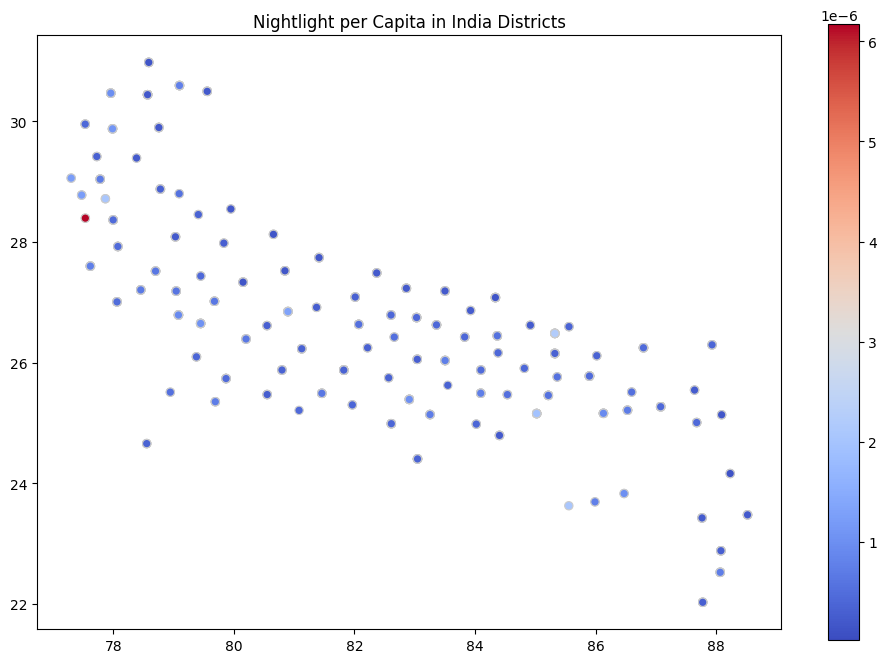

In [ ]:
# Create a GeoDataFrame from your DataFrame using the latitude and longitude columns
df = cleaned_pollution_nightlight_data.copy()
gdf = gpd.GeoDataFrame(df, 
                       geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Plot the nightlight_per_capita on the map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf.plot(column='nightlight_per_capita', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Nightlight per Capita in India Districts')
plt.show()

In [ ]:


downloader = GADMDownloader(version="4.0")
df = cleaned_pollution_nightlight_data.copy()
country_name = "India"
ad_level = 2
gdf = downloader.get_shape_data_by_country_name(country_name=country_name, ad_level=ad_level)


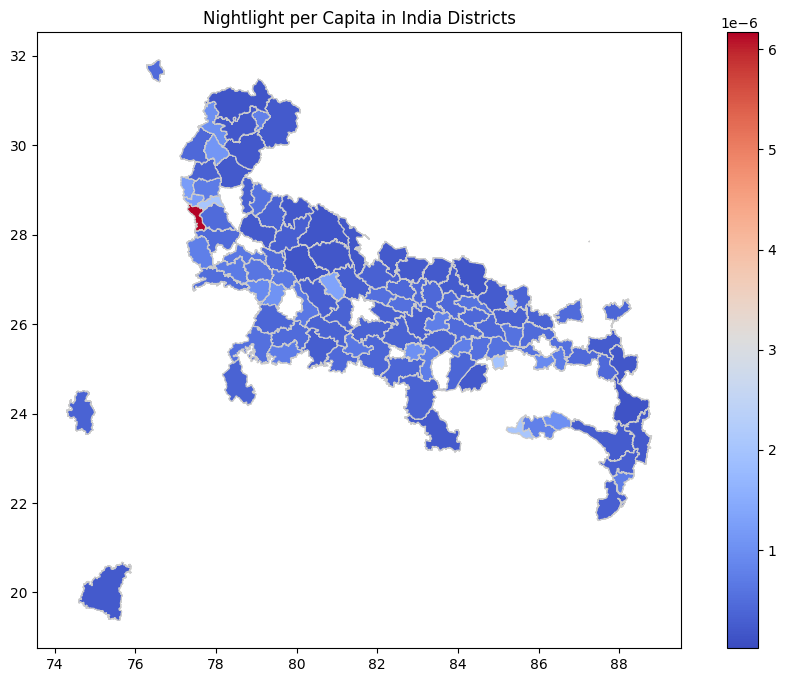

In [ ]:
merged_gdf_plot = gdf.merge(df, left_on='NAME_2', right_on='matched_district_name')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged_gdf_plot.plot(column='nightlight_per_capita', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Nightlight per Capita in India Districts')
plt.show()

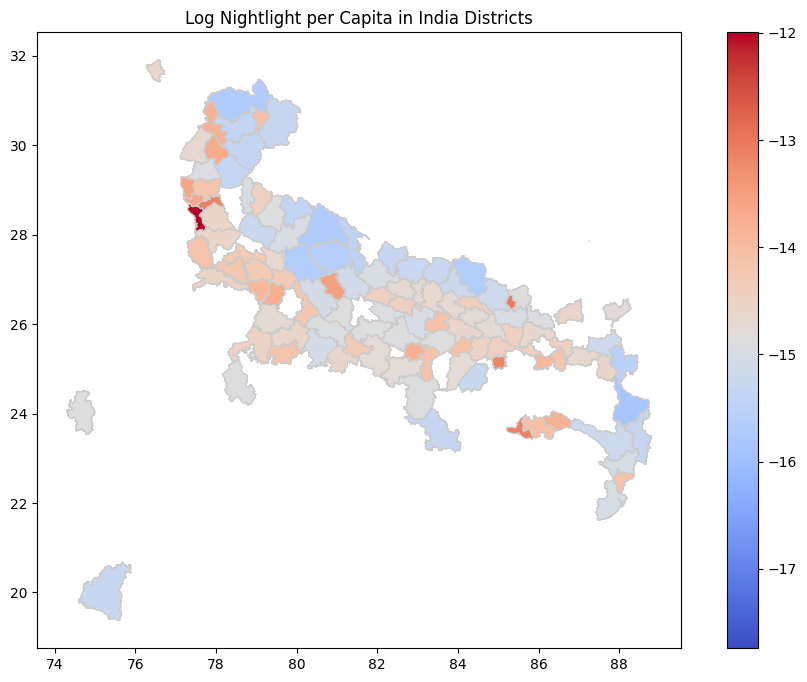

In [ ]:
# Log transformation
merged_gdf_plot['nightlight_per_capita_log'] = np.log(merged_gdf_plot['nightlight_per_capita'])

# Plot the map with log-transformed data
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged_gdf_plot.plot(column='nightlight_per_capita_log', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Log Nightlight per Capita in India Districts')


plt.show()

/var/folders/wm/jf5bq5r94mqgp8j4gnpmb7xw0000gn/T/ipykernel_72647/1313342729.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged_gdf_plot.geometry.centroid.x, merged_gdf_plot.geometry.centroid.y, merged_gdf_plot['District']):


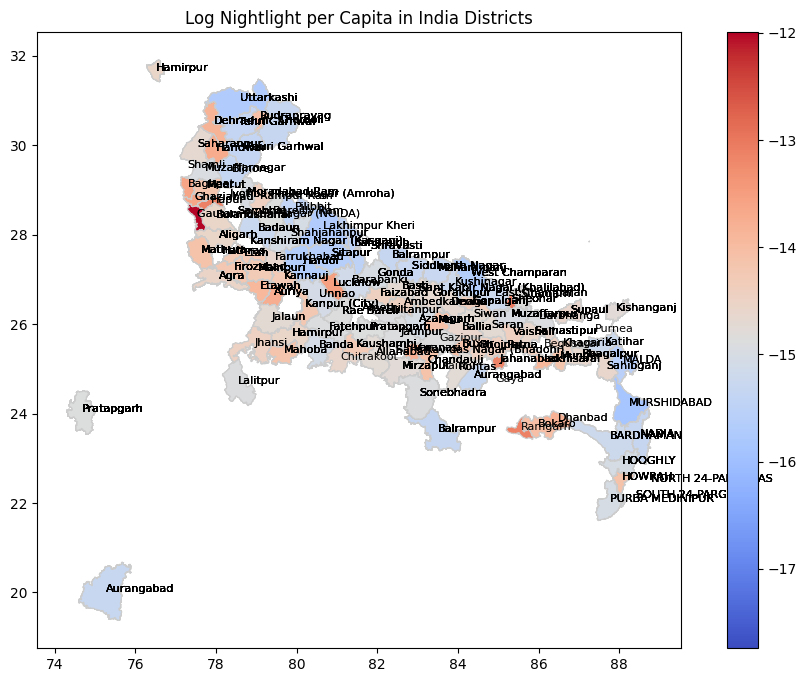

In [ ]:
# Log transformation
merged_gdf_plot['nightlight_per_capita_log'] = np.log(merged_gdf_plot['nightlight_per_capita'])

# Plot the map with log-transformed data
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged_gdf_plot.plot(column='nightlight_per_capita_log', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Log Nightlight per Capita in India Districts')

# Add annotations (district names)
for x, y, label in zip(merged_gdf_plot.geometry.centroid.x, merged_gdf_plot.geometry.centroid.y, merged_gdf_plot['District']):
    ax.text(x, y, label, fontsize=8)

plt.show()

<H1>Regressions

In [36]:
#First add log variables for normalization
data = cleaned_pollution_nightlight_data.copy()
print(data.columns) 

Index(['District', 'matched_district_name', 'NAME_1', 'NAME_2', 'latitude',
       'longitude', 'district_centroid', '1_Closest_Station', '1_Distance',
       '2_Closest_Station', '2_Distance', '3_Closest_Station', '3_Distance',
       '4_Closest_Station', '4_Distance', '5_Closest_Station', '5_Distance',
       'matched_pollution_station', 'STATION CODE',
       'NAME OF MONITORING LOCATION', 'STATE NAME', 'TEMPERATURE_MIN',
       'TEMPERATURE_MAX', 'DISSOLVED_OXYGEN_MIN', 'DISSOLVED_OXYGEN_MAX',
       'pH_Min', 'pH_Max', 'CONDUCTIVITY_Min', 'CONDUCTIVITY_Max',
       'BIOCHEMICAL_OXYGEN_DEMAND_Min', 'BIO_CHEMICAL_OXYGEN_DEMAND_Max',
       'NITRATE_MIN', 'NITRATE_MAX', 'FECAL_COLIFORM_MIN',
       'FECAL_COLIFORM_MAX', 'TOTAL_COLIFORM_MIN', 'TOTAL_COLIFORM_MAX',
       'Year', 'not_drinkable', 'nightlight_district_matched',
       'pc11_district_id', 'pc11_state_id', 'year', 'state_name',
       'district_name', 'viirs_annual_min', 'viirs_annual_max',
       'viirs_annual_mean', 'vi

In [37]:
columns = ['NITRATE_MAX', 'FECAL_COLIFORM_MAX', 'BIO_CHEMICAL_OXYGEN_DEMAND_Max', 'TEMPERATURE_MAX', 'DISSOLVED_OXYGEN_MAX', 'pH_Max', 'CONDUCTIVITY_Max', 'TOTAL_COLIFORM_MAX', 'viirs_annual_mean', 'not_drinkable']

for column in columns:
    # Convert column to numeric (assuming it contains strings that can be converted to floats)
    data[column] = pd.to_numeric(data[column], errors='coerce')

    # Filter out non-positive values
    positive_values = data[column][data[column] > 0]

    # Apply log transformation
    data[f"log_{column}"] = np.log(positive_values)


In [38]:
data.head()

,District,matched_district_name,NAME_1,NAME_2,latitude,longitude,district_centroid,1_Closest_Station,1_Distance,2_Closest_Station,...,log_NITRATE_MAX,log_FECAL_COLIFORM_MAX,log_BIO_CHEMICAL_OXYGEN_DEMAND_Max,log_TEMPERATURE_MAX,log_DISSOLVED_OXYGEN_MAX,log_pH_Max,log_CONDUCTIVITY_Max,log_TOTAL_COLIFORM_MAX,log_viirs_annual_mean,log_not_drinkable
0,Agra,Agra,Uttar Pradesh,Agra,27.007505,78.062924,POINT (78.06292448694016 27.00750514448138),1126,19.888379,1125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.653530,0.0
1,Agra,Agra,Uttar Pradesh,Agra,27.007505,78.062924,POINT (78.06292448694016 27.00750514448138),1126,19.888379,1125,...,NaN,9.305651,2.639057,NaN,NaN,2.219203,7.202661,9.740969,0.660141,0.0
2,Agra,Agra,Uttar Pradesh,Agra,27.007505,78.062924,POINT (78.06292448694016 27.00750514448138),1126,19.888379,1125,...,NaN,13.710150,2.708050,NaN,3.049273,NaN,NaN,14.508658,0.504733,0.0
3,Agra,Agra,Uttar Pradesh,Agra,27.007505,78.062924,POINT (78.06292448694016 27.00750514448138),1126,19.888379,1125,...,2.367436,15.068274,2.890372,3.218876,1.916923,2.091864,7.590852,16.588099,0.956804,0.0
4,Agra,Agra,Uttar Pradesh,Agra,27.007505,78.062924,POINT (78.06292448694016 27.00750514448138),1126,19.888379,1125,...,NaN,13.199324,NaN,NaN,NaN,NaN,NaN,13.732129,0.680703,0.0


In [39]:
data[['NITRATE_MAX', 'log_NITRATE_MAX']]

,NITRATE_MAX,log_NITRATE_MAX
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,10.67,2.367436
4,0.00,NaN
...,...,...
824,0.00,NaN
825,1.31,0.270027
826,0.45,-0.798508
827,1.20,0.182322


In [40]:
# Check for infinite values
inf_check = np.isinf(data['log_NITRATE_MAX'])

# Display rows with infinite values
print(data[inf_check])


Empty DataFrame
Columns: [District, matched_district_name, NAME_1, NAME_2, latitude, longitude, district_centroid, 1_Closest_Station, 1_Distance, 2_Closest_Station, 2_Distance, 3_Closest_Station, 3_Distance, 4_Closest_Station, 4_Distance, 5_Closest_Station, 5_Distance, matched_pollution_station, STATION CODE, NAME OF MONITORING LOCATION, STATE NAME, TEMPERATURE_MIN, TEMPERATURE_MAX, DISSOLVED_OXYGEN_MIN, DISSOLVED_OXYGEN_MAX, pH_Min, pH_Max, CONDUCTIVITY_Min, CONDUCTIVITY_Max, BIOCHEMICAL_OXYGEN_DEMAND_Min, BIO_CHEMICAL_OXYGEN_DEMAND_Max, NITRATE_MIN, NITRATE_MAX, FECAL_COLIFORM_MIN, FECAL_COLIFORM_MAX, TOTAL_COLIFORM_MIN, TOTAL_COLIFORM_MAX, Year, not_drinkable, nightlight_district_matched, pc11_district_id, pc11_state_id, year, state_name, district_name, viirs_annual_min, viirs_annual_max, viirs_annual_mean, viirs_annual_sum, viirs_annual_num_cells, pc11_pca_tot_p, pc11_pca_no_hh, nightlight_per_capita, log_NITRATE_MAX, log_FECAL_COLIFORM_MAX, log_BIO_CHEMICAL_OXYGEN_DEMAND_Max, log_

In [41]:
data[['TEMPERATURE_MAX', 'log_TEMPERATURE_MAX']]

,TEMPERATURE_MAX,log_TEMPERATURE_MAX
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,25.0,3.218876
4,NaN,NaN
...,...,...
824,32.0,3.465736
825,32.0,3.465736
826,28.0,3.332205
827,36.0,3.583519


In [42]:
data[['viirs_annual_mean', 'log_viirs_annual_mean']]

,viirs_annual_mean,log_viirs_annual_mean
0,1.922315,0.653530
1,1.935065,0.660141
2,1.656543,0.504733
3,2.603362,0.956804
4,1.975266,0.680703
...,...,...
824,0.279193,-1.275851
825,0.579308,-0.545921
826,0.657019,-0.420043
827,0.640785,-0.445061


In [43]:
data.columns

Index(['District', 'matched_district_name', 'NAME_1', 'NAME_2', 'latitude',
       'longitude', 'district_centroid', '1_Closest_Station', '1_Distance',
       '2_Closest_Station', '2_Distance', '3_Closest_Station', '3_Distance',
       '4_Closest_Station', '4_Distance', '5_Closest_Station', '5_Distance',
       'matched_pollution_station', 'STATION CODE',
       'NAME OF MONITORING LOCATION', 'STATE NAME', 'TEMPERATURE_MIN',
       'TEMPERATURE_MAX', 'DISSOLVED_OXYGEN_MIN', 'DISSOLVED_OXYGEN_MAX',
       'pH_Min', 'pH_Max', 'CONDUCTIVITY_Min', 'CONDUCTIVITY_Max',
       'BIOCHEMICAL_OXYGEN_DEMAND_Min', 'BIO_CHEMICAL_OXYGEN_DEMAND_Max',
       'NITRATE_MIN', 'NITRATE_MAX', 'FECAL_COLIFORM_MIN',
       'FECAL_COLIFORM_MAX', 'TOTAL_COLIFORM_MIN', 'TOTAL_COLIFORM_MAX',
       'Year', 'not_drinkable', 'nightlight_district_matched',
       'pc11_district_id', 'pc11_state_id', 'year', 'state_name',
       'district_name', 'viirs_annual_min', 'viirs_annual_max',
       'viirs_annual_mean', 'vi

Create lag variables

In [44]:
# Columns to create lag variables for
measurement_columns = ['NITRATE_MAX', 'FECAL_COLIFORM_MAX', 'BIO_CHEMICAL_OXYGEN_DEMAND_Max', 
                      'TEMPERATURE_MAX', 'DISSOLVED_OXYGEN_MAX', 'pH_Max', 'CONDUCTIVITY_Max', 
                      'TOTAL_COLIFORM_MAX', 'not_drinkable']

# Define the number of lag periods
num_lags = 3  # You can change this value to the desired number of lag periods

for column in measurement_columns:
    for i in range(1, num_lags + 1):
        data[f'{column}_lag_{i}'] = data[column].shift(i)

# Display the updated columns in the dataframe
data.columns


Index(['District', 'matched_district_name', 'NAME_1', 'NAME_2', 'latitude',
       'longitude', 'district_centroid', '1_Closest_Station', '1_Distance',
       '2_Closest_Station', '2_Distance', '3_Closest_Station', '3_Distance',
       '4_Closest_Station', '4_Distance', '5_Closest_Station', '5_Distance',
       'matched_pollution_station', 'STATION CODE',
       'NAME OF MONITORING LOCATION', 'STATE NAME', 'TEMPERATURE_MIN',
       'TEMPERATURE_MAX', 'DISSOLVED_OXYGEN_MIN', 'DISSOLVED_OXYGEN_MAX',
       'pH_Min', 'pH_Max', 'CONDUCTIVITY_Min', 'CONDUCTIVITY_Max',
       'BIOCHEMICAL_OXYGEN_DEMAND_Min', 'BIO_CHEMICAL_OXYGEN_DEMAND_Max',
       'NITRATE_MIN', 'NITRATE_MAX', 'FECAL_COLIFORM_MIN',
       'FECAL_COLIFORM_MAX', 'TOTAL_COLIFORM_MIN', 'TOTAL_COLIFORM_MAX',
       'Year', 'not_drinkable', 'nightlight_district_matched',
       'pc11_district_id', 'pc11_state_id', 'year', 'state_name',
       'district_name', 'viirs_annual_min', 'viirs_annual_max',
       'viirs_annual_mean', 'vi

In [45]:
np.log(data['NITRATE_MAX_lag_1'])

/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0           NaN
1           NaN
2           NaN
3           NaN
4      2.367436
         ...   
824        -inf
825        -inf
826    0.270027
827   -0.798508
828    0.182322
Name: NITRATE_MAX_lag_1, Length: 829, dtype: float64

Build regression models


1. Single-variable regressions

In [ ]:
import statsmodels.formula.api as smf


In [ ]:
model = smf.ols('log_viirs_annual_mean ~ log_NITRATE_MAX', data=data)
result = model.fit()
print(result.summary())


                              OLS Regression Results                             
Dep. Variable:     log_viirs_annual_mean   R-squared:                       0.025
Model:                               OLS   Adj. R-squared:                  0.023
Method:                    Least Squares   F-statistic:                     11.55
Date:                   Fri, 01 Dec 2023   Prob (F-statistic):           0.000736
Time:                           15:27:59   Log-Likelihood:                -539.23
No. Observations:                    456   AIC:                             1082.
Df Residuals:                        454   BIC:                             1091.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept   

In [ ]:
model = smf.ols('log_viirs_annual_mean ~ log_BIO_CHEMICAL_OXYGEN_DEMAND_Max', data=data)
result = model.fit()
print(result.summary())

                              OLS Regression Results                             
Dep. Variable:     log_viirs_annual_mean   R-squared:                       0.153
Model:                               OLS   Adj. R-squared:                  0.152
Method:                    Least Squares   F-statistic:                     134.6
Date:                   Fri, 01 Dec 2023   Prob (F-statistic):           1.03e-28
Time:                           15:27:59   Log-Likelihood:                -910.88
No. Observations:                    746   AIC:                             1826.
Df Residuals:                        744   BIC:                             1835.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [ ]:
model = smf.ols('log_viirs_annual_mean ~ log_TEMPERATURE_MAX', data=data)
result = model.fit()
print(result.summary())

                              OLS Regression Results                             
Dep. Variable:     log_viirs_annual_mean   R-squared:                       0.098
Model:                               OLS   Adj. R-squared:                  0.097
Method:                    Least Squares   F-statistic:                     77.18
Date:                   Fri, 01 Dec 2023   Prob (F-statistic):           1.16e-17
Time:                           15:27:59   Log-Likelihood:                -901.69
No. Observations:                    714   AIC:                             1807.
Df Residuals:                        712   BIC:                             1817.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Inte

In [ ]:
model = smf.ols('log_viirs_annual_mean ~ log_pH_Max', data=data)
result = model.fit()
print(result.summary())

                              OLS Regression Results                             
Dep. Variable:     log_viirs_annual_mean   R-squared:                       0.003
Model:                               OLS   Adj. R-squared:                  0.001
Method:                    Least Squares   F-statistic:                     2.028
Date:                   Fri, 01 Dec 2023   Prob (F-statistic):              0.155
Time:                           15:27:59   Log-Likelihood:                -989.80
No. Observations:                    746   AIC:                             1984.
Df Residuals:                        744   BIC:                             1993.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3574 

In [ ]:
model = smf.ols('log_viirs_annual_mean ~ log_FECAL_COLIFORM_MAX', data=data)
result = model.fit()
print(result.summary())

                              OLS Regression Results                             
Dep. Variable:     log_viirs_annual_mean   R-squared:                       0.222
Model:                               OLS   Adj. R-squared:                  0.221
Method:                    Least Squares   F-statistic:                     194.5
Date:                   Fri, 01 Dec 2023   Prob (F-statistic):           4.61e-39
Time:                           15:28:00   Log-Likelihood:                -802.04
No. Observations:                    682   AIC:                             1608.
Df Residuals:                        680   BIC:                             1617.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [ ]:
model = smf.ols('viirs_annual_mean ~ not_drinkable', data=data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:      viirs_annual_mean   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     8.939
Date:                Fri, 01 Dec 2023   Prob (F-statistic):            0.00288
Time:                        15:28:00   Log-Likelihood:                -1111.3
No. Observations:                 763   AIC:                             2227.
Df Residuals:                     761   BIC:                             2236.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4577      0.217      2.111

In summary, the log_pH_Max does not seem to be a statistically significant predictor of the log_viirs_annual_mean in this model. This conclusion is based on the high p-value (0.155), indicating weak evidence against the null hypothesis (that there is no relationship between log_pH_Max and log_viirs_annual_mean).

Single variable lag models

In [ ]:

model = smf.ols('viirs_annual_mean ~ NITRATE_MAX + NITRATE_MAX_lag_1 + NITRATE_MAX_lag_2 + NITRATE_MAX_lag_3', data=data)
result = model.fit()
print(result.summary())

"""
In summary, the model suggests that log_NITRATE_MAX is statistically significant and positively related to log_viirs_annual_mean, but the lag variables (NITRATE_MAX_lag_1, NITRATE_MAX_lag_2, NITRATE_MAX_lag_3) are not statistically significant in predicting log_viirs_annual_mean.
"""


                            OLS Regression Results                            
Dep. Variable:      viirs_annual_mean   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     3.816
Date:                Fri, 01 Dec 2023   Prob (F-statistic):            0.00473
Time:                        15:28:01   Log-Likelihood:                -527.78
No. Observations:                 363   AIC:                             1066.
Df Residuals:                     358   BIC:                             1085.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.0888      0.06

'\nIn summary, the model suggests that log_NITRATE_MAX is statistically significant and positively related to log_viirs_annual_mean, but the lag variables (NITRATE_MAX_lag_1, NITRATE_MAX_lag_2, NITRATE_MAX_lag_3) are not statistically significant in predicting log_viirs_annual_mean.\n'

In [ ]:

model = smf.ols('viirs_annual_mean ~ BIO_CHEMICAL_OXYGEN_DEMAND_Max + BIO_CHEMICAL_OXYGEN_DEMAND_Max_lag_1 + BIO_CHEMICAL_OXYGEN_DEMAND_Max_lag_2 + BIO_CHEMICAL_OXYGEN_DEMAND_Max_lag_3', data=data)
result = model.fit()
print(result.summary())

"""
"""


                            OLS Regression Results                            
Dep. Variable:      viirs_annual_mean   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     4.478
Date:                Fri, 01 Dec 2023   Prob (F-statistic):            0.00140
Time:                        15:28:02   Log-Likelihood:                -1013.4
No. Observations:                 698   AIC:                             2037.
Df Residuals:                     693   BIC:                             2060.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


'\n'

In [ ]:

model = smf.ols('viirs_annual_mean ~ TEMPERATURE_MAX + TEMPERATURE_MAX_lag_1 + TEMPERATURE_MAX_lag_2 + TEMPERATURE_MAX_lag_3', data=data)
result = model.fit()
print(result.summary())

"""
"""


                            OLS Regression Results                            
Dep. Variable:      viirs_annual_mean   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     7.559
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           5.93e-06
Time:                        15:28:03   Log-Likelihood:                -873.75
No. Observations:                 645   AIC:                             1757.
Df Residuals:                     640   BIC:                             1780.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.39

'\n'

Multi-linear regressions

In [ ]:
model = smf.ols('log_viirs_annual_mean ~ log_BIO_CHEMICAL_OXYGEN_DEMAND_Max + log_NITRATE_MAX + log_pH_Max + log_TEMPERATURE_MAX + log_FECAL_COLIFORM_MAX + log_TOTAL_COLIFORM_MAX + log_not_drinkable', data=data)
result = model.fit()
print(result.summary())

                              OLS Regression Results                             
Dep. Variable:     log_viirs_annual_mean   R-squared:                       0.195
Model:                               OLS   Adj. R-squared:                  0.183
Method:                    Least Squares   F-statistic:                     16.77
Date:                   Fri, 01 Dec 2023   Prob (F-statistic):           2.35e-17
Time:                           15:28:05   Log-Likelihood:                -445.22
No. Observations:                    423   AIC:                             904.4
Df Residuals:                        416   BIC:                             932.8
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1965: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [ ]:
model = smf.ols('viirs_annual_mean ~ BIO_CHEMICAL_OXYGEN_DEMAND_Max + NITRATE_MAX + pH_Max + TEMPERATURE_MAX + FECAL_COLIFORM_MAX + TOTAL_COLIFORM_MAX + not_drinkable', data=data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:      viirs_annual_mean   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     7.189
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           3.24e-08
Time:                        15:28:05   Log-Likelihood:                -757.93
No. Observations:                 514   AIC:                             1532.
Df Residuals:                     506   BIC:                             1566.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

The model provides some insights, showing that the log_BIO_CHEMICAL_OXYGEN_DEMAND_Max and log_TEMPERATURE_MAX variables have relatively more significant influences on log_viirs_annual_mean, while the other variables in the model do not seem to have a substantial impact.

<H2>Fixed effects models

In [35]:
data.columns

Index(['District', 'matched_district_name', 'NAME_1', 'NAME_2', 'latitude',
       'longitude', 'district_centroid', '1_Closest_Station', '1_Distance',
       '2_Closest_Station', '2_Distance', '3_Closest_Station', '3_Distance',
       '4_Closest_Station', '4_Distance', '5_Closest_Station', '5_Distance',
       'matched_pollution_station', 'STATION CODE',
       'NAME OF MONITORING LOCATION', 'STATE NAME', 'TEMPERATURE_MIN',
       'TEMPERATURE_MAX', 'DISSOLVED_OXYGEN_MIN', 'DISSOLVED_OXYGEN_MAX',
       'pH_Min', 'pH_Max', 'CONDUCTIVITY_Min', 'CONDUCTIVITY_Max',
       'BIOCHEMICAL_OXYGEN_DEMAND_Min', 'BIO_CHEMICAL_OXYGEN_DEMAND_Max',
       'NITRATE_MIN', 'NITRATE_MAX', 'FECAL_COLIFORM_MIN',
       'FECAL_COLIFORM_MAX', 'TOTAL_COLIFORM_MIN', 'TOTAL_COLIFORM_MAX',
       'Year', 'not_drinkable', 'nightlight_district_matched',
       'pc11_district_id', 'pc11_state_id', 'year', 'state_name',
       'district_name', 'viirs_annual_min', 'viirs_annual_max',
       'viirs_annual_mean', 'vi

In [ ]:

# Check if the variable is present
if 'log_viirs_annual_mean' in data.columns:
    print("Variable found.")
else:
    print("Variable not found.")


Variable found.


Between nightlight/capita and pollution measures

In [46]:
from linearmodels.panel import PanelOLS

# Assuming 'data' is your DataFrame with the provided columns
# Make sure 'Year' is a categorical variable

# Define the fixed effects model
formula = 'np.log(nightlight_per_capita) ~ log(BIO_CHEMICAL_OXYGEN_DEMAND_Max_lag_1) + log(TEMPERATURE_MAX_lag_1) + EntityEffects + TimeEffects'
model = PanelOLS.from_formula(formula, data=data.set_index(['district_name', 'year']))

# Fit the model
results = model.fit()

# Print the summary
print(results)


                                PanelOLS Estimation Summary                                
Dep. Variable:     np.log(nightlight_per_capita)   R-squared:                        0.0077
Estimator:                              PanelOLS   R-squared (Between):             -0.0845
No. Observations:                            713   R-squared (Within):               0.0053
Date:                           Sun, Mar 17 2024   R-squared (Overall):             -0.0835
Time:                                   19:21:40   Log-likelihood                   -108.10
Cov. Estimator:                       Unadjusted                                           
                                                   F-statistic:                      2.3187
Entities:                                    108   P-value                           0.0993
Avg Obs:                                  6.6019   Distribution:                   F(2,594)
Min Obs:                                  1.0000                                

/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [47]:

# Define the fixed effects model
formula = 'np.log(nightlight_per_capita) ~ log(BIO_CHEMICAL_OXYGEN_DEMAND_Max_lag_2) + log(TEMPERATURE_MAX_lag_2) + EntityEffects + TimeEffects'
model = PanelOLS.from_formula(formula, data=data.set_index(['district_name', 'year']))

# Fit the model
results = model.fit()

# Print the summary
print(results)

                                PanelOLS Estimation Summary                                
Dep. Variable:     np.log(nightlight_per_capita)   R-squared:                        0.0121
Estimator:                              PanelOLS   R-squared (Between):             -0.1033
No. Observations:                            711   R-squared (Within):              -0.0005
Date:                           Sun, Mar 17 2024   R-squared (Overall):             -0.1022
Time:                                   19:22:51   Log-likelihood                   -93.035
Cov. Estimator:                       Unadjusted                                           
                                                   F-statistic:                      3.6332
Entities:                                    109   P-value                           0.0270
Avg Obs:                                  6.5229   Distribution:                   F(2,591)
Min Obs:                                  1.0000                                

/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [79]:

# Define the fixed effects model
formula = 'np.log(nightlight_per_capita) ~ log(BIO_CHEMICAL_OXYGEN_DEMAND_Max_lag_3) + log(TEMPERATURE_MAX_lag_3) + EntityEffects + TimeEffects'
model = PanelOLS.from_formula(formula, data=data.set_index(['district_name', 'year']))

# Fit the model
results = model.fit()

# Print the summary
print(results)

                                PanelOLS Estimation Summary                                
Dep. Variable:     np.log(nightlight_per_capita)   R-squared:                        0.0397
Estimator:                              PanelOLS   R-squared (Between):             -0.1732
No. Observations:                            701   R-squared (Within):               0.0030
Date:                           Fri, Mar 22 2024   R-squared (Overall):             -0.1715
Time:                                   13:32:45   Log-likelihood                   -87.745
Cov. Estimator:                       Unadjusted                                           
                                                   F-statistic:                      12.071
Entities:                                    106   P-value                           0.0000
Avg Obs:                                  6.6132   Distribution:                   F(2,584)
Min Obs:                                  1.0000                                

/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


Between nightlight intensity and pollution measures

In [115]:
from linearmodels.panel import PanelOLS

# Assuming 'data' is your DataFrame with the provided columns
# Make sure 'Year' is a categorical variable

# Define the fixed effects model
formula = 'log_viirs_annual_mean ~ log(BIO_CHEMICAL_OXYGEN_DEMAND_Max_lag_1) + log(TEMPERATURE_MAX_lag_1) + EntityEffects + TimeEffects'
model = PanelOLS.from_formula(formula, data=data.set_index(['district_name', 'year']))

# Fit the model
results = model.fit()

# Print the summary
print(results)


                            PanelOLS Estimation Summary                            
Dep. Variable:     log_viirs_annual_mean   R-squared:                        0.0072
Estimator:                      PanelOLS   R-squared (Between):             -0.9392
No. Observations:                    705   R-squared (Within):               0.0055
Date:                   Fri, Dec 01 2023   R-squared (Overall):             -0.8998
Time:                           15:28:09   Log-likelihood                   -156.71
Cov. Estimator:               Unadjusted                                           
                                           F-statistic:                      2.1251
Entities:                            107   P-value                           0.1203
Avg Obs:                          6.5888   Distribution:                   F(2,587)
Min Obs:                          1.0000                                           
Max Obs:                          27.000   F-statistic (robust):            

/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [116]:
from linearmodels.panel import PanelOLS

# Assuming 'data' is your DataFrame with the provided columns
# Make sure 'Year' is a categorical variable

# Define the fixed effects model
formula = 'log_viirs_annual_mean ~ log(BIO_CHEMICAL_OXYGEN_DEMAND_Max_lag_1) + log(BIO_CHEMICAL_OXYGEN_DEMAND_Max_lag_2)+log(BIO_CHEMICAL_OXYGEN_DEMAND_Max_lag_3)+EntityEffects + TimeEffects'
model = PanelOLS.from_formula(formula, data=data.set_index(['district_name', 'year']))

# Fit the model
results = model.fit()

# Print the summary
print(results)



"""
+log(FECAL_COLIFORM_MAX_lag_1)+log(FECAL_COLIFORM_MAX_lag_2)+log(FECAL_COLIFORM_MAX_lag_3)+log(NITRATE_MAX_lag_1)+log(NITRATE_MAX_lag_2)+log(NITRATE_MAX_lag_3) + 
"""

                            PanelOLS Estimation Summary                            
Dep. Variable:     log_viirs_annual_mean   R-squared:                        0.0114
Estimator:                      PanelOLS   R-squared (Between):             -0.0164
No. Observations:                    707   R-squared (Within):               0.0161
Date:                   Fri, Dec 01 2023   R-squared (Overall):              0.0235
Time:                           15:28:09   Log-likelihood                   -151.73
Cov. Estimator:               Unadjusted                                           
                                           F-statistic:                      2.2505
Entities:                            107   P-value                           0.0814
Avg Obs:                          6.6075   Distribution:                   F(3,588)
Min Obs:                          1.0000                                           
Max Obs:                          27.000   F-statistic (robust):            

/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


'\n+log(FECAL_COLIFORM_MAX_lag_1)+log(FECAL_COLIFORM_MAX_lag_2)+log(FECAL_COLIFORM_MAX_lag_3)+log(NITRATE_MAX_lag_1)+log(NITRATE_MAX_lag_2)+log(NITRATE_MAX_lag_3) + \n'

In [117]:

# Assuming 'data' is your DataFrame with the provided columns
# Make sure 'Year' is a categorical variable

# Define the fixed effects model
formula = 'log_viirs_annual_mean ~ +log(FECAL_COLIFORM_MAX_lag_1)+log(FECAL_COLIFORM_MAX_lag_2)+log(FECAL_COLIFORM_MAX_lag_3)+EntityEffects + TimeEffects'
model = PanelOLS.from_formula(formula, data=data.set_index(['district_name', 'year']))

# Fit the model
results = model.fit()

# Print the summary
print(results)


                            PanelOLS Estimation Summary                            
Dep. Variable:     log_viirs_annual_mean   R-squared:                        0.0230
Estimator:                      PanelOLS   R-squared (Between):             -0.2166
No. Observations:                    601   R-squared (Within):               0.0067
Date:                   Fri, Dec 01 2023   R-squared (Overall):             -0.2366
Time:                           15:28:10   Log-likelihood                   -105.18
Cov. Estimator:               Unadjusted                                           
                                           F-statistic:                      3.8298
Entities:                            101   P-value                           0.0099
Avg Obs:                          5.9505   Distribution:                   F(3,488)
Min Obs:                          1.0000                                           
Max Obs:                          25.000   F-statistic (robust):            

/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [118]:
data['log_NITRATE_MAX']

0           NaN
1           NaN
2           NaN
3      2.367436
4           NaN
         ...   
824         NaN
825    0.270027
826   -0.798508
827    0.182322
828   -0.510826
Name: log_NITRATE_MAX, Length: 829, dtype: float64

In [119]:
data['log_BIO_CHEMICAL_OXYGEN_DEMAND_Max']

0           NaN
1      2.639057
2      2.708050
3      2.890372
4           NaN
         ...   
824    1.029619
825    1.609438
826    1.945910
827    2.484907
828    2.484907
Name: log_BIO_CHEMICAL_OXYGEN_DEMAND_Max, Length: 829, dtype: float64

In [120]:
import numpy as np
from linearmodels.panel import PanelOLS

# Assuming 'data' is your DataFrame with the provided columns
# Make sure 'year' is a categorical variable

# Handle NaN and infinite values in nitrate lag columns
nitrate_lag_columns = ['NITRATE_MAX_lag_1', 'NITRATE_MAX_lag_2', 'NITRATE_MAX_lag_3']
for column in nitrate_lag_columns:
    data[column] = np.log1p(data[column])



In [121]:

# Define the fixed effects model
formula = 'log_viirs_annual_mean ~ log(NITRATE_MAX_lag_1) + log(NITRATE_MAX_lag_2) + log(NITRATE_MAX_lag_3) + EntityEffects + TimeEffects'
model = PanelOLS.from_formula(formula, data=data.set_index(['district_name', 'year']))

# Fit the model
results = model.fit()

# Print the summary
print(results)

/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


ValueError: array must not contain infs or NaNs

In [187]:
data.to_csv("pollution_nightlight_cleaned_data_r.csv")

In [122]:
from linearmodels.panel import PanelOLS

# Assuming 'data' is your DataFrame with the provided columns
# Make sure 'year' is a categorical variable

# Define the fixed effects model
formula = 'log_viirs_annual_mean ~ log_BIO_CHEMICAL_OXYGEN_DEMAND_Max + EntityEffects + TimeEffects'

model = PanelOLS.from_formula(formula, data=data.set_index(['district_name', 'year']))

# Fit the model
results = model.fit()

# Print the summary
print(results)


                            PanelOLS Estimation Summary                            
Dep. Variable:     log_viirs_annual_mean   R-squared:                        0.0001
Estimator:                      PanelOLS   R-squared (Between):              0.0040
No. Observations:                    746   R-squared (Within):              -0.0003
Date:                   Fri, Dec 01 2023   R-squared (Overall):             -0.0016
Time:                           15:28:18   Log-likelihood                   -160.87
Cov. Estimator:               Unadjusted                                           
                                           F-statistic:                      0.0770
Entities:                            108   P-value                           0.7814
Avg Obs:                          6.9074   Distribution:                   F(1,628)
Min Obs:                          1.0000                                           
Max Obs:                          27.000   F-statistic (robust):            

/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [123]:
data.columns

Index(['District', 'matched_district_name', 'NAME_1', 'NAME_2', 'latitude',
       'longitude', 'district_centroid', '1_Closest_Station', '1_Distance',
       '2_Closest_Station', '2_Distance', '3_Closest_Station', '3_Distance',
       '4_Closest_Station', '4_Distance', '5_Closest_Station', '5_Distance',
       'matched_pollution_station', 'STATION CODE',
       'NAME OF MONITORING LOCATION', 'STATE NAME', 'TEMPERATURE_MIN',
       'TEMPERATURE_MAX', 'DISSOLVED_OXYGEN_MIN', 'DISSOLVED_OXYGEN_MAX',
       'pH_Min', 'pH_Max', 'CONDUCTIVITY_Min', 'CONDUCTIVITY_Max',
       'BIOCHEMICAL_OXYGEN_DEMAND_Min', 'BIO_CHEMICAL_OXYGEN_DEMAND_Max',
       'NITRATE_MIN', 'NITRATE_MAX', 'FECAL_COLIFORM_MIN',
       'FECAL_COLIFORM_MAX', 'TOTAL_COLIFORM_MIN', 'TOTAL_COLIFORM_MAX',
       'Year', 'not_drinkable', 'nightlight_district_matched',
       'pc11_district_id', 'pc11_state_id', 'year', 'state_name',
       'district_name', 'viirs_annual_min', 'viirs_annual_max',
       'viirs_annual_mean', 'vi

Lag models of BOD vs nightlight with Temperature as control and District and Years as Fixed effects


In [124]:

# Assuming 'data' is your DataFrame with the provided columns
# Make sure 'Year' is a categorical variable

# Define the fixed effects model
formula = 'log_viirs_annual_mean ~ log(BIO_CHEMICAL_OXYGEN_DEMAND_Max_lag_1) + log(TEMPERATURE_MAX_lag_1) + EntityEffects + TimeEffects'
model = PanelOLS.from_formula(formula, data=data.set_index(['District', 'Year']))

# Fit the model
results_1 = model.fit()

# Print the summary
print(results_1)


                            PanelOLS Estimation Summary                            
Dep. Variable:     log_viirs_annual_mean   R-squared:                        0.0072
Estimator:                      PanelOLS   R-squared (Between):             -0.9392
No. Observations:                    705   R-squared (Within):               0.0055
Date:                   Fri, Dec 01 2023   R-squared (Overall):             -0.8998
Time:                           15:28:21   Log-likelihood                   -156.71
Cov. Estimator:               Unadjusted                                           
                                           F-statistic:                      2.1251
Entities:                            107   P-value                           0.1203
Avg Obs:                          6.5888   Distribution:                   F(2,587)
Min Obs:                          1.0000                                           
Max Obs:                          27.000   F-statistic (robust):            

/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [125]:

# Assuming 'data' is your DataFrame with the provided columns
# Make sure 'Year' is a categorical variable

# Define the fixed effects model
formula = 'log_viirs_annual_mean ~ log(BIO_CHEMICAL_OXYGEN_DEMAND_Max_lag_2) + log(TEMPERATURE_MAX_lag_2) + EntityEffects + TimeEffects'
model = PanelOLS.from_formula(formula, data=data.set_index(['District', 'Year']))

# Fit the model
results_2 = model.fit()

# Print the summary
print(results_2)


                            PanelOLS Estimation Summary                            
Dep. Variable:     log_viirs_annual_mean   R-squared:                        0.0114
Estimator:                      PanelOLS   R-squared (Between):             -1.2589
No. Observations:                    703   R-squared (Within):               0.0008
Date:                   Fri, Dec 01 2023   R-squared (Overall):             -1.1867
Time:                           15:28:45   Log-likelihood                   -140.53
Cov. Estimator:               Unadjusted                                           
                                           F-statistic:                      3.3525
Entities:                            108   P-value                           0.0357
Avg Obs:                          6.5093   Distribution:                   F(2,584)
Min Obs:                          1.0000                                           
Max Obs:                          27.000   F-statistic (robust):            

/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [44]:

# Assuming 'data' is your DataFrame with the provided columns
# Make sure 'Year' is a categorical variable

# Define the fixed effects model
formula = 'log_viirs_annual_mean ~ log(BIO_CHEMICAL_OXYGEN_DEMAND_Max_lag_3) + log(TEMPERATURE_MAX_lag_3) + EntityEffects + TimeEffects'
model = PanelOLS.from_formula(formula, data=data.set_index(['District', 'Year']))

# Fit the model
results = model.fit()

# Print the summary
print(results)


                            PanelOLS Estimation Summary                            
Dep. Variable:     log_viirs_annual_mean   R-squared:                        0.0344
Estimator:                      PanelOLS   R-squared (Between):             -3.1193
No. Observations:                    701   R-squared (Within):               0.0029
Date:                   Fri, Nov 24 2023   R-squared (Overall):             -2.5071
Time:                           14:27:29   Log-likelihood                   -135.98
Cov. Estimator:               Unadjusted                                           
                                           F-statistic:                      10.401
Entities:                            106   P-value                           0.0000
Avg Obs:                          6.6132   Distribution:                   F(2,584)
Min Obs:                          1.0000                                           
Max Obs:                          27.000   F-statistic (robust):            

/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [45]:

# Assuming 'data' is your DataFrame with the provided columns
# Make sure 'Year' is a categorical variable

# Define the fixed effects model
formula = 'log_viirs_annual_mean ~ log(BIO_CHEMICAL_OXYGEN_DEMAND_Max_lag_1) + log(TEMPERATURE_MAX_lag_1) +log(BIO_CHEMICAL_OXYGEN_DEMAND_Max_lag_2) + log(TEMPERATURE_MAX_lag_2) +log(BIO_CHEMICAL_OXYGEN_DEMAND_Max_lag_3) + log(TEMPERATURE_MAX_lag_3) + EntityEffects + TimeEffects'
model = PanelOLS.from_formula(formula, data=data.set_index(['District', 'Year']))

# Fit the model
results = model.fit()

# Print the summary
print(results)


                            PanelOLS Estimation Summary                            
Dep. Variable:     log_viirs_annual_mean   R-squared:                        0.0397
Estimator:                      PanelOLS   R-squared (Between):             -9.5198
No. Observations:                    654   R-squared (Within):              -0.0022
Date:                   Fri, Nov 24 2023   R-squared (Overall):             -7.2373
Time:                           14:27:30   Log-likelihood                   -126.30
Cov. Estimator:               Unadjusted                                           
                                           F-statistic:                      3.6900
Entities:                            103   P-value                           0.0013
Avg Obs:                          6.3495   Distribution:                   F(6,536)
Min Obs:                          1.0000                                           
Max Obs:                          27.000   F-statistic (robust):            

/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


Model of not_drinkable vs nightlight with Temperature as control and District and Years as Fixed effects


In [46]:

# Assuming 'data' is your DataFrame with the provided columns
# Make sure 'Year' is a categorical variable

# Define the fixed effects model
formula = 'viirs_annual_mean ~ not_drinkable + TEMPERATURE_MAX + EntityEffects + TimeEffects'
model = PanelOLS.from_formula(formula, data=data.set_index(['District', 'Year']))

# Fit the model
results = model.fit()

# Print the summary
print(results)


                          PanelOLS Estimation Summary                           
Dep. Variable:      viirs_annual_mean   R-squared:                        0.0342
Estimator:                   PanelOLS   R-squared (Between):              0.2780
No. Observations:                 714   R-squared (Within):              -0.0169
Date:                Fri, Nov 24 2023   R-squared (Overall):              0.3255
Time:                        14:27:32   Log-likelihood                    80.935
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      10.536
Entities:                         108   P-value                           0.0000
Avg Obs:                       6.6111   Distribution:                   F(2,595)
Min Obs:                       1.0000                                           
Max Obs:                       27.000   F-statistic (robust):             10.536
                            

/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [50]:

# Assuming 'data' is your DataFrame with the provided columns
# Make sure 'Year' is a categorical variable

# Define the fixed effects model
formula = 'viirs_annual_mean ~ not_drinkable_lag_1 + TEMPERATURE_MAX_lag_1 + EntityEffects + TimeEffects'
model = PanelOLS.from_formula(formula, data=data.set_index(['District', 'Year']))

# Fit the model
results = model.fit()

# Print the summary
print(results)


                          PanelOLS Estimation Summary                           
Dep. Variable:      viirs_annual_mean   R-squared:                        0.0180
Estimator:                   PanelOLS   R-squared (Between):              0.2284
No. Observations:                 709   R-squared (Within):               0.0007
Date:                Fri, Nov 24 2023   R-squared (Overall):              0.2653
Time:                        14:30:15   Log-likelihood                    84.974
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      5.4193
Entities:                         107   P-value                           0.0047
Avg Obs:                       6.6262   Distribution:                   F(2,591)
Min Obs:                       1.0000                                           
Max Obs:                       27.000   F-statistic (robust):             5.4193
                            

/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [51]:

# Assuming 'data' is your DataFrame with the provided columns
# Make sure 'Year' is a categorical variable

# Define the fixed effects model
formula = 'viirs_annual_mean ~ not_drinkable_lag_2 + TEMPERATURE_MAX_lag_2 + EntityEffects + TimeEffects'
model = PanelOLS.from_formula(formula, data=data.set_index(['District', 'Year']))

# Fit the model
results = model.fit()

# Print the summary
print(results)


                          PanelOLS Estimation Summary                           
Dep. Variable:      viirs_annual_mean   R-squared:                        0.0067
Estimator:                   PanelOLS   R-squared (Between):              0.1471
No. Observations:                 707   R-squared (Within):              -0.0026
Date:                Fri, Nov 24 2023   R-squared (Overall):              0.1782
Time:                        14:30:42   Log-likelihood                    77.760
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1.9962
Entities:                         108   P-value                           0.1368
Avg Obs:                       6.5463   Distribution:                   F(2,588)
Min Obs:                       1.0000                                           
Max Obs:                       27.000   F-statistic (robust):             1.9962
                            

/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [52]:

# Assuming 'data' is your DataFrame with the provided columns
# Make sure 'Year' is a categorical variable

# Define the fixed effects model
formula = 'viirs_annual_mean ~ not_drinkable_lag_3 + TEMPERATURE_MAX_lag_3 + EntityEffects + TimeEffects'
model = PanelOLS.from_formula(formula, data=data.set_index(['District', 'Year']))

# Fit the model
results = model.fit()

# Print the summary
print(results)


                          PanelOLS Estimation Summary                           
Dep. Variable:      viirs_annual_mean   R-squared:                        0.0125
Estimator:                   PanelOLS   R-squared (Between):              0.2056
No. Observations:                 705   R-squared (Within):              -0.0093
Date:                Fri, Nov 24 2023   R-squared (Overall):              0.1959
Time:                        14:31:04   Log-likelihood                    80.110
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      3.7334
Entities:                         106   P-value                           0.0245
Avg Obs:                       6.6509   Distribution:                   F(2,588)
Min Obs:                       1.0000                                           
Max Obs:                       27.000   F-statistic (robust):             3.7334
                            

/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [53]:

# Assuming 'data' is your DataFrame with the provided columns
# Make sure 'Year' is a categorical variable

# Define the fixed effects model
formula = 'viirs_annual_mean ~ not_drinkable_lag_1 + TEMPERATURE_MAX_lag_1 + not_drinkable_lag_2 + TEMPERATURE_MAX_lag_2 + not_drinkable_lag_3 + TEMPERATURE_MAX_lag_3 + EntityEffects + TimeEffects'
model = PanelOLS.from_formula(formula, data=data.set_index(['District', 'Year']))

# Fit the model
results = model.fit()

# Print the summary
print(results)


                          PanelOLS Estimation Summary                           
Dep. Variable:      viirs_annual_mean   R-squared:                        0.0286
Estimator:                   PanelOLS   R-squared (Between):              0.4432
No. Observations:                 658   R-squared (Within):              -0.0075
Date:                Fri, Nov 24 2023   R-squared (Overall):              0.4217
Time:                        14:32:09   Log-likelihood                    78.428
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      2.6501
Entities:                         103   P-value                           0.0153
Avg Obs:                       6.3883   Distribution:                   F(6,540)
Min Obs:                       1.0000                                           
Max Obs:                       27.000   F-statistic (robust):             2.6501
                            

/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


Lag models of nitrate vs nightlight with Temperature as control and District and Years as Fixed effects


In [119]:
np.log(data['NITRATE_MAX_lag_1'])

/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0          NaN
1          NaN
2          NaN
3          NaN
4     2.367436
5         -inf
6     0.470004
7     0.879627
8     1.269761
9     1.252763
10    0.947789
11        -inf
12   -1.609438
13   -0.371064
14   -0.693147
15   -0.693147
16   -0.510826
17   -0.328504
18   -0.867501
19   -0.415515
Name: NITRATE_MAX_lag_1, dtype: float64

In [120]:
data['NITRATE_MAX_lag_1']

0        NaN
1        NaN
2        NaN
3        NaN
4      10.67
       ...  
824     0.00
825     0.00
826     1.31
827     0.45
828     1.20
Name: NITRATE_MAX_lag_1, Length: 829, dtype: float64

In [47]:


# Define the fixed effects model
formula = 'log_viirs_annual_mean ~ log(NITRATE_MAX_lag_1+1) + log(TEMPERATURE_MAX_lag_1) + EntityEffects + TimeEffects'
model = PanelOLS.from_formula(formula, data=data.set_index(['District', 'Year']))

# Fit the model
results = model.fit()

# Print the summary
print(results)


                            PanelOLS Estimation Summary                            
Dep. Variable:     log_viirs_annual_mean   R-squared:                        0.0225
Estimator:                      PanelOLS   R-squared (Between):             -4.0561
No. Observations:                    547   R-squared (Within):               0.0058
Date:                   Fri, Nov 24 2023   R-squared (Overall):             -3.3742
Time:                           14:28:03   Log-likelihood                   -68.044
Cov. Estimator:               Unadjusted                                           
                                           F-statistic:                      5.0167
Entities:                            101   P-value                           0.0070
Avg Obs:                          5.4158   Distribution:                   F(2,435)
Min Obs:                          1.0000                                           
Max Obs:                          27.000   F-statistic (robust):            

/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [48]:


# Define the fixed effects model
formula = 'log_viirs_annual_mean ~ log(NITRATE_MAX_lag_2+1) + log(TEMPERATURE_MAX_lag_2) + EntityEffects + TimeEffects'
model = PanelOLS.from_formula(formula, data=data.set_index(['District', 'Year']))

# Fit the model
results = model.fit()

# Print the summary
print(results)


                            PanelOLS Estimation Summary                            
Dep. Variable:     log_viirs_annual_mean   R-squared:                        0.0179
Estimator:                      PanelOLS   R-squared (Between):             -2.2411
No. Observations:                    550   R-squared (Within):              -0.0141
Date:                   Fri, Nov 24 2023   R-squared (Overall):             -1.8627
Time:                           14:28:04   Log-likelihood                   -112.22
Cov. Estimator:               Unadjusted                                           
                                           F-statistic:                      3.9647
Entities:                            105   P-value                           0.0197
Avg Obs:                          5.2381   Distribution:                   F(2,434)
Min Obs:                          1.0000                                           
Max Obs:                          26.000   F-statistic (robust):            

/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [124]:


# Define the fixed effects model
formula = 'log_viirs_annual_mean ~ log(NITRATE_MAX_lag_3+1) + log(TEMPERATURE_MAX_lag_3) + EntityEffects + TimeEffects'
model = PanelOLS.from_formula(formula, data=data.set_index(['District', 'Year']))

# Fit the model
results = model.fit()

# Print the summary
print(results)


                            PanelOLS Estimation Summary                            
Dep. Variable:     log_viirs_annual_mean   R-squared:                        0.0383
Estimator:                      PanelOLS   R-squared (Between):             -4.1370
No. Observations:                    551   R-squared (Within):               0.0173
Date:                   Fri, Nov 17 2023   R-squared (Overall):             -3.4104
Time:                           14:14:47   Log-likelihood                   -96.522
Cov. Estimator:               Unadjusted                                           
                                           F-statistic:                      8.7927
Entities:                             99   P-value                           0.0002
Avg Obs:                          5.5657   Distribution:                   F(2,441)
Min Obs:                          1.0000                                           
Max Obs:                          25.000   F-statistic (robust):            

/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [49]:


# Define the fixed effects model
formula = 'log_viirs_annual_mean ~ log(NITRATE_MAX_lag_1+1) + log(TEMPERATURE_MAX_lag_1) + log(NITRATE_MAX_lag_2+1) + log(TEMPERATURE_MAX_lag_2) + log(NITRATE_MAX_lag_3+1) + log(TEMPERATURE_MAX_lag_3) + EntityEffects + TimeEffects'
model = PanelOLS.from_formula(formula, data=data.set_index(['District', 'Year']))

# Fit the model
results = model.fit()

# Print the summary
print(results)


                            PanelOLS Estimation Summary                            
Dep. Variable:     log_viirs_annual_mean   R-squared:                        0.0895
Estimator:                      PanelOLS   R-squared (Between):             -13.831
No. Observations:                    388   R-squared (Within):               0.0094
Date:                   Fri, Nov 24 2023   R-squared (Overall):             -12.066
Time:                           14:28:45   Log-likelihood                   -0.9409
Cov. Estimator:               Unadjusted                                           
                                           F-statistic:                      4.6672
Entities:                             88   P-value                           0.0002
Avg Obs:                          4.4091   Distribution:                   F(6,285)
Min Obs:                          1.0000                                           
Max Obs:                          25.000   F-statistic (robust):            

/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [154]:
results_1

Dep. Variable:,log_viirs_annual_mean,R-squared:,0.0072
Estimator:,PanelOLS,R-squared (Between):,-0.9392
No. Observations:,705,R-squared (Within):,0.0055
Date:,"Fri, Dec 01 2023",R-squared (Overall):,-0.8998
Time:,15:28:21,Log-likelihood,-156.71
Cov. Estimator:,Unadjusted,,
,,F-statistic:,2.1251
Entities:,107,P-value,0.1203
Avg Obs:,6.5888,Distribution:,"F(2,587)"
Min Obs:,1.0000,,
Max Obs:,27.000,F-statistic (robust):,2.1251


In [190]:
results_1.params, results_1.pvalues, results_1.std_errors

(log(BIO_CHEMICAL_OXYGEN_DEMAND_Max_lag_1)   -0.030309
 log(TEMPERATURE_MAX_lag_1)                   0.204300
 Name: parameter, dtype: float64,
 log(BIO_CHEMICAL_OXYGEN_DEMAND_Max_lag_1)    0.197805
 log(TEMPERATURE_MAX_lag_1)                   0.083560
 Name: pvalue, dtype: float64,
 log(BIO_CHEMICAL_OXYGEN_DEMAND_Max_lag_1)    0.023508
 log(TEMPERATURE_MAX_lag_1)                   0.117865
 Name: std_error, dtype: float64)

In [161]:
results_1.pvalues

log(BIO_CHEMICAL_OXYGEN_DEMAND_Max_lag_1)    0.197805
log(TEMPERATURE_MAX_lag_1)                   0.083560
Name: pvalue, dtype: float64

In [164]:
import pandas as pd
from statsmodels.iolib.summary2 import summary_col


# Extract results
results_dict = {
    "Parameter": results_1.params,
    "Std. Err.": results_1.std_errors,
    "T-stat": results_1.tstats,
    "P-value": results_1.pvalues,
    "Lower CI": results_1.conf_int().iloc[:, 0],
    "Upper CI": results_1.conf_int().iloc[:, 1],
}

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results_dict)

# Display the summary table
print(summary_col(results_df, stars=True))


AttributeError: 'DataFrame' object has no attribute 'params'

In [179]:
import pandas as pd
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

# Create a Stargazer instance
stargazer = Stargazer([results_1])

# Customize the table if needed (optional)
# stargazer.title("Regression Results")
# stargazer.custom_columns(["Model 1"], [1])

# Display the LaTeX table
latex_code = stargazer.render_latex()

# Print the LaTeX code
print(latex_code)


ValueError: Please use trained OLS models as inputs

In [186]:
print(results_1.summary.as_html())

<table class="simpletable">
<caption>PanelOLS Estimation Summary</caption>
<tr>
  <th>Dep. Variable:</th>    <td>log_viirs_annual_mean</td> <th>  R-squared:         </th>    <td>0.0072</td> 
</tr>
<tr>
  <th>Estimator:</th>              <td>PanelOLS</td>        <th>  R-squared (Between):</th>   <td>-0.9392</td>
</tr>
<tr>
  <th>No. Observations:</th>          <td>705</td>          <th>  R-squared (Within):</th>    <td>0.0055</td> 
</tr>
<tr>
  <th>Date:</th>               <td>Fri, Dec 01 2023</td>    <th>  R-squared (Overall):</th>   <td>-0.8998</td>
</tr>
<tr>
  <th>Time:</th>                   <td>15:28:21</td>        <th>  Log-likelihood     </th>    <td>-156.71</td>
</tr>
<tr>
  <th>Cov. Estimator:</th>        <td>Unadjusted</td>       <th>                     </th>       <td></td>    
</tr>
<tr>
  <th></th>                            <td></td>            <th>  F-statistic:       </th>    <td>2.1251</td> 
</tr>
<tr>
  <th>Entities:</th>                  <td>107</td>          <th>  

In [176]:
import pandas as pd
from sklearn import datasets
import statsmodels.api as sm
from stargazer.stargazer import Stargazer

diabetes = datasets.load_diabetes()
df = pd.DataFrame(diabetes.data)
df.columns = ['Age', 'Sex', 'BMI', 'ABP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']
df['target'] = diabetes.target

est = sm.OLS(endog=df['target'], exog=sm.add_constant(df[df.columns[0:4]])).fit()
est2 = sm.OLS(endog=df['target'], exog=sm.add_constant(df[df.columns[0:6]])).fit()


stargazer = Stargazer([est])


In [177]:
df['target']

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [178]:
print(stargazer.render_latex())

\begin{table}[!htbp] \centering
\begin{tabular}{@{\extracolsep{5pt}}lcc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{2}{c}{\textit{Dependent variable: target}} \
\cr \cline{2-3}
\\[-1.8ex] & (1) & (2) \\
\hline \\[-1.8ex]
 ABP & 416.673$^{***}$ & 397.581$^{***}$ \\
& (69.495) & (70.870) \\
 Age & 37.241$^{}$ & 24.703$^{}$ \\
& (64.117) & (65.411) \\
 BMI & 787.182$^{***}$ & 789.744$^{***}$ \\
& (65.424) & (66.887) \\
 S1 & & 197.848$^{}$ \\
& & (143.812) \\
 S2 & & -169.243$^{}$ \\
& & (142.744) \\
 Sex & -106.576$^{*}$ & -82.862$^{}$ \\
& (62.125) & (64.851) \\
 const & 152.133$^{***}$ & 152.133$^{***}$ \\
& (2.853) & (2.853) \\
\hline \\[-1.8ex]
 Observations & 442 & 442 \\
 $R^2$ & 0.400 & 0.403 \\
 Adjusted $R^2$ & 0.395 & 0.395 \\
 Residual Std. Error & 59.976 (df=437) & 59.982 (df=435) \\
 F Statistic & 72.913$^{***}$ (df=4; 437) & 48.915$^{***}$ (df=6; 435) \\
\hline
\hline \\[-1.8ex]
\textit{Note:} & \multicolumn{2}{r}{$^{*}$p$<$0.1; $^{**}$p$<$0.05; $^{***}$p$<$0.01} \\


In [165]:
results_df

,Parameter,Std. Err.,T-stat,P-value,Lower CI,Upper CI
log(BIO_CHEMICAL_OXYGEN_DEMAND_Max_lag_1),-0.030309,0.023508,-1.289290,0.197805,-0.076479,0.015861
log(TEMPERATURE_MAX_lag_1),0.204300,0.117865,1.733342,0.083560,-0.027188,0.435788


In [152]:
results_1.summary.as_latex()

'\\begin{center}\n\\begin{tabular}{lclc}\n\\toprule\n\\textbf{Dep. Variable:}                                  & log\\_viirs\\_annual\\_mean & \\textbf{  R-squared:         }   &      0.0072      \\\\\n\\textbf{Estimator:}                                      &         PanelOLS         & \\textbf{  R-squared (Between):}  &     -0.9392      \\\\\n\\textbf{No. Observations:}                               &           705            & \\textbf{  R-squared (Within):}   &      0.0055      \\\\\n\\textbf{Date:}                                           &     Fri, Dec 01 2023     & \\textbf{  R-squared (Overall):}  &     -0.8998      \\\\\n\\textbf{Time:}                                           &         15:28:21         & \\textbf{  Log-likelihood     }   &     -156.71      \\\\\n\\textbf{Cov. Estimator:}                                 &        Unadjusted        & \\textbf{                     }   &                  \\\\\n\\textbf{}                                                &         

In [142]:
import pandas as pd
from linearmodels.panel import PanelOLS

# Assuming you have a list of results
results_list = [results_1, results_2]

# Extract relevant information into a DataFrame
results_data = []
for result in results_list:
    result_dict = {
        'Model': str(result),
        'No. Observations': result.nobs,
        'R-squared': result.rsquared,
        'Adj. R-squared': result.rsquared_adj,
        'F-statistic': result.f_statistic.stat,
        'Prob (F-statistic)': result.f_statistic.pval,
        'Dep. Variable': result.dependent.vars,
        'AIC': result.aic,
        'BIC': result.bic,
    }
    results_data.append(result_dict)

results_df = pd.DataFrame(results_data)


AttributeError: 'PanelEffectsResults' object has no attribute 'rsquared_adj'

In [145]:
results_1.

Model F-statistic (robust)
H0: All parameters ex. constant are zero
Statistic: 2.1251
P-value: 0.1203
Distributed: F(2,587)
WaldTestStatistic, id: 0x141837fd0

END OF REGRESSIONS

In [126]:
# Check for missing values in the independent variable
missing_values_X = X.isnull().sum()
print("Missing values in X:", missing_values_X)

# Check for missing values in the dependent variable
missing_values_y = y.isnull().sum()
print("Missing values in y:", missing_values_y)

# Check for infinite values in X
infinite_values_X = X[~np.isfinite(X).all(1)]
print("Infinite values in X:", infinite_values_X)

# Check for infinite values in y
infinite_values_y = y[~np.isfinite(y)]
print("Infinite values in y:", infinite_values_y)


Missing values in X: not_drinkable    0
dtype: int64
Missing values in y: 0
Infinite values in X: Empty DataFrame
Columns: [not_drinkable]
Index: []
Infinite values in y: Series([], Name: viirs_annual_mean, dtype: float64)


In [127]:
# Define the independent variable
df = cleaned_pollution_nightlight_data.copy()
# Define the independent variable
X = df[['not_drinkable']]

# Define the dependent variable
y = np.log(df['viirs_annual_mean'])

# Combine X and y into one DataFrame
combined_df = pd.concat([X, y], axis=1)

# Drop rows with missing values in the independent and dependent variables
combined_df.dropna(inplace=True)

# Redefine X and y after dropping missing values
X = combined_df[['not_drinkable']]
y = combined_df['viirs_annual_mean']

# Create and fit the linear regression model
model = sm.OLS(y, sm.add_constant(X)).fit()

# Print the regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      viirs_annual_mean   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     28.04
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           1.56e-07
Time:                        00:38:02   Log-Likelihood:                -1002.0
No. Observations:                 763   AIC:                             2008.
Df Residuals:                     761   BIC:                             2017.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.2531      0.188     -6.671

In [37]:
# Define the independent variable
df = cleaned_pollution_nightlight_data.copy()
# Define the independent variable
X = df[['not_drinkable']]

# Define the dependent variable
y = np.log(df['nightlight_per_capita'])

# Combine X and y into one DataFrame
combined_df = pd.concat([X, y], axis=1)

# Drop rows with missing values in the independent and dependent variables
combined_df.dropna(inplace=True)

# Redefine X and y after dropping missing values
X = combined_df[['not_drinkable']]
y = combined_df['nightlight_per_capita']

# Create and fit the linear regression model
model = sm.OLS(y, sm.add_constant(X)).fit()

# Print the regression summary
print(model.summary())


                              OLS Regression Results                             
Dep. Variable:     nightlight_per_capita   R-squared:                       0.001
Model:                               OLS   Adj. R-squared:                 -0.001
Method:                    Least Squares   F-statistic:                    0.5377
Date:                   Sun, 29 Oct 2023   Prob (F-statistic):              0.464
Time:                           15:39:34   Log-Likelihood:                -887.64
No. Observations:                    763   AIC:                             1779.
Df Residuals:                        761   BIC:                             1789.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           

In [130]:
#adding control variables

# Define the independent variable
df = cleaned_pollution_nightlight_data.copy()
# Define the independent variable
X = df[['not_drinkable', 'pc11_pca_tot_p', 'TEMPERATURE MIN']]

# Define the dependent variable
y = np.log(df['nightlight_per_capita'])

# Combine X and y into one DataFrame
combined_df = pd.concat([X, y], axis=1)

# Drop rows with missing values in the independent and dependent variables
combined_df.dropna(inplace=True)

# Redefine X and y after dropping missing values
X = combined_df[['not_drinkable']]
y = combined_df['nightlight_per_capita']

# Create and fit the linear regression model
model = sm.OLS(y, sm.add_constant(X)).fit()

# Print the regression summary
print(model.summary())


                              OLS Regression Results                             
Dep. Variable:     nightlight_per_capita   R-squared:                       0.003
Model:                               OLS   Adj. R-squared:                  0.001
Method:                    Least Squares   F-statistic:                     1.800
Date:                   Mon, 30 Oct 2023   Prob (F-statistic):              0.180
Time:                           00:38:43   Log-Likelihood:                -824.37
No. Observations:                    714   AIC:                             1653.
Df Residuals:                        712   BIC:                             1662.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           

In [131]:
# Load your dataset
# Replace 'your_data.csv' with your dataset's file path
data = cleaned_pollution_nightlight_data.copy()

# Check the structure of your data
print(data.info())

# Data Cleaning
# Replace any missing values as needed
data = data.dropna()  # If missing values are present


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 53 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   District                         829 non-null    object 
 1   matched_district_name            829 non-null    object 
 2   NAME_1                           829 non-null    object 
 3   NAME_2                           829 non-null    object 
 4   latitude                         829 non-null    float64
 5   longitude                        829 non-null    float64
 6   district_centroid                829 non-null    object 
 7   1_Closest_Station                829 non-null    int64  
 8   1_Distance                       829 non-null    float64
 9   2_Closest_Station                829 non-null    int64  
 10  2_Distance                       829 non-null    float64
 11  3_Closest_Station                829 non-null    int64  
 12  3_Distance            

In [132]:

# Correlation Analysis
correlation = data.corr()
print(correlation['viirs_annual_mean'].sort_values(ascending=False))


viirs_annual_mean                  1.000000
viirs_annual_sum                   0.815123
nightlight_per_capita              0.712273
pc11_pca_tot_p                     0.362164
pc11_pca_no_hh                     0.337018
year                               0.305906
Year                               0.305906
FECAL COLIFORM MAX                 0.212713
matched_pollution_station          0.211806
STATION CODE                       0.211806
viirs_annual_max                   0.186497
TEMPERATURE MAX                    0.185811
TEMPERATURE MIN                    0.170550
TOTAL COLIFORM MAX                 0.165007
BIO- CHEMICAL OXYGEN DEMAND Max    0.161418
FECAL COLIFORM MIN                 0.150988
TOTAL COLIFORM MIN                 0.140836
CONDUCTIVITY Min                   0.135955
pc11_state_id                      0.129127
4_Closest_Station                  0.127641
pH Max                             0.082295
CONDUCTIVITY Max                   0.078260
not_drinkable                   

/var/folders/wm/jf5bq5r94mqgp8j4gnpmb7xw0000gn/T/ipykernel_72647/2468881046.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


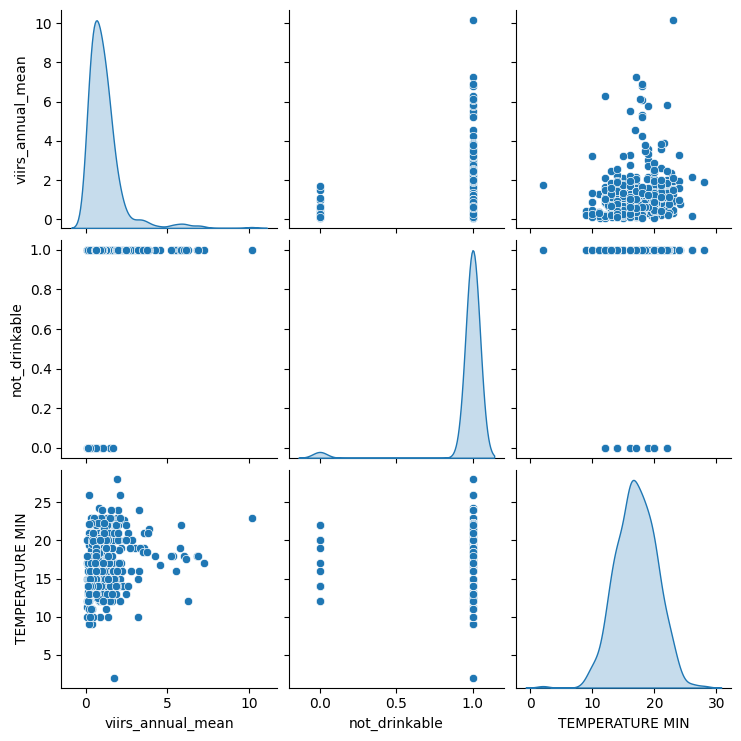

In [133]:

# Data Visualization
sns.pairplot(data[['viirs_annual_mean', 'not_drinkable', 'NITRATE MIN', 'TEMPERATURE MIN']], diag_kind='kde')
plt.show()


In [134]:

# Simple Linear Regression (Example: not_drinkable)
X = sm.add_constant(data['not_drinkable'])
model = sm.OLS(data['viirs_annual_mean'], X).fit()
print(model.summary())




                            OLS Regression Results                            
Dep. Variable:      viirs_annual_mean   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.781
Date:                Mon, 30 Oct 2023   Prob (F-statistic):             0.0960
Time:                        00:39:21   Log-Likelihood:                -780.24
No. Observations:                 516   AIC:                             1564.
Df Residuals:                     514   BIC:                             1573.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6432      0.294      2.188

In [136]:
# Check the data types of the columns
print(data.dtypes)

# Convert columns to numeric if they contain numbers as strings
data['NITRATE MIN'] = pd.to_numeric(data['NITRATE MIN'], errors='coerce')

# Verify the data types again
print(data.dtypes)

District                            object
matched_district_name               object
NAME_1                              object
NAME_2                              object
latitude                           float64
longitude                          float64
district_centroid                   object
1_Closest_Station                    int64
1_Distance                         float64
2_Closest_Station                    int64
2_Distance                         float64
3_Closest_Station                    int64
3_Distance                         float64
4_Closest_Station                    int64
4_Distance                         float64
5_Closest_Station                    int64
5_Distance                         float64
matched_pollution_station            int64
STATION CODE                       float64
NAME OF MONITORING LOCATION         object
STATE NAME                          object
TEMPERATURE MIN                    float64
TEMPERATURE MAX                    float64
DISSOLVED O

In [139]:
data = data.dropna(subset=['not_drinkable', 'NITRATE MIN\n(mg/L)'])
data = data.replace([np.inf, -np.inf], np.nan).dropna(subset=['not_drinkable', 'NITRATE MIN'])


KeyError: ['NITRATE MIN\n(mg/L)']

In [140]:

# Multiple Linear Regression (Example: not_drinkable and NITRATE MIN)
X = sm.add_constant(data[['not_drinkable', 'NITRATE MIN']])
model = sm.OLS(data['viirs_annual_mean'], X).fit()
print(model.summary())



MissingDataError: exog contains inf or nans

In [141]:
# Multiple Linear Regression (including more variables)
X = sm.add_constant(data[['not_drinkable', 'NITRATE MIN', 'pH Max', 'TEMPERATURE MAX']])
model = sm.OLS(data['viirs_annual_mean'], X).fit()
print(model.summary())


MissingDataError: exog contains inf or nans

In [142]:
data.isnull().sum()


District                            0
matched_district_name               0
NAME_1                              0
NAME_2                              0
latitude                            0
longitude                           0
district_centroid                   0
1_Closest_Station                   0
1_Distance                          0
2_Closest_Station                   0
2_Distance                          0
3_Closest_Station                   0
3_Distance                          0
4_Closest_Station                   0
4_Distance                          0
5_Closest_Station                   0
5_Distance                          0
matched_pollution_station           0
STATION CODE                        0
NAME OF MONITORING LOCATION         0
STATE NAME                          0
TEMPERATURE MIN                     0
TEMPERATURE MAX                     0
DISSOLVED OXYGEN MIN                0
DISSOLVED OXYGEN MAX                0
pH Min                              0
pH Max      

In [75]:
print(data.isnull().sum())  # Check for NaN
print(data.isin([np.inf, -np.inf]).sum())  # Check for inf


District                                   0
matched_district_name                      0
NAME_1                                     0
NAME_2                                     0
latitude                                   0
longitude                                  0
district_centroid                          0
1_Closest_Station                          0
1_Distance                                 0
2_Closest_Station                          0
2_Distance                                 0
3_Closest_Station                          0
3_Distance                                 0
4_Closest_Station                          0
4_Distance                                 0
5_Closest_Station                          0
5_Distance                                 0
matched_pollution_station                  0
STATION CODE                               0
NAME OF MONITORING LOCATION                0
STATE NAME                                 0
TEMPERATURE MIN                            0
TEMPERATUR

In [143]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)  # Convert inf to NaN
data.fillna(data.mean(), inplace=True)  # Fill NaN with mean


/var/folders/wm/jf5bq5r94mqgp8j4gnpmb7xw0000gn/T/ipykernel_72647/779073026.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)  # Fill NaN with mean


In [144]:
print(data['log_not_drinkable'].isnull().sum())
print(data['log_NITRATE_MIN'].isnull().sum())
print(data.isin([np.inf, -np.inf]).sum())


KeyError: 'log_not_drinkable'

In [146]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Rename the column for easier usage in the formula
data.rename(columns={'NITRATE MIN': 'NITRATE_MIN'}, inplace=True)



# Scale the columns of interest
scaler = StandardScaler()
data[['not_drinkable', 'NITRATE_MIN']] = scaler.fit_transform(data[['not_drinkable', 'NITRATE_MIN']])
# Compute the logarithm of the columns




data['log_viirs_annual_mean'] = np.log(data['viirs_annual_mean'])
data['log_not_drinkable'] = np.log(data['not_drinkable'])
data['log_NITRATE_MIN'] = np.log(data['NITRATE_MIN'])

# Replace NaN values in 'log_NITRATE_MIN' with the mean of the column
mean_log_NITRATE_MIN = data['log_NITRATE_MIN'].mean()
data['log_NITRATE_MIN'].fillna(mean_log_NITRATE_MIN, inplace=True)

# Fit the OLS model with the updated column names
model = smf.ols(formula='log_viirs_annual_mean ~ log_not_drinkable + log_NITRATE_MIN + C(District) + C(Year)', data=data).fit()

print(model.summary())

/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value


LinAlgError: SVD did not converge

In [147]:
# Drop rows with missing or infinite values in the columns used for regression
data = data.dropna(subset=['not_drinkable', 'viirs_annual_mean'])
data = data.replace([np.inf, -np.inf], np.nan).dropna(subset=['not_drinkable', 'viirs_annual_mean'])

# Remove any zero or negative values for log transformation
data = data[data['not_drinkable'] > 0]
data = data[data['viirs_annual_mean'] > 0]

In [148]:
# Log-Log Models
# Example: log-log model for 'not_drinkable' and 'viirs_annual_mean'
X = sm.add_constant(np.log(data['not_drinkable']))
model = sm.OLS(np.log(data['viirs_annual_mean']), X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      viirs_annual_mean   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 30 Oct 2023   Prob (F-statistic):                nan
Time:                        00:40:53   Log-Likelihood:                -617.58
No. Observations:                 502   AIC:                             1237.
Df Residuals:                     501   BIC:                             1241.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
not_drinkable     0.1124      0.021      5.438

In [90]:

#Build correlational model between log viirs_annual_mean and not_drinkable, log nitrate, log temperature, etc and district fixed effects and year fixed effects

#first a multi-linear log-log model
# Clean the 'NITRATE MAX (mg/L)' column to convert non-convertible entries to NaN
data = cleaned_pollution_nightlight_data.copy()

# Clean and handle 'NITRATE MAX (mg/L)'
data['NITRATE MAX (mg/L)'] = pd.to_numeric(data['NITRATE MAX (mg/L)'], errors='coerce')

# Apply log transformation and handle NaNs
data['log_nitrate'] = np.log(data['NITRATE MAX (mg/L)'])
data['log_nitrate'].fillna(data['log_nitrate'].mean(), inplace=True)

# Prepare the dependent variable (log viirs_annual_mean)
data['log_viirs'] = np.log(data['viirs_annual_mean'])
X = data[['log_nitrate']]
y = data['log_viirs']

# Check for and handle infinite or extremely large values
inf_mask = np.isfinite(X)
X = X[inf_mask]
y = y[inf_mask]

ridge = Ridge(alpha=1.0)
ridge.fit(X, y)
print(model.summary())


/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


TypeError: Indexing a Series with DataFrame is not supported, use the appropriate DataFrame column

In [96]:
from sklearn.linear_model import Ridge
import numpy as np

data = cleaned_pollution_nightlight_data.copy()

# Clean and handle 'NITRATE MAX (mg/L)'
data['NITRATE MAX (mg/L)'] = pd.to_numeric(data['NITRATE MAX (mg/L)'], errors='coerce')

# Apply log transformation and handle NaNs
data['log_nitrate'] = np.log(data['NITRATE MAX (mg/L)'])
data['log_nitrate'].fillna(data['log_nitrate'].mean(), inplace=True)

# Prepare the dependent variable (log viirs_annual_mean)
data['log_viirs'] = np.log(data['viirs_annual_mean'])

# Filter NaN values
valid_indices = ~data['log_viirs'].isnull()
data = data[valid_indices]

X = data[['log_nitrate']]
y = data['log_viirs']

# Check for and handle infinite or extremely large values in X
inf_mask = np.isfinite(X)
X = X.loc[inf_mask.values]
y = y.loc[inf_mask.values]

# Convert the Series to NumPy arrays
X = X.values.reshape(-1, 1)
y = y.values

# Initialize and fit the Ridge regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X, y)

/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Ridge()

In [98]:
# Get the intercept and coefficients
intercept = ridge.intercept_
coefficients = ridge.coef_

print("Intercept:", intercept)
print("Coefficients:", coefficients)

Intercept: -0.05178575534588971
Coefficients: [0.13442254]


In [106]:
import statsmodels.api as sm

data = cleaned_pollution_nightlight_data.copy()

# Convert the 'NITRATE MAX (mg/L)' column to numeric values, coercing errors to NaN
data['NITRATE MAX (mg/L)'] = pd.to_numeric(data['NITRATE MAX (mg/L)'], errors='coerce')

# Apply the log transformation to non-negative and non-NaN values
data['log_nitrate'] = np.where((data['NITRATE MAX (mg/L)'] > 0) & (~data['NITRATE MAX (mg/L)'].isnull()), 
                               np.log(data['NITRATE MAX (mg/L)']), 
                               np.nan)

# Log-transform the columns
data['log_viirs'] = np.log(data['viirs_annual_mean'])
data['log_nitrate'] = np.log(data['NITRATE MAX (mg/L)'])
data['log_pc11_pca_tot_p'] = np.log(data['pc11_pca_tot_p'])
data['log_TEMPERATURE_MAX'] = np.log(data['TEMPERATURE MAX'])

# Apply the model
model = smf.ols('log_viirs ~ log_nitrate + log_pc11_pca_tot_p + log_TEMPERATURE_MAX + C(District) + C(Year) - 1', data=data)
result = model.fit()
print(result.summary())

/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value


LinAlgError: SVD did not converge

In [48]:
data.columns

Index(['District', 'matched_district_name', 'NAME_1', 'NAME_2', 'latitude',
       'longitude', 'district_centroid', '1_Closest_Station', '1_Distance',
       '2_Closest_Station', '2_Distance', '3_Closest_Station', '3_Distance',
       '4_Closest_Station', '4_Distance', '5_Closest_Station', '5_Distance',
       'matched_pollution_station', 'STATION CODE',
       'NAME OF MONITORING LOCATION', 'STATE NAME', 'TEMPERATURE_MIN',
       'TEMPERATURE_MAX', 'DISSOLVED_OXYGEN_MIN', 'DISSOLVED_OXYGEN_MAX',
       'pH_Min', 'pH_Max', 'CONDUCTIVITY_Min', 'CONDUCTIVITY_Max',
       'BIOCHEMICAL_OXYGEN_DEMAND_Min', 'BIO_CHEMICAL_OXYGEN_DEMAND_Max',
       'NITRATE_MIN', 'NITRATE_MAX', 'FECAL_COLIFORM_MIN',
       'FECAL_COLIFORM_MAX', 'TOTAL_COLIFORM_MIN', 'TOTAL_COLIFORM_MAX',
       'Year', 'not_drinkable', 'nightlight_district_matched',
       'pc11_district_id', 'pc11_state_id', 'year', 'state_name',
       'district_name', 'viirs_annual_min', 'viirs_annual_max',
       'viirs_annual_mean', 'vi

In [49]:
data = cleaned_pollution_nightlight_data.copy()

In [50]:
data.columns

Index(['District', 'matched_district_name', 'NAME_1', 'NAME_2', 'latitude',
       'longitude', 'district_centroid', '1_Closest_Station', '1_Distance',
       '2_Closest_Station', '2_Distance', '3_Closest_Station', '3_Distance',
       '4_Closest_Station', '4_Distance', '5_Closest_Station', '5_Distance',
       'matched_pollution_station', 'STATION CODE',
       'NAME OF MONITORING LOCATION', 'STATE NAME', 'TEMPERATURE_MIN',
       'TEMPERATURE_MAX', 'DISSOLVED_OXYGEN_MIN', 'DISSOLVED_OXYGEN_MAX',
       'pH_Min', 'pH_Max', 'CONDUCTIVITY_Min', 'CONDUCTIVITY_Max',
       'BIOCHEMICAL_OXYGEN_DEMAND_Min', 'BIO_CHEMICAL_OXYGEN_DEMAND_Max',
       'NITRATE_MIN', 'NITRATE_MAX', 'FECAL_COLIFORM_MIN',
       'FECAL_COLIFORM_MAX', 'TOTAL_COLIFORM_MIN', 'TOTAL_COLIFORM_MAX',
       'Year', 'not_drinkable', 'nightlight_district_matched',
       'pc11_district_id', 'pc11_state_id', 'year', 'state_name',
       'district_name', 'viirs_annual_min', 'viirs_annual_max',
       'viirs_annual_mean', 'vi

In [161]:
# Create a fixed effects model with district and year fixed effects
data.columns = data.columns.str.replace(' ', '_')  # Replace spaces with underscores in column names
model = sm.OLS.from_formula('viirs_annual_mean ~ not_drinkable + C(Year) - 1', data=data)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:      viirs_annual_mean   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     9.415
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           7.80e-15
Time:                        01:06:40   Log-Likelihood:                -1070.7
No. Observations:                 763   AIC:                             2163.
Df Residuals:                     752   BIC:                             2214.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
C(Year)[2012.0]    -0.2913      0.241     

In [174]:
data.columns

Index(['District', 'matched_district_name', 'NAME_1', 'NAME_2', 'latitude',
       'longitude', 'district_centroid', '1_Closest_Station', '1_Distance',
       '2_Closest_Station', '2_Distance', '3_Closest_Station', '3_Distance',
       '4_Closest_Station', '4_Distance', '5_Closest_Station', '5_Distance',
       'matched_pollution_station', 'STATION CODE',
       'NAME OF MONITORING LOCATION', 'STATE NAME', 'TEMPERATURE MIN',
       'TEMPERATURE MAX', 'DISSOLVED OXYGEN MIN', 'DISSOLVED OXYGEN MAX',
       'pH Min', 'pH Max', 'CONDUCTIVITY Min', 'CONDUCTIVITY Max',
       'BIO- CHEMICAL OXYGEN DEMAND Min', 'BIO- CHEMICAL OXYGEN DEMAND Max',
       'NITRATE MIN', 'NITRATE MAX', 'FECAL COLIFORM MIN',
       'FECAL COLIFORM MAX', 'TOTAL COLIFORM MIN', 'TOTAL COLIFORM MAX',
       'Year', 'not_drinkable', 'nightlight_district_matched',
       'pc11_district_id', 'pc11_state_id', 'year', 'state_name',
       'district_name', 'viirs_annual_min', 'viirs_annual_max',
       'viirs_annual_mean', 

In [165]:
data = cleaned_pollution_nightlight_data.copy()

In [168]:
model = sm.OLS.from_formula('viirs_annual_mean ~ not_drinkable + ("NITRATE MAX") + ("TEMPERATURE MAX") + C(District) + C(Year)', data=data)
results = model.fit()
print(results.summary())



PatsyError: Number of rows mismatch between data argument and "NITRATE MAX" (829 versus 1)
    viirs_annual_mean ~ not_drinkable + ("NITRATE MAX") + ("TEMPERATURE MAX") + C(District) + C(Year)
                                        ^^^^^^^^^^^^^^^

In [225]:
data = cleaned_pollution_nightlight_data.copy()


In [226]:
data.columns

Index(['District', 'matched_district_name', 'NAME_1', 'NAME_2', 'latitude',
       'longitude', 'district_centroid', '1_Closest_Station', '1_Distance',
       '2_Closest_Station', '2_Distance', '3_Closest_Station', '3_Distance',
       '4_Closest_Station', '4_Distance', '5_Closest_Station', '5_Distance',
       'matched_pollution_station', 'STATION CODE',
       'NAME OF MONITORING LOCATION', 'STATE NAME', 'TEMPERATURE_MIN',
       'TEMPERATURE_MAX', 'DISSOLVED_OXYGEN_MIN', 'DISSOLVED_OXYGEN_MAX',
       'pH_Min', 'pH_Max', 'CONDUCTIVITY_Min', 'CONDUCTIVITY_Max',
       'BIOCHEMICAL_OXYGEN_DEMAND_Min', 'BIO_CHEMICAL_OXYGEN_DEMAND_Max',
       'NITRATE_MIN', 'NITRATE_MAX', 'FECAL_COLIFORM_MIN',
       'FECAL_COLIFORM_MAX', 'TOTAL_COLIFORM_MIN', 'TOTAL_COLIFORM_MAX',
       'Year', 'not_drinkable', 'nightlight_district_matched',
       'pc11_district_id', 'pc11_state_id', 'year', 'state_name',
       'district_name', 'viirs_annual_min', 'viirs_annual_max',
       'viirs_annual_mean', 'vi

In [215]:
# Assume your column names are as follows
continuous_variables = ['NITRATE_MAX', 'FECAL_COLIFORM_MAX', 'TOTAL_COLIFORM_MAX', 'pH_Max', 'TEMPERATURE_MAX', 'DISSOLVED_OXYGEN_MAX', 'BIO_CHEMICAL_OXYGEN_DEMAND_Max', 'CONDUCTIVITY_Max']
lagged_variables = ['lag_NITRATE', 'lag_TEMPERATURE', 'lag_DISSOLVED_OXYGEN', 'lag_FECAL_COLIFORM', 'lag_pH', 'lag_BIO_CHEMICAL_OXYGEN_DEMAND', 'lag_conductivity', 'lag_TOTAL_COLIFORM']
categorical_variable = 'not_drinkable'
target_variable = 'viirs_annual_mean'


In [181]:

# Convert 'NITRATE MAX' column to numeric, handling non-convertible entries as NaN
data['NITRATE_MAX'] = pd.to_numeric(data['NITRATE_MAX'], errors='coerce')
# Check for and handle missing or NaN values
data['log_NITRATE_MAX'] = np.log(data['NITRATE MAX'].replace(0, np.nan))  # Replace zeros with NaN to avoid log(0)
data['log_NITRATE_MAX'] = data['log_NITRATE_MAX'].fillna(data['log_NITRATE_MAX'].mean())  # Fill NaN values with the mean



In [182]:

# Log-transform continuous variables
data['log_NITRATE_MAX'] = np.log(data['NITRATE MAX'])
data['log_TEMPERATURE_MAX'] = np.log(data['TEMPERATURE MAX'])
data['log_DISSOLVED_OXYGEN_MAX'] = np.log(data['DISSOLVED OXYGEN MAX'])


/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [183]:

# Create lagged variables
data['lag_NITRATE'] = data['NITRATE MAX'].shift(1)
data['lag_TEMPERATURE'] = data['TEMPERATURE MAX'].shift(1)
data['lag_DISSOLVED_OXYGEN'] = data['DISSOLVED OXYGEN MAX'].shift(1)
data['lag_log_NITRATE'] = data['log_NITRATE_MAX'].shift(1)
data['lag_log_TEMPERATURE'] = data['log_TEMPERATURE_MAX'].shift(1)
data['lag_log_DISSOLVED_OXYGEN'] = data['log_DISSOLVED_OXYGEN_MAX'].shift(1)


In [186]:

# Create combinations of different variables
variables_combinations = []
for r in range(1, len(continuous_variables) + len(lagged_variables) + 1):
    variables_combinations.extend(combinations(continuous_variables + lagged_variables + [categorical_variable], r))

# Fit models and collect results
results = {}
for idx, variables in enumerate(variables_combinations):
    formula = target_variable + ' ~ ' + ' + '.join(variables)
    model = smf.ols(formula, data=data)
    fitted_model = model.fit()
    results[f'Model_{idx + 1}'] = fitted_model.summary()



SyntaxError: invalid syntax (<unknown>, line 1)

In [ ]:
# Export results to an Excel file
with pd.ExcelWriter('regression_results.xlsx') as writer:
    for model, summary in results.items():
        summary.tables[1].to_excel(writer, sheet_name=model)


In [175]:
# Assuming 'viirs_annual_mean' is the target variable, and you want to create a model with 'NITRATE MAX'
formula = 'viirs_annual_mean ~ log_NITRATE_MAX + TEMPERATURE_MAX + not_drinkable + C(District) + C(Year)'

# Replace spaces in column names with underscores and compute log transformation
data.rename(columns={'NITRATE MAX': 'log_NITRATE_MAX', 'TEMPERATURE MAX': 'TEMPERATURE_MAX'}, inplace=True)
data['log_NITRATE_MAX'] = np.log(data['NITRATE MAX'])
data['log_NITRATE_MAX'].fillna(data['log_NITRATE_MAX'].mean(), inplace=True)

# Fit the OLS model
model = smf.ols(formula, data=data)
result = model.fit()

# Display model summary
print(result.summary())


KeyError: 'NITRATE MAX'

In [228]:
# Verify the column names
print(data.columns)

Index(['District', 'matched_district_name', 'NAME_1', 'NAME_2', 'latitude',
       'longitude', 'district_centroid', '1_Closest_Station', '1_Distance',
       '2_Closest_Station', '2_Distance', '3_Closest_Station', '3_Distance',
       '4_Closest_Station', '4_Distance', '5_Closest_Station', '5_Distance',
       'matched_pollution_station', 'STATION CODE',
       'NAME OF MONITORING LOCATION', 'STATE NAME', 'TEMPERATURE_MIN',
       'TEMPERATURE_MAX', 'DISSOLVED_OXYGEN_MIN', 'DISSOLVED_OXYGEN_MAX',
       'pH_Min', 'pH_Max', 'CONDUCTIVITY_Min', 'CONDUCTIVITY_Max',
       'BIOCHEMICAL_OXYGEN_DEMAND_Min', 'BIO_CHEMICAL_OXYGEN_DEMAND_Max',
       'NITRATE_MIN', 'NITRATE_MAX', 'FECAL_COLIFORM_MIN',
       'FECAL_COLIFORM_MAX', 'TOTAL_COLIFORM_MIN', 'TOTAL_COLIFORM_MAX',
       'Year', 'not_drinkable', 'nightlight_district_matched',
       'pc11_district_id', 'pc11_state_id', 'year', 'state_name',
       'district_name', 'viirs_annual_min', 'viirs_annual_max',
       'viirs_annual_mean', 'vi

In [227]:
from itertools import combinations

# Define the continuous, lagged, and categorical variables, along with the target variable
continuous_variables = ['NITRATE_MAX', 'FECAL_COLIFORM_MAX', 'TOTAL_COLIFORM_MAX', 'pH_Max', 'TEMPERATURE_MAX', 'DISSOLVED_OXYGEN_MAX', 'BIO_CHEMICAL_OXYGEN_DEMAND_Max', 'CONDUCTIVITY_Max']
lagged_variables = ['lag_NITRATE', 'lag_TEMPERATURE', 'lag_DISSOLVED_OXYGEN', 'lag_FECAL_COLIFORM', 'lag_pH', 'lag_BIO_CHEMICAL_OXYGEN_DEMAND', 'lag_CONDUCTIVITY', 'lag_TOTAL_COLIFORM']
categorical_variable = 'not_drinkable'
target_variable = 'viirs_annual_mean'

# Create combinations of different variables
variables_combinations = []
for r in range(1, len(continuous_variables) + len(lagged_variables) + 2):
    variables_combinations.extend(combinations(continuous_variables + lagged_variables + [categorical_variable], r))

# Fit models and collect results
results = {}
for idx, variables in enumerate(variables_combinations):
    formula = target_variable + ' ~ ' + ' + '.join(['`' + var + '`' if ' ' in var else var for var in variables])
    model = smf.ols(formula, data=data)
    fitted_model = model.fit()
    results[f'Model_{idx + 1}'] = fitted_model.summary()


PatsyError: Error evaluating factor: NameError: name 'lag_NITRATE' is not defined
    viirs_annual_mean ~ lag_NITRATE
                        ^^^^^^^^^^^

In [ ]:
# Assume your column names are as follows
continuous_variables = ['NITRATE_MAX', 'FECAL_COLIFORM_MAX', 'TOTAL_COLIFORM_MAX', 'pH_Max', 'TEMPERATURE_MAX', 'DISSOLVED_OXYGEN_MAX', 'BIO_CHEMICAL_OXYGEN_DEMAND_Max', 'CONDUCTIVITY_Max']
lagged_variables = ['lag_NITRATE', 'lag_TEMPERATURE', 'lag_DISSOLVED_OXYGEN', 'lag_FECAL_COLIFORM', 'lag_pH', 'lag_BIO_CHEMICAL_OXYGEN_DEMAND', 'lag_conductivity', 'lag_TOTAL_COLIFORM']
categorical_variable = 'not_drinkable'
target_variable = 'viirs_annual_mean'


In [229]:
# Assuming 'viirs_annual_mean' is the target variable, and you want to create a model with 'NITRATE MAX'
formula = 'viirs_annual_mean ~ log_NITRATE_MAX + TEMPERATURE_MAX + not_drinkable + C(District) + C(Year)'

# Replace spaces in column names with underscores and compute log transformation
data.rename(columns={'NITRATE MAX': 'log_NITRATE_MAX', 'TEMPERATURE MAX': 'TEMPERATURE_MAX'}, inplace=True)
data['log_NITRATE_MAX'] = np.log(data['NITRATE MAX'])
data['log_NITRATE_MAX'].fillna(data['log_NITRATE_MAX'].mean(), inplace=True)

# Fit the OLS model
model = smf.ols(formula, data=data)
result = model.fit()

# Display model summary
print(result.summary())


KeyError: 'NITRATE MAX'

In [230]:

# Example columns representing measurements
columns = ['NITRATE_MAX', 'FECAL_COLIFORM_MAX', 'TOTAL_COLIFORM_MAX', 'pH_Max', 'TEMPERATURE_MAX', 'DISSOLVED_OXYGEN_MAX', 'BIO_CHEMICAL_OXYGEN_DEMAND_Max', 'CONDUCTIVITY_Max']

# Load your data as 'data'
data = cleaned_pollution_nightlight_data.copy()

# Generating lag columns for each measurement
lags = 3  # Number of lags to create

for col in columns:
    for lag in range(1, lags + 1):
        data[f'{col}_lag_{lag}'] = data[col].shift(lag)

# Example to demonstrate how the lag columns look like
# Show the columns of the DataFrame
print(data.columns)


Index(['District', 'matched_district_name', 'NAME_1', 'NAME_2', 'latitude',
       'longitude', 'district_centroid', '1_Closest_Station', '1_Distance',
       '2_Closest_Station', '2_Distance', '3_Closest_Station', '3_Distance',
       '4_Closest_Station', '4_Distance', '5_Closest_Station', '5_Distance',
       'matched_pollution_station', 'STATION CODE',
       'NAME OF MONITORING LOCATION', 'STATE NAME', 'TEMPERATURE_MIN',
       'TEMPERATURE_MAX', 'DISSOLVED_OXYGEN_MIN', 'DISSOLVED_OXYGEN_MAX',
       'pH_Min', 'pH_Max', 'CONDUCTIVITY_Min', 'CONDUCTIVITY_Max',
       'BIOCHEMICAL_OXYGEN_DEMAND_Min', 'BIO_CHEMICAL_OXYGEN_DEMAND_Max',
       'NITRATE_MIN', 'NITRATE_MAX', 'FECAL_COLIFORM_MIN',
       'FECAL_COLIFORM_MAX', 'TOTAL_COLIFORM_MIN', 'TOTAL_COLIFORM_MAX',
       'Year', 'not_drinkable', 'nightlight_district_matched',
       'pc11_district_id', 'pc11_state_id', 'year', 'state_name',
       'district_name', 'viirs_annual_min', 'viirs_annual_max',
       'viirs_annual_mean', 'vi

In [232]:
# Define your variables
continuous_variables = ['NITRATE_MAX', 'FECAL_COLIFORM_MAX', 'TOTAL_COLIFORM_MAX', 'pH_Max', 'TEMPERATURE_MAX', 'DISSOLVED_OXYGEN_MAX', 'BIO_CHEMICAL_OXYGEN_DEMAND_Max', 'CONDUCTIVITY_Max']
categorical_variable = 'not_drinkable'
target_variable = 'viirs_annual_mean'
fixed_effects = ['District', 'Year']  # Include your fixed effects variables

# Create combinations of different variables
variables_combinations = []
for r in range(1, len(continuous_variables) + 1):
    variables_combinations.extend(combinations(continuous_variables, r))

# Fit models and collect results
results = []
for variables in variables_combinations:
    formula = f"{target_variable} ~ {' + '.join(continuous_variables)} + {categorical_variable} + {' + '.join(fixed_effects)}"
    model = smf.ols(formula, data=data)
    fitted_model = model.fit()
    results.append(fitted_model.summary())

# Create a DataFrame with results
results_df = pd.DataFrame(results, columns=['Model_Results'])

# Save the results to an Excel file
results_df.to_excel('multiple_regression_results.xlsx', index=False)

In [240]:
data = cleaned_pollution_nightlight_data.copy()
# Define variables
continuous_variables = ['NITRATE_MAX', 'FECAL_COLIFORM_MAX', 'TOTAL_COLIFORM_MAX', 'pH_Max', 'TEMPERATURE_MAX', 'DISSOLVED_OXYGEN_MAX', 'BIO_CHEMICAL_OXYGEN_DEMAND_Max', 'CONDUCTIVITY_Max']
categorical_variable = 'not_drinkable'
target_variable = 'viirs_annual_mean'

data['NITRATE_MAX'] = pd.to_numeric(data['NITRATE_MAX'], errors='coerce')
# Create lag variables for each continuous variable
lagged_data = data.copy()
lags = 3  # Define the number of lags

for var in continuous_variables:
    for i in range(1, lags + 1):
        lag_var = f"{var}_lag_{i}"
        lagged_data[lag_var] = lagged_data[var].shift(i)

# Fit models and save results to an Excel file with each model's output in a separate sheet
model_results = {}
for var in continuous_variables:
    variables = [var] + [f"{var}_lag_{i}" for i in range(1, lags + 1)]
    formula = f"{target_variable} ~ {' + '.join(variables)} + {categorical_variable}"
    model = smf.ols(formula, data=lagged_data)
    fitted_model = model.fit()

    # Get the model's summary as a string
    model_results[var] = fitted_model.summary().as_text()

# Write each model's output to a separate sheet in an Excel file
with pd.ExcelWriter('regression_results.xlsx') as writer:
    for var, result in model_results.items():
        sheet_name = f'{var}_model_output'
        pd.DataFrame({"Results": [result]}).to_excel(writer, sheet_name=sheet_name, index=False)


/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


In [239]:
data['NITRATE_MAX'].dtype

dtype('O')

In [253]:
data = cleaned_pollution_nightlight_data.copy()
# Assuming continuous_columns contains the names of numerical columns for log transformation
continuous_columns = ['NITRATE_MAX', 'FECAL_COLIFORM_MAX', 'TOTAL_COLIFORM_MAX', 'pH_Max', 'TEMPERATURE_MAX', 'DISSOLVED_OXYGEN_MAX', 'BIO_CHEMICAL_OXYGEN_DEMAND_Max', 'CONDUCTIVITY_Max']

# Apply log transformation to the selected columns
for column in continuous_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')
    non_zero_values = data[column][data[column] > 0]  # Filter out non-positive values
    data[f"log_{column}"] = np.log(non_zero_values)
# Define the categorical variable and target variable
categorical_variable = 'not_drinkable'
target_variable = 'viirs_annual_mean'

# Generate combinations for log-log regression models
variables_combinations = []
for r in range(1, len(continuous_columns) + 1):
    variables_combinations.extend(combinations([f"log_{col}" for col in continuous_columns], r))

# Fit models and save results in an Excel file
with pd.ExcelWriter('log_log_regression_results.xlsx') as writer:
    for idx, variables in enumerate(variables_combinations):
        variable_names = ' + '.join(variables)
        formula = f'{target_variable} ~ {variable_names} + {categorical_variable}'
        model = smf.ols(formula, data=data)
        fitted_model = model.fit()
        sheet_name = f"loglog_model_{idx + 1}_{'_'.join(variables)}"
        fitted_model.summary().tables[1].to_excel(writer, sheet_name=sheet_name)


IndexError: At least one sheet must be visible

In [2]:
data = cleaned_pollution_nightlight_data.copy()

# Assuming continuous_columns contains the names of numerical columns for log transformation
continuous_columns = ['NITRATE_MAX', 'FECAL_COLIFORM_MAX', 'TOTAL_COLIFORM_MAX', 'pH_Max', 'TEMPERATURE_MAX', 'DISSOLVED_OXYGEN_MAX', 'BIO_CHEMICAL_OXYGEN_DEMAND_Max', 'CONDUCTIVITY_Max']

# Apply log transformation to the selected columns
for column in continuous_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')
    non_zero_values = data[column][data[column] > 0]  # Filter out non-positive values
    data[f"log_{column}"] = np.log(non_zero_values)

# Define the categorical variable and target variable
categorical_variable = 'not_drinkable'
target_variable = 'viirs_annual_mean'

# Generate combinations for log-log regression models
variables_combinations = []
for r in range(1, len(continuous_columns) + 1):
    variables_combinations.extend(combinations([f"log_{col}" for col in continuous_columns], r))

# Create a dummy DataFrame to ensure there is at least one visible sheet
empty_df = pd.DataFrame(columns=["A"])
with pd.ExcelWriter('log_log_regression_results.xlsx', engine='openpyxl') as writer:
    empty_df.to_excel(writer, sheet_name='Sheet1', index=False)
    
    # Loop through the models and save each to a separate sheet
    for idx, variables in enumerate(variables_combinations):
        variable_names = ' + '.join(variables)
        formula = f'{target_variable} ~ {variable_names} + {categorical_variable}'
        model = smf.ols(formula, data=data)
        fitted_model = model.fit()
        sheet_name = f"loglog_model_{idx + 1}_{'_'.join(variables)}"
        df = pd.DataFrame(fitted_model.summary().tables[1])
        df.to_excel(writer, sheet_name=sheet_name, index=True)


NameError: name 'cleaned_pollution_nightlight_data' is not defined

In [1]:
data.columns

NameError: name 'data' is not defined

In [259]:

data = cleaned_pollution_nightlight_data.copy()
# Define variables
continuous_variables = ['NITRATE_MAX', 'FECAL_COLIFORM_MAX', 'TOTAL_COLIFORM_MAX', 'pH_Max', 'TEMPERATURE_MAX', 'DISSOLVED_OXYGEN_MAX', 'BIO_CHEMICAL_OXYGEN_DEMAND_Max', 'CONDUCTIVITY_Max']
lagged_variables = ['lag1_var1', 'lag2_var1', 'lag1_var2']  # List of lagged variables
categorical_variable = 'category'  # Categorical variable
target_variable = 'viirs_annual_mean'  # Target variable

# Create different regression models
models = {
    "Simple Linear Regression": continuous_variables,
    "Log-Log Models": [f"log_{var}" for var in continuous_variables],
    "Lagged Models": lagged_variables,
    "Fixed Effects Models": [f'{var}*C(district)' for var in continuous_variables]  # Considering district fixed effects
}

results = {}  # Store the models' summaries

# Fit and collect results for each model
for model, variables in models.items():
    formula = f"{target_variable} ~ {' + '.join(variables)} + {categorical_variable}"
    fitted_model = smf.ols(formula, data=data).fit()
    results[model] = fitted_model.summary()

# Analyze the results to identify significant variables and causation
# Examine coefficients, p-values, and perform additional tests for causality

# Output the summary results or further analysis...


PatsyError: Error evaluating factor: NameError: name 'category' is not defined
    viirs_annual_mean ~ NITRATE_MAX + FECAL_COLIFORM_MAX + TOTAL_COLIFORM_MAX + pH_Max + TEMPERATURE_MAX + DISSOLVED_OXYGEN_MAX + BIO_CHEMICAL_OXYGEN_DEMAND_Max + CONDUCTIVITY_Max + category
                                                                                                                                                                                      ^^^^^^^^

Find stretches of pulluted river using BOD as variable


In [54]:
data = cleaned_pollution_nightlight_data.copy()

In [56]:
data.head()

,District,matched_district_name,NAME_1,NAME_2,latitude,longitude,district_centroid,1_Closest_Station,1_Distance,2_Closest_Station,...,state_name,district_name,viirs_annual_min,viirs_annual_max,viirs_annual_mean,viirs_annual_sum,viirs_annual_num_cells,pc11_pca_tot_p,pc11_pca_no_hh,nightlight_per_capita
0,Agra,Agra,Uttar Pradesh,Agra,27.007505,78.062924,POINT (78.06292448694016 27.00750514448138),1126,19.888379,1125,...,uttar pradesh,agra,0.0,60.754906,1.922315,42942.593750,22339.0,4418797.0,710566.0,4.350313e-07
1,Agra,Agra,Uttar Pradesh,Agra,27.007505,78.062924,POINT (78.06292448694016 27.00750514448138),1126,19.888379,1125,...,uttar pradesh,agra,0.0,50.201164,1.935065,43227.419922,22339.0,4418797.0,710566.0,4.379167e-07
2,Agra,Agra,Uttar Pradesh,Agra,27.007505,78.062924,POINT (78.06292448694016 27.00750514448138),1126,19.888379,1125,...,uttar pradesh,agra,0.0,68.892418,1.656543,37005.507812,22339.0,4418797.0,710566.0,3.748855e-07
3,Agra,Agra,Uttar Pradesh,Agra,27.007505,78.062924,POINT (78.06292448694016 27.00750514448138),1126,19.888379,1125,...,uttar pradesh,agra,0.0,65.482452,2.603362,58156.494141,22339.0,4418797.0,710566.0,5.891562e-07
4,Agra,Agra,Uttar Pradesh,Agra,27.007505,78.062924,POINT (78.06292448694016 27.00750514448138),1126,19.888379,1125,...,uttar pradesh,agra,0.0,57.359678,1.975266,44125.472656,22339.0,4418797.0,710566.0,4.470145e-07


In [58]:
data.columns

Index(['District', 'matched_district_name', 'NAME_1', 'NAME_2', 'latitude',
       'longitude', 'district_centroid', '1_Closest_Station', '1_Distance',
       '2_Closest_Station', '2_Distance', '3_Closest_Station', '3_Distance',
       '4_Closest_Station', '4_Distance', '5_Closest_Station', '5_Distance',
       'matched_pollution_station', 'STATION CODE',
       'NAME OF MONITORING LOCATION', 'STATE NAME', 'TEMPERATURE_MIN',
       'TEMPERATURE_MAX', 'DISSOLVED_OXYGEN_MIN', 'DISSOLVED_OXYGEN_MAX',
       'pH_Min', 'pH_Max', 'CONDUCTIVITY_Min', 'CONDUCTIVITY_Max',
       'BIOCHEMICAL_OXYGEN_DEMAND_Min', 'BIO_CHEMICAL_OXYGEN_DEMAND_Max',
       'NITRATE_MIN', 'NITRATE_MAX', 'FECAL_COLIFORM_MIN',
       'FECAL_COLIFORM_MAX', 'TOTAL_COLIFORM_MIN', 'TOTAL_COLIFORM_MAX',
       'Year', 'not_drinkable', 'nightlight_district_matched',
       'pc11_district_id', 'pc11_state_id', 'year', 'state_name',
       'district_name', 'viirs_annual_min', 'viirs_annual_max',
       'viirs_annual_mean', 'vi

In [64]:
data['BIO_CHEMICAL_OXYGEN_DEMAND_Max'].describe()

count    806.000000
mean       8.421005
std       22.884287
min        0.800000
25%        2.800000
50%        3.600000
75%        5.600000
max      440.000000
Name: BIO_CHEMICAL_OXYGEN_DEMAND_Max, dtype: float64

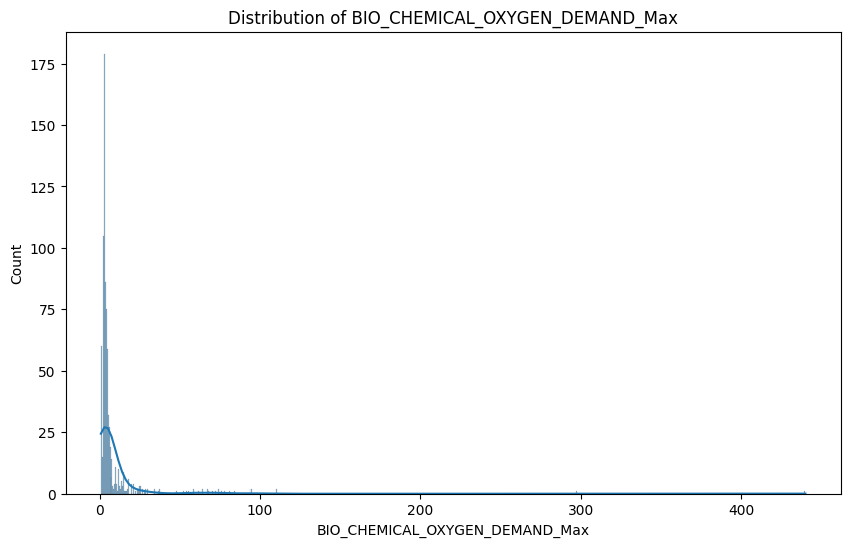

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of 'BIO_CHEMICAL_OXYGEN_DEMAND_Max'
plt.figure(figsize=(10, 6))
sns.histplot(data['BIO_CHEMICAL_OXYGEN_DEMAND_Max'], kde=True)
plt.title('Distribution of BIO_CHEMICAL_OXYGEN_DEMAND_Max')
plt.xlabel('BIO_CHEMICAL_OXYGEN_DEMAND_Max')
plt.show()


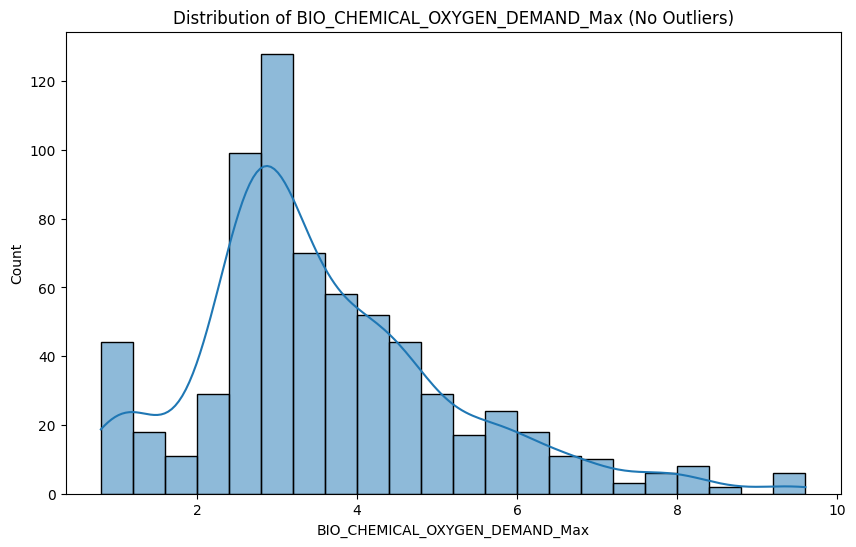

         latitude   longitude  1_Closest_Station  1_Distance  \
count  710.000000  710.000000         710.000000  710.000000   
mean    26.529530   82.581418        2954.192958   24.231263   
std      1.807346    3.056893        4372.778029   19.562513   
min     22.026699   77.276470        1046.000000    0.846939   
25%     25.471200   79.870689        1363.000000    9.405243   
50%     26.295363   82.606421        2476.500000   19.879935   
75%     27.436305   85.021656        2587.000000   33.608005   
max     30.978351   88.517220       30077.000000  106.044381   

       2_Closest_Station  2_Distance  3_Closest_Station  3_Distance  \
count         710.000000  710.000000         710.000000  710.000000   
mean         3616.233803   31.253899        4512.288732   35.073587   
std          3448.272426   23.369677        5972.163556   23.438849   
min          1052.000000    3.221451        1046.000000    4.942872   
25%          1487.000000   13.702822        1736.000000   15.156121 

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the IQR
Q1 = data['BIO_CHEMICAL_OXYGEN_DEMAND_Max'].quantile(0.25)
Q3 = data['BIO_CHEMICAL_OXYGEN_DEMAND_Max'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (data['BIO_CHEMICAL_OXYGEN_DEMAND_Max'] < lower_bound) | (data['BIO_CHEMICAL_OXYGEN_DEMAND_Max'] > upper_bound)

# Create a new DataFrame without outliers
df_no_outliers = data[~outliers].copy()

# Visualize the distribution without outliers
plt.figure(figsize=(10, 6))
sns.histplot(df_no_outliers['BIO_CHEMICAL_OXYGEN_DEMAND_Max'], kde=True)
plt.title('Distribution of BIO_CHEMICAL_OXYGEN_DEMAND_Max (No Outliers)')
plt.xlabel('BIO_CHEMICAL_OXYGEN_DEMAND_Max')
plt.show()

# Display the structure of the new DataFrame without outliers
print(df_no_outliers.describe())


In [67]:
df_no_outliers['BIO_CHEMICAL_OXYGEN_DEMAND_Max'].describe()

count    687.000000
mean       3.590000
std        1.624812
min        0.800000
25%        2.600000
50%        3.200000
75%        4.400000
max        9.600000
Name: BIO_CHEMICAL_OXYGEN_DEMAND_Max, dtype: float64

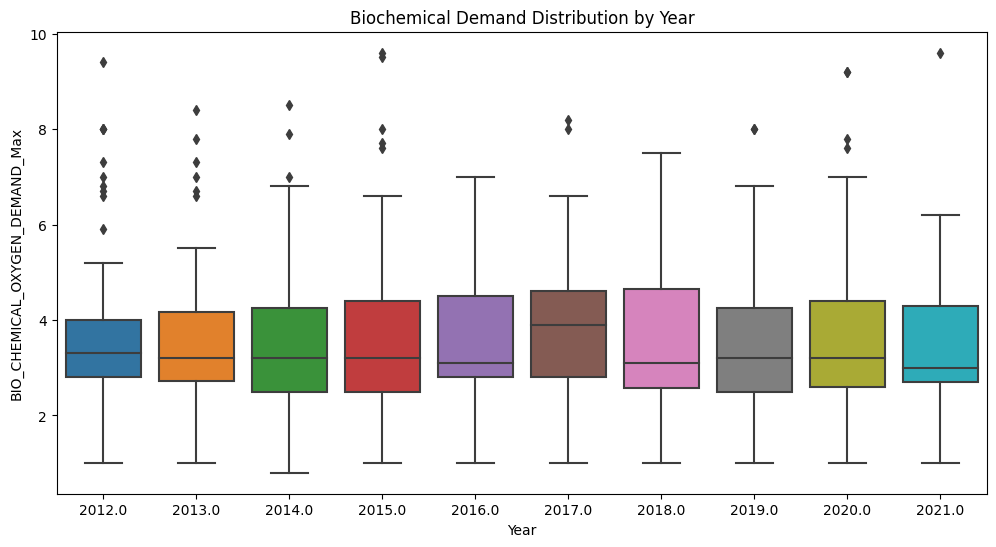

In [66]:
# Box plot to visualize the distribution of biochemical demand by year
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='BIO_CHEMICAL_OXYGEN_DEMAND_Max', data=df_no_outliers)
plt.title('Biochemical Demand Distribution by Year')
plt.show()


In [72]:
# Assume a threshold for higher pollution (you may need to adjust this)
from scipy.stats import ttest_ind

threshold = 5.21  # Adjust this value based on your data

# Create a new binary variable indicating higher pollution
df_no_outliers['High_Pollution'] = df_no_outliers['BIO_CHEMICAL_OXYGEN_DEMAND_Max'] > threshold

# Perform a t-test for each year
for year in df_no_outliers['Year'].unique():
    year_data = df_no_outliers[df_no_outliers['Year'] == year]
    
    # Separate data into two groups based on the 'High_Pollution' variable
    high_pollution = year_data[year_data['High_Pollution']]['BIO_CHEMICAL_OXYGEN_DEMAND_Max']
    low_pollution = year_data[~year_data['High_Pollution']]['BIO_CHEMICAL_OXYGEN_DEMAND_Max']
    
    # Perform t-test
    t_stat, p_value = ttest_ind(high_pollution, low_pollution)
    
    # Print results
    print(f"Year {year}: T-statistic = {t_stat}, P-value = {p_value}")

    # You may want to use a threshold for significance (e.g., 0.05) to identify significant differences
    if p_value < 0.05:
        print(f"Year {year}: Significant difference detected\n")
    else:
        print(f"Year {year}: No significant difference detected\n")


Year 2013.0: T-statistic = nan, P-value = nan
Year 2013.0: No significant difference detected

Year 2014.0: T-statistic = nan, P-value = nan
Year 2014.0: No significant difference detected

Year 2015.0: T-statistic = nan, P-value = nan
Year 2015.0: No significant difference detected

Year 2012.0: T-statistic = nan, P-value = nan
Year 2012.0: No significant difference detected

Year 2017.0: T-statistic = 6.815376490937068, P-value = 3.237213937318542e-09
Year 2017.0: Significant difference detected

Year 2016.0: T-statistic = nan, P-value = nan
Year 2016.0: No significant difference detected

Year 2018.0: T-statistic = nan, P-value = nan
Year 2018.0: No significant difference detected

Year 2020.0: T-statistic = 12.921502486272136, P-value = 5.711139800090975e-23
Year 2020.0: Significant difference detected

Year 2019.0: T-statistic = nan, P-value = nan
Year 2019.0: No significant difference detected

Year 2021.0: T-statistic = 7.506375617880644, P-value = 9.712642023861966e-10
Year 202

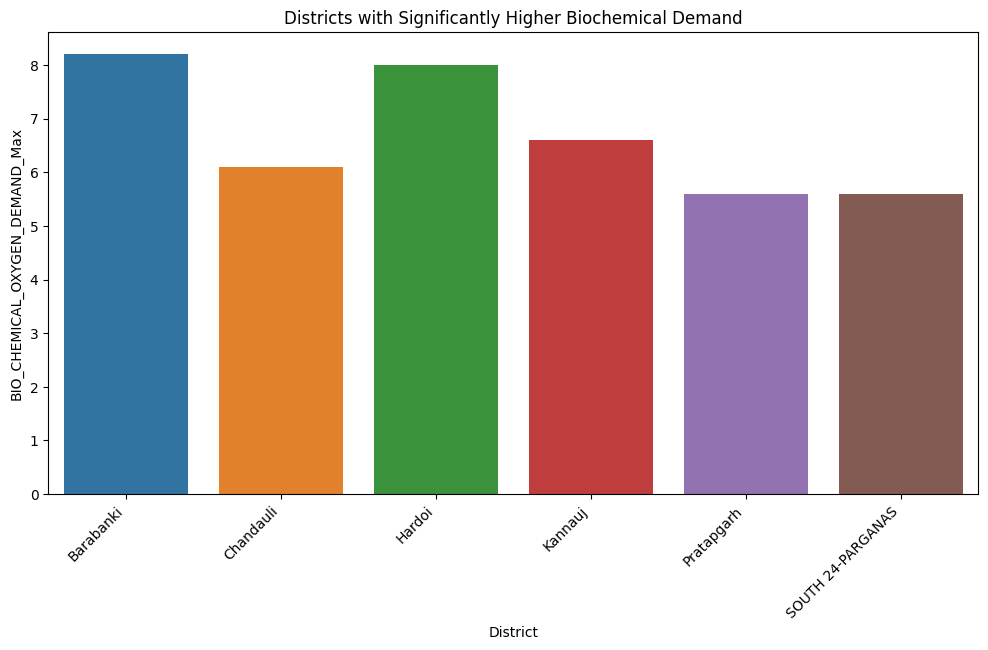

In [76]:
# Visualize districts with significantly higher biochemical demand
significant_districts = df_no_outliers[df_no_outliers['High_Pollution'] & (df_no_outliers['Year'] == 2017)]
plt.figure(figsize=(12, 6))
sns.barplot(x='District', y='BIO_CHEMICAL_OXYGEN_DEMAND_Max', data=significant_districts)
plt.title('Districts with Significantly Higher Biochemical Demand')
plt.xticks(rotation=45, ha='right')
plt.show()


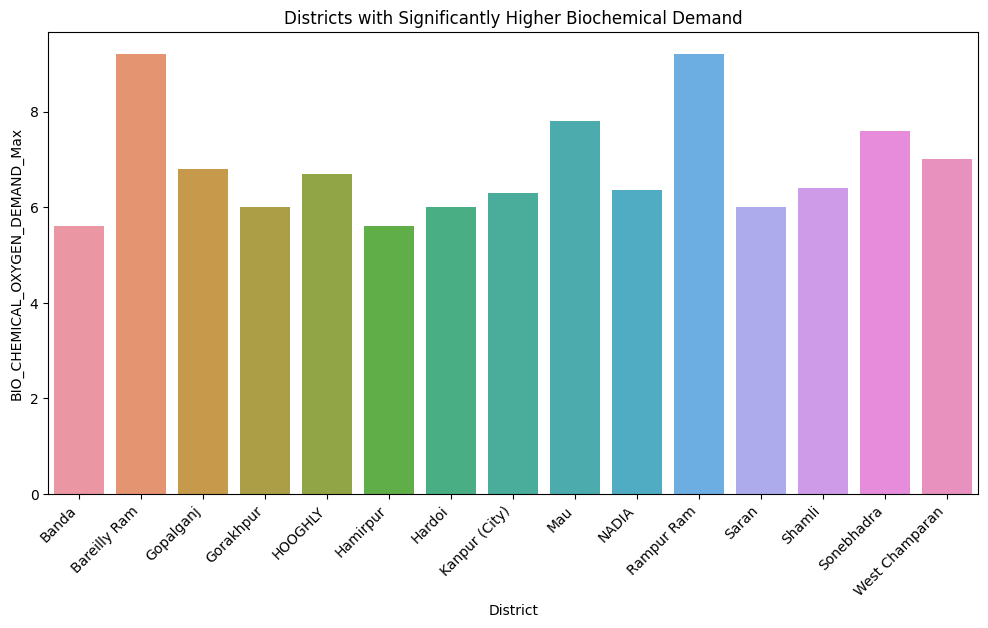

In [77]:
# Visualize districts with significantly higher biochemical demand
significant_districts = df_no_outliers[df_no_outliers['High_Pollution'] & (df_no_outliers['Year'] == 2020)]
plt.figure(figsize=(12, 6))
sns.barplot(x='District', y='BIO_CHEMICAL_OXYGEN_DEMAND_Max', data=significant_districts)
plt.title('Districts with Significantly Higher Biochemical Demand')
plt.xticks(rotation=45, ha='right')
plt.show()


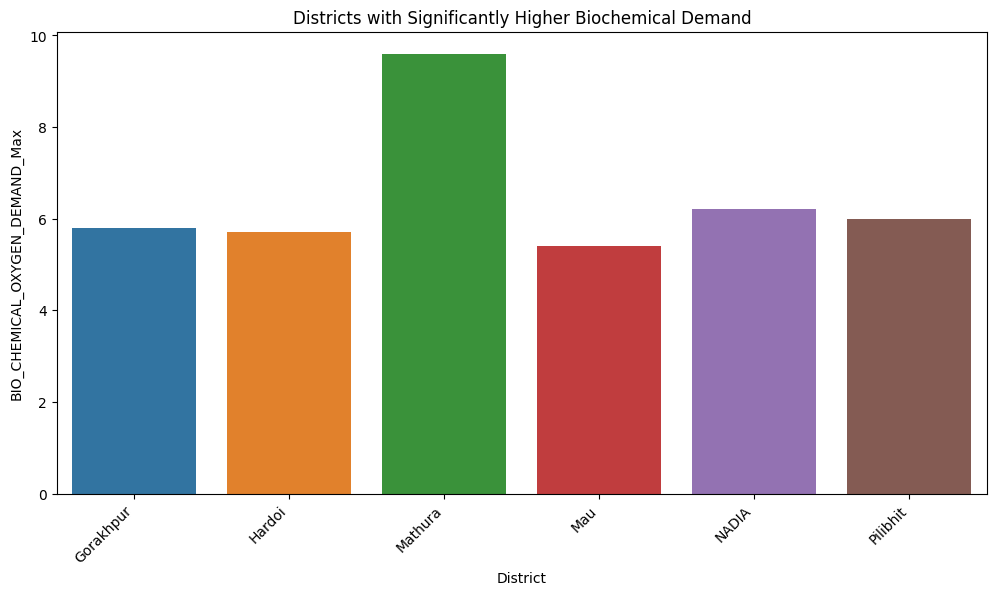

In [78]:
# Visualize districts with significantly higher biochemical demand
significant_districts = df_no_outliers[df_no_outliers['High_Pollution'] & (df_no_outliers['Year'] == 2021)]
plt.figure(figsize=(12, 6))
sns.barplot(x='District', y='BIO_CHEMICAL_OXYGEN_DEMAND_Max', data=significant_districts)
plt.title('Districts with Significantly Higher Biochemical Demand')
plt.xticks(rotation=45, ha='right')
plt.show()


In [80]:
import pandas as pd
import geopandas as gpd

data = cleaned_pollution_nightlight_data.copy()



In [82]:
data.columns

Index(['District', 'matched_district_name', 'NAME_1', 'NAME_2', 'latitude',
       'longitude', 'district_centroid', '1_Closest_Station', '1_Distance',
       '2_Closest_Station', '2_Distance', '3_Closest_Station', '3_Distance',
       '4_Closest_Station', '4_Distance', '5_Closest_Station', '5_Distance',
       'matched_pollution_station', 'STATION CODE',
       'NAME OF MONITORING LOCATION', 'STATE NAME', 'TEMPERATURE_MIN',
       'TEMPERATURE_MAX', 'DISSOLVED_OXYGEN_MIN', 'DISSOLVED_OXYGEN_MAX',
       'pH_Min', 'pH_Max', 'CONDUCTIVITY_Min', 'CONDUCTIVITY_Max',
       'BIOCHEMICAL_OXYGEN_DEMAND_Min', 'BIO_CHEMICAL_OXYGEN_DEMAND_Max',
       'NITRATE_MIN', 'NITRATE_MAX', 'FECAL_COLIFORM_MIN',
       'FECAL_COLIFORM_MAX', 'TOTAL_COLIFORM_MIN', 'TOTAL_COLIFORM_MAX',
       'Year', 'not_drinkable', 'nightlight_district_matched',
       'pc11_district_id', 'pc11_state_id', 'year', 'state_name',
       'district_name', 'viirs_annual_min', 'viirs_annual_max',
       'viirs_annual_mean', 'vi

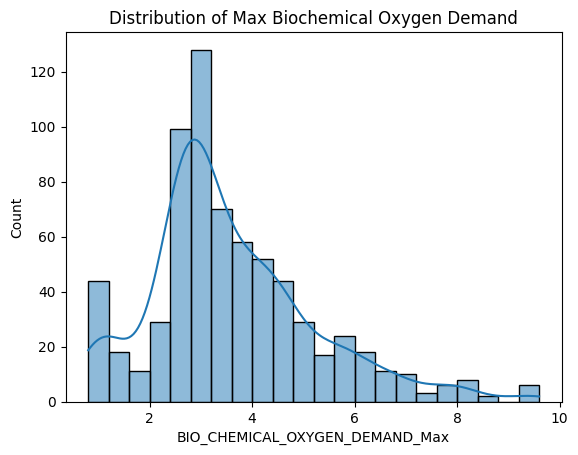

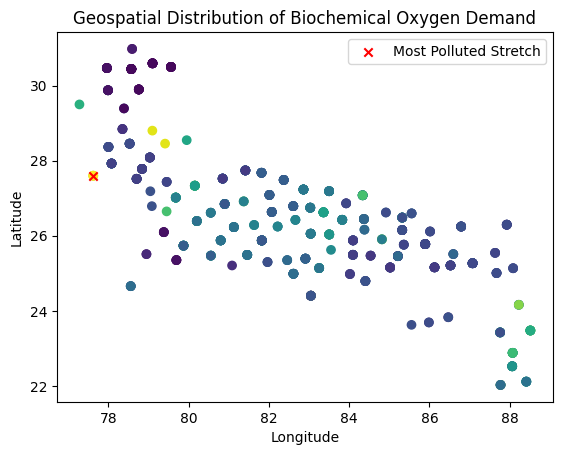

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

df = df_no_outliers.copy()
# Explore data
sns.histplot(df['BIO_CHEMICAL_OXYGEN_DEMAND_Max'], kde=True)
plt.title('Distribution of Max Biochemical Oxygen Demand')
plt.show()

# Identify most polluted stretches
max_polluted_index = df['BIO_CHEMICAL_OXYGEN_DEMAND_Max'].idxmax()
most_polluted_stretch = df.loc[max_polluted_index]

# Geospatial analysis (simplified, you might want to use geopandas for a full analysis)
plt.scatter(df['longitude'], df['latitude'], c=df['BIO_CHEMICAL_OXYGEN_DEMAND_Max'], cmap='viridis')
plt.scatter(most_polluted_stretch['longitude'], most_polluted_stretch['latitude'], color='red', marker='x', label='Most Polluted Stretch')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geospatial Distribution of Biochemical Oxygen Demand')
plt.legend()
plt.show()


       Year district_name  High_Pollution
20   2012.0      hamirpur               2
39   2012.0    pratapgarh               3
99   2013.0    pratapgarh               3
139  2014.0      hamirpur               2
161  2014.0    pratapgarh               3
217  2015.0    pratapgarh               3
266  2016.0    pratapgarh               3
320  2017.0    pratapgarh               3
381  2018.0    pratapgarh               3
425  2019.0      hamirpur               2
448  2019.0    pratapgarh               3
481  2020.0     bhagalpur               2
503  2020.0      hamirpur               2
530  2020.0    pratapgarh               3
570  2021.0      hamirpur               2


KeyError: 'longitude'

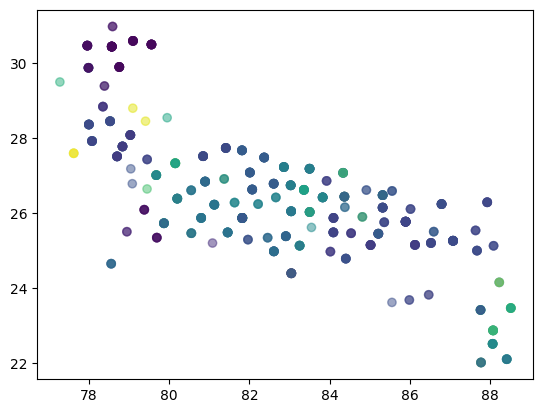

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_no_outliers contains your cleaned data
df = df_no_outliers.copy()

# Set a threshold for high pollution (you may need to adjust this)
threshold = 3

# Create a new binary variable indicating higher pollution
df['High_Pollution'] = df['BIO_CHEMICAL_OXYGEN_DEMAND_Max'] > threshold

# Group data by year and district, and count the number of high pollution stretches
grouped_data = df.groupby(['Year', 'district_name'])['High_Pollution'].sum().reset_index()

# Identify districts with multiple high pollution stretches for each year
multiple_polluted_districts = grouped_data[grouped_data['High_Pollution'] > 1]

# Display the districts
print(multiple_polluted_districts)

# Geospatial analysis (simplified, you might want to use geopandas for a full analysis)
plt.scatter(df['longitude'], df['latitude'], c=df['BIO_CHEMICAL_OXYGEN_DEMAND_Max'], cmap='viridis', alpha=0.5)
plt.scatter(multiple_polluted_districts['longitude'], multiple_polluted_districts['latitude'], color='red', marker='x', label='Multiple Polluted Stretches')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geospatial Distribution of Biochemical Oxygen Demand')
plt.legend()
plt.show()


In [86]:
df.columns

Index(['District', 'matched_district_name', 'NAME_1', 'NAME_2', 'latitude',
       'longitude', 'district_centroid', '1_Closest_Station', '1_Distance',
       '2_Closest_Station', '2_Distance', '3_Closest_Station', '3_Distance',
       '4_Closest_Station', '4_Distance', '5_Closest_Station', '5_Distance',
       'matched_pollution_station', 'STATION CODE',
       'NAME OF MONITORING LOCATION', 'STATE NAME', 'TEMPERATURE_MIN',
       'TEMPERATURE_MAX', 'DISSOLVED_OXYGEN_MIN', 'DISSOLVED_OXYGEN_MAX',
       'pH_Min', 'pH_Max', 'CONDUCTIVITY_Min', 'CONDUCTIVITY_Max',
       'BIOCHEMICAL_OXYGEN_DEMAND_Min', 'BIO_CHEMICAL_OXYGEN_DEMAND_Max',
       'NITRATE_MIN', 'NITRATE_MAX', 'FECAL_COLIFORM_MIN',
       'FECAL_COLIFORM_MAX', 'TOTAL_COLIFORM_MIN', 'TOTAL_COLIFORM_MAX',
       'Year', 'not_drinkable', 'nightlight_district_matched',
       'pc11_district_id', 'pc11_state_id', 'year', 'state_name',
       'district_name', 'viirs_annual_min', 'viirs_annual_max',
       'viirs_annual_mean', 'vi

Build AER Regressions from nightlight pollution_df

In [195]:
import numpy as np
import pandas as pd
#import statsmodels.


data = pd.read_csv("/Users/arjunarora/Desktop/River pollution/Data/Pollution/pollution_nightlight_cleaned_data_r.csv")
data.drop(columns='Unnamed: 0', inplace=True)

In [196]:
data.head()

,District,matched_district_name,NAME_1,NAME_2,latitude,longitude,district_centroid,1_Closest_Station,1_Distance,2_Closest_Station,...,pH_Max_lag_3,CONDUCTIVITY_Max_lag_1,CONDUCTIVITY_Max_lag_2,CONDUCTIVITY_Max_lag_3,TOTAL_COLIFORM_MAX_lag_1,TOTAL_COLIFORM_MAX_lag_2,TOTAL_COLIFORM_MAX_lag_3,not_drinkable_lag_1,not_drinkable_lag_2,not_drinkable_lag_3
0,Agra,Agra,Uttar Pradesh,Agra,27.007505,78.062924,POINT (78.06292448694016 27.00750514448138),1126,19.888379,1125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Agra,Agra,Uttar Pradesh,Agra,27.007505,78.062924,POINT (78.06292448694016 27.00750514448138),1126,19.888379,1125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2,Agra,Agra,Uttar Pradesh,Agra,27.007505,78.062924,POINT (78.06292448694016 27.00750514448138),1126,19.888379,1125,...,NaN,1343.0,NaN,NaN,17000.0,NaN,NaN,1.0,1.0,NaN
3,Agra,Agra,Uttar Pradesh,Agra,27.007505,78.062924,POINT (78.06292448694016 27.00750514448138),1126,19.888379,1125,...,NaN,NaN,1343.0,NaN,2000000.0,17000.0,NaN,1.0,1.0,1.0
4,Agra,Agra,Uttar Pradesh,Agra,27.007505,78.062924,POINT (78.06292448694016 27.00750514448138),1126,19.888379,1125,...,9.2,1980.0,NaN,1343.0,16000000.0,2000000.0,17000.0,1.0,1.0,1.0


In [197]:
data.columns

Index(['District', 'matched_district_name', 'NAME_1', 'NAME_2', 'latitude',
       'longitude', 'district_centroid', '1_Closest_Station', '1_Distance',
       '2_Closest_Station', '2_Distance', '3_Closest_Station', '3_Distance',
       '4_Closest_Station', '4_Distance', '5_Closest_Station', '5_Distance',
       'matched_pollution_station', 'STATION CODE',
       'NAME OF MONITORING LOCATION', 'STATE NAME', 'TEMPERATURE_MIN',
       'TEMPERATURE_MAX', 'DISSOLVED_OXYGEN_MIN', 'DISSOLVED_OXYGEN_MAX',
       'pH_Min', 'pH_Max', 'CONDUCTIVITY_Min', 'CONDUCTIVITY_Max',
       'BIOCHEMICAL_OXYGEN_DEMAND_Min', 'BIO_CHEMICAL_OXYGEN_DEMAND_Max',
       'NITRATE_MIN', 'NITRATE_MAX', 'FECAL_COLIFORM_MIN',
       'FECAL_COLIFORM_MAX', 'TOTAL_COLIFORM_MIN', 'TOTAL_COLIFORM_MAX',
       'Year', 'not_drinkable', 'nightlight_district_matched',
       'pc11_district_id', 'pc11_state_id', 'year', 'state_name',
       'district_name', 'viirs_annual_min', 'viirs_annual_max',
       'viirs_annual_mean', 'vi

In [202]:
import pandas as pd
from linearmodels.panel import PanelOLS

# Assuming your DataFrame is named 'df'
df = data.copy()
# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Variable', 'Lag', 'Coefficients', 'Std_Errors', 'P_Values', 'No_of_Observations', 'F_Statistic', 'T_Statistic'])

# Define variables and lags
dependent_vars = ['BIO_CHEMICAL_OXYGEN_DEMAND_Max', 'TEMPERATURE_MAX']
control_var = 'TEMPERATURE_MAX'  # Use the actual control variable name
lags = ['_lag_1', '_lag_2', '_lag_3']

# Set the index to 'District' and 'Year'
df.set_index(['District', 'Year'], inplace=True)

# Run panel regressions
for dependent_var in dependent_vars:
    for lag in lags:
        var_name = f'{dependent_var}{lag}'
        
        # Filter only relevant columns for the regression
        relevant_columns = [var_name, control_var]  # Add other relevant columns as needed
        data = df[relevant_columns].copy()

        # Drop rows with missing values
        data = data.dropna()

        # Fit the PanelOLS model with EntityEffects and TimeEffects
        model = PanelOLS(data[var_name], data[control_var], entity_effects=True, time_effects=True)
        results = model.fit(cov_type='kernel', kernel='bartlett')  # Adjust cov_type as needed

        # Extract and append key information to results_df
        results_df = results_df.append({
            'Variable': dependent_var,
            'Lag': lag,
            'Coefficients': results.params[control_var],
            'Std_Errors': results.std_errors[control_var],
            'P_Values': results.pvalues[control_var],
            'No_of_Observations': results.nobs,
            'F_Statistic': results.f_statistic.stat,
            'T_Statistic': results.tstats[control_var]
        }, ignore_index=True)

# Reset the index if needed
df.reset_index(inplace=True)

# Print or use the results_df DataFrame as needed
print(results_df)


                         Variable     Lag  Coefficients  Std_Errors  P_Values  \
0  BIO_CHEMICAL_OXYGEN_DEMAND_Max  _lag_1      0.311415    0.257769  0.227459   
1  BIO_CHEMICAL_OXYGEN_DEMAND_Max  _lag_2      0.077935    0.149410  0.602118   
2  BIO_CHEMICAL_OXYGEN_DEMAND_Max  _lag_3     -0.304048    0.154202  0.049078   
3                 TEMPERATURE_MAX  _lag_1     -0.181484    0.054604  0.000942   
4                 TEMPERATURE_MAX  _lag_2     -0.025370    0.035885  0.479854   
5                 TEMPERATURE_MAX  _lag_3     -0.129662    0.071103  0.068716   

  No_of_Observations  F_Statistic  T_Statistic  
0                753     2.758944     1.208116  
1                756     0.124703     0.521621  
2                753     0.785432    -1.971754  
3                727    11.821177    -3.323648  
4                731     0.184238    -0.706975  
5                717     4.262422    -1.823586  


/var/folders/wm/jf5bq5r94mqgp8j4gnpmb7xw0000gn/T/ipykernel_35238/518206225.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/var/folders/wm/jf5bq5r94mqgp8j4gnpmb7xw0000gn/T/ipykernel_35238/518206225.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/var/folders/wm/jf5bq5r94mqgp8j4gnpmb7xw0000gn/T/ipykernel_35238/518206225.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/var/folders/wm/jf5bq5r94mqgp8j4gnpmb7xw0000gn/T/ipykernel_35238/518206225.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


In [203]:
results_df

,Variable,Lag,Coefficients,Std_Errors,P_Values,No_of_Observations,F_Statistic,T_Statistic
0,BIO_CHEMICAL_OXYGEN_DEMAND_Max,_lag_1,0.311415,0.257769,0.227459,753,2.758944,1.208116
1,BIO_CHEMICAL_OXYGEN_DEMAND_Max,_lag_2,0.077935,0.149410,0.602118,756,0.124703,0.521621
2,BIO_CHEMICAL_OXYGEN_DEMAND_Max,_lag_3,-0.304048,0.154202,0.049078,753,0.785432,-1.971754
3,TEMPERATURE_MAX,_lag_1,-0.181484,0.054604,0.000942,727,11.821177,-3.323648
4,TEMPERATURE_MAX,_lag_2,-0.025370,0.035885,0.479854,731,0.184238,-0.706975
5,TEMPERATURE_MAX,_lag_3,-0.129662,0.071103,0.068716,717,4.262422,-1.823586


<H1>Standard error clustering models

In [51]:
import numpy as np
import pandas as pd
#import statsmodels.


data = pd.read_csv("/Users/arjunarora/Desktop/River pollution/Data/Pollution/pollution_nightlight_cleaned_data_r.csv")
data.drop(columns='Unnamed: 0', inplace=True)

In [52]:
data.columns

Index(['District', 'matched_district_name', 'NAME_1', 'NAME_2', 'latitude',
       'longitude', 'district_centroid', '1_Closest_Station', '1_Distance',
       '2_Closest_Station', '2_Distance', '3_Closest_Station', '3_Distance',
       '4_Closest_Station', '4_Distance', '5_Closest_Station', '5_Distance',
       'matched_pollution_station', 'STATION CODE',
       'NAME OF MONITORING LOCATION', 'STATE NAME', 'TEMPERATURE_MIN',
       'TEMPERATURE_MAX', 'DISSOLVED_OXYGEN_MIN', 'DISSOLVED_OXYGEN_MAX',
       'pH_Min', 'pH_Max', 'CONDUCTIVITY_Min', 'CONDUCTIVITY_Max',
       'BIOCHEMICAL_OXYGEN_DEMAND_Min', 'BIO_CHEMICAL_OXYGEN_DEMAND_Max',
       'NITRATE_MIN', 'NITRATE_MAX', 'FECAL_COLIFORM_MIN',
       'FECAL_COLIFORM_MAX', 'TOTAL_COLIFORM_MIN', 'TOTAL_COLIFORM_MAX',
       'Year', 'not_drinkable', 'nightlight_district_matched',
       'pc11_district_id', 'pc11_state_id', 'year', 'state_name',
       'district_name', 'viirs_annual_min', 'viirs_annual_max',
       'viirs_annual_mean', 'vi

In [80]:
#Standard error clustering by district models for biochemical oxygen demand lag_1 and temperature lag 1 as control vs viirs_annual_mean with District and time fixed effects
bod_results_df = pd.DataFrame(columns=['Variable', 'Lag', 'Input_coef','Control_coef','Input_std_error','Input_std_error','Input_p_val','Control_p_val','No_of_Observations', 'F_Statistic', 'R_squared'])

formula = 'np.log(nightlight_per_capita) ~ log(BIO_CHEMICAL_OXYGEN_DEMAND_Max_lag_1) + log(TEMPERATURE_MAX_lag_1) + EntityEffects + TimeEffects'
model = PanelOLS.from_formula(formula, data=data.set_index(['District', 'Year']))
bod_std_error_results_1 = model.fit(cov_type='clustered', cluster_entity=True)


#Same for lag 2 and store results in a dataframe

formula = 'np.log(nightlight_per_capita) ~ log(BIO_CHEMICAL_OXYGEN_DEMAND_Max_lag_2) + log(TEMPERATURE_MAX_lag_2) + EntityEffects + TimeEffects'
model = PanelOLS.from_formula(formula, data=data.set_index(['District', 'Year']))
bod_std_error_results_2 = model.fit(cov_type='clustered', cluster_entity=True)



#Same for lag 3 and store results in a dataframe
formula = 'np.log(nightlight_per_capita)~ log(BIO_CHEMICAL_OXYGEN_DEMAND_Max_lag_3) + log(TEMPERATURE_MAX_lag_3) + EntityEffects + TimeEffects'
model = PanelOLS.from_formula(formula, data=data.set_index(['District', 'Year']))
bod_std_error_results_3 = model.fit(cov_type='clustered', cluster_entity=True)

        
#Now for all lags of biochemical oxygen demand and temperature as control vs viirs_annual_mean with District and time fixed effects
formula = 'np.log(nightlight_per_capita)~ log(BIO_CHEMICAL_OXYGEN_DEMAND_Max_lag_1) + log(BIO_CHEMICAL_OXYGEN_DEMAND_Max_lag_2) + log(BIO_CHEMICAL_OXYGEN_DEMAND_Max_lag_3) + log(TEMPERATURE_MAX_lag_1) + log(TEMPERATURE_MAX_lag_2) + log(TEMPERATURE_MAX_lag_3) + EntityEffects + TimeEffects'
model = PanelOLS.from_formula(formula, data=data.set_index(['District', 'Year']))
bod_std_error_results_4 = model.fit(cov_type='clustered', cluster_entity=True)



/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
/Users/arjunarora/opt/miniconda3/envs/

In [84]:
bod_std_error_results_4

Dep. Variable:,np.log(nightlight_per_capita),R-squared:,0.0461
Estimator:,PanelOLS,R-squared (Between):,-0.3287
No. Observations:,654,R-squared (Within):,-0.0024
Date:,"Fri, Mar 22 2024",R-squared (Overall):,-0.3253
Time:,13:37:45,Log-likelihood,-80.408
Cov. Estimator:,Clustered,,
,,F-statistic:,4.3146
Entities:,103,P-value,0.0003
Avg Obs:,6.3495,Distribution:,"F(6,536)"
Min Obs:,1.0000,,
Max Obs:,27.000,F-statistic (robust):,3.5778


In [54]:
#Same for nitrate and temperature as control vs viirs_annual_mean with District and time fixed effects

formula = 'np.log(nightlight_per_capita) ~ log(NITRATE_MAX_lag_1+1) + log(TEMPERATURE_MAX_lag_1) + EntityEffects + TimeEffects'
model = PanelOLS.from_formula(formula, data=data.set_index(['District', 'Year']))
nitrate_std_error_results_1 = model.fit(cov_type='clustered', cluster_entity=True)


#Same for lag 2 and store results in a dataframe

formula = 'np.log(nightlight_per_capita) ~ log(NITRATE_MAX_lag_2+1) + log(TEMPERATURE_MAX_lag_2) + EntityEffects + TimeEffects'
model = PanelOLS.from_formula(formula, data=data.set_index(['District', 'Year']))
nitrate_std_error_results_2 = model.fit(cov_type='clustered', cluster_entity=True)



#Same for lag 3 and store results in a dataframe
formula = 'np.log(nightlight_per_capita) ~ log(NITRATE_MAX_lag_3+1) + log(TEMPERATURE_MAX_lag_3) + EntityEffects + TimeEffects'
model = PanelOLS.from_formula(formula, data=data.set_index(['District', 'Year']))
nitrate_std_error_results_3 = model.fit(cov_type='clustered', cluster_entity=True)

        
#Now for all lags of biochemical oxygen demand and temperature as control vs viirs_annual_mean with District and time fixed effects
formula = 'np.log(nightlight_per_capita) ~ log(NITRATE_MAX_lag_1+1) + log(NITRATE_MAX_lag_2+1) + log(NITRATE_MAX_lag_3+1) + log(TEMPERATURE_MAX_lag_1) + log(TEMPERATURE_MAX_lag_2) + log(TEMPERATURE_MAX_lag_3) + EntityEffects + TimeEffects'
model = PanelOLS.from_formula(formula, data=data.set_index(['District', 'Year']))
nitrate_error_results_4 = model.fit(cov_type='clustered', cluster_entity=True)



/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
/Users/arjunarora/opt/miniconda3/envs/

In [89]:
nitrate_error_results_4

Dep. Variable:,np.log(nightlight_per_capita),R-squared:,0.1105
Estimator:,PanelOLS,R-squared (Between):,-0.3892
No. Observations:,388,R-squared (Within):,0.0077
Date:,"Sun, Mar 17 2024",R-squared (Overall):,-0.3851
Time:,19:28:10,Log-likelihood,47.229
Cov. Estimator:,Clustered,,
,,F-statistic:,5.9029
Entities:,88,P-value,0.0000
Avg Obs:,4.4091,Distribution:,"F(6,285)"
Min Obs:,1.0000,,
Max Obs:,25.000,F-statistic (robust):,4.1942


In [55]:
#Same for not_drinkable and temperature as control vs viirs_annual_mean with District and time fixed effects

formula = 'np.log(nightlight_per_capita) ~ not_drinkable_lag_1 + TEMPERATURE_MAX_lag_1 + EntityEffects + TimeEffects'
model = PanelOLS.from_formula(formula, data=data.set_index(['District', 'Year']))
not_drinkable_std_error_results_1 = model.fit(cov_type='clustered', cluster_entity=True)


#Same for lag 2 and store results in a dataframe

formula = 'np.log(nightlight_per_capita) ~ not_drinkable_lag_2 + TEMPERATURE_MAX_lag_2 + EntityEffects + TimeEffects'
model = PanelOLS.from_formula(formula, data=data.set_index(['District', 'Year']))
not_drinkable_std_error_results_2 = model.fit(cov_type='clustered', cluster_entity=True)



#Same for lag 3 and store results in a dataframe
formula = 'np.log(nightlight_per_capita) ~ not_drinkable_lag_3 + TEMPERATURE_MAX_lag_3 + EntityEffects + TimeEffects'
model = PanelOLS.from_formula(formula, data=data.set_index(['District', 'Year']))
not_drinkable_std_error_results_3 = model.fit(cov_type='clustered', cluster_entity=True)

        
#Now for all lags of biochemical oxygen demand and temperature as control vs viirs_annual_mean with District and time fixed effects
formula = 'np.log(nightlight_per_capita) ~ not_drinkable_lag_1 + not_drinkable_lag_2 + not_drinkable_lag_3 + TEMPERATURE_MAX_lag_1 + TEMPERATURE_MAX_lag_2 + TEMPERATURE_MAX_lag_3 + EntityEffects + TimeEffects'
model = PanelOLS.from_formula(formula, data=data.set_index(['District', 'Year']))
not_drinkable_std_error_results_4 = model.fit(cov_type='clustered', cluster_entity=True)



/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows

In [93]:
not_drinkable_std_error_results_4

Dep. Variable:,np.log(nightlight_per_capita),R-squared:,0.0513
Estimator:,PanelOLS,R-squared (Between):,-0.1064
No. Observations:,658,R-squared (Within):,-0.0114
Date:,"Sun, Mar 17 2024",R-squared (Overall):,-0.1058
Time:,19:28:57,Log-likelihood,-78.548
Cov. Estimator:,Clustered,,
,,F-statistic:,4.8679
Entities:,103,P-value,0.0001
Avg Obs:,6.3883,Distribution:,"F(6,540)"
Min Obs:,1.0000,,
Max Obs:,27.000,F-statistic (robust):,3.3279


In [94]:
0.0206 < 0.05

True

Nightlight vs vars

In [303]:
#Standard error clustering by district models for biochemical oxygen demand lag_1 and temperature lag 1 as control vs viirs_annual_mean with District and time fixed effects
bod_results_df = pd.DataFrame(columns=['Variable', 'Lag', 'Input_coef','Control_coef','Input_std_error','Input_std_error','Input_p_val','Control_p_val','No_of_Observations', 'F_Statistic', 'R_squared'])

formula = 'log_viirs_annual_mean ~ log(BIO_CHEMICAL_OXYGEN_DEMAND_Max_lag_1) + log(TEMPERATURE_MAX_lag_1) + EntityEffects + TimeEffects'
model = PanelOLS.from_formula(formula, data=data.set_index(['District', 'Year']))
bod_std_error_results_1 = model.fit(cov_type='clustered', cluster_entity=True)


#Same for lag 2 and store results in a dataframe

formula = 'log_viirs_annual_mean ~ log(BIO_CHEMICAL_OXYGEN_DEMAND_Max_lag_2) + log(TEMPERATURE_MAX_lag_2) + EntityEffects + TimeEffects'
model = PanelOLS.from_formula(formula, data=data.set_index(['District', 'Year']))
bod_std_error_results_2 = model.fit(cov_type='clustered', cluster_entity=True)



#Same for lag 3 and store results in a dataframe
formula = 'log_viirs_annual_mean ~ log(BIO_CHEMICAL_OXYGEN_DEMAND_Max_lag_3) + log(TEMPERATURE_MAX_lag_3) + EntityEffects + TimeEffects'
model = PanelOLS.from_formula(formula, data=data.set_index(['District', 'Year']))
bod_std_error_results_3 = model.fit(cov_type='clustered', cluster_entity=True)

        
#Now for all lags of biochemical oxygen demand and temperature as control vs viirs_annual_mean with District and time fixed effects
formula = 'log_viirs_annual_mean ~ log(BIO_CHEMICAL_OXYGEN_DEMAND_Max_lag_1) + log(BIO_CHEMICAL_OXYGEN_DEMAND_Max_lag_2) + log(BIO_CHEMICAL_OXYGEN_DEMAND_Max_lag_3) + log(TEMPERATURE_MAX_lag_1) + log(TEMPERATURE_MAX_lag_2) + log(TEMPERATURE_MAX_lag_3) + EntityEffects + TimeEffects'
model = PanelOLS.from_formula(formula, data=data.set_index(['District', 'Year']))
bod_std_error_results_4 = model.fit(cov_type='clustered', cluster_entity=True)



/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
/Users/arjunarora/opt/miniconda3/envs/

In [304]:
#Same for nitrate and temperature as control vs viirs_annual_mean with District and time fixed effects

formula = 'log_viirs_annual_mean ~ log(NITRATE_MAX_lag_1+1) + log(TEMPERATURE_MAX_lag_1) + EntityEffects + TimeEffects'
model = PanelOLS.from_formula(formula, data=data.set_index(['District', 'Year']))
nitrate_std_error_results_1 = model.fit(cov_type='clustered', cluster_entity=True)


#Same for lag 2 and store results in a dataframe

formula = 'log_viirs_annual_mean ~ log(NITRATE_MAX_lag_2+1) + log(TEMPERATURE_MAX_lag_2) + EntityEffects + TimeEffects'
model = PanelOLS.from_formula(formula, data=data.set_index(['District', 'Year']))
nitrate_std_error_results_2 = model.fit(cov_type='clustered', cluster_entity=True)



#Same for lag 3 and store results in a dataframe
formula = 'log_viirs_annual_mean ~ log(NITRATE_MAX_lag_3+1) + log(TEMPERATURE_MAX_lag_3) + EntityEffects + TimeEffects'
model = PanelOLS.from_formula(formula, data=data.set_index(['District', 'Year']))
nitrate_std_error_results_3 = model.fit(cov_type='clustered', cluster_entity=True)

        
#Now for all lags of biochemical oxygen demand and temperature as control vs viirs_annual_mean with District and time fixed effects
formula = 'log_viirs_annual_mean ~ log(NITRATE_MAX_lag_1+1) + log(NITRATE_MAX_lag_2+1) + log(NITRATE_MAX_lag_3+1) + log(TEMPERATURE_MAX_lag_1) + log(TEMPERATURE_MAX_lag_2) + log(TEMPERATURE_MAX_lag_3) + EntityEffects + TimeEffects'
model = PanelOLS.from_formula(formula, data=data.set_index(['District', 'Year']))
nitrate_error_results_4 = model.fit(cov_type='clustered', cluster_entity=True)



/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
/Users/arjunarora/opt/miniconda3/envs/

In [305]:
#Same for not_drinkable and temperature as control vs viirs_annual_mean with District and time fixed effects

formula = 'viirs_annual_mean ~ not_drinkable_lag_1 + TEMPERATURE_MAX_lag_1 + EntityEffects + TimeEffects'
model = PanelOLS.from_formula(formula, data=data.set_index(['District', 'Year']))
not_drinkable_std_error_results_1 = model.fit(cov_type='clustered', cluster_entity=True)


#Same for lag 2 and store results in a dataframe

formula = 'viirs_annual_mean ~ not_drinkable_lag_2 + TEMPERATURE_MAX_lag_2 + EntityEffects + TimeEffects'
model = PanelOLS.from_formula(formula, data=data.set_index(['District', 'Year']))
not_drinkable_std_error_results_2 = model.fit(cov_type='clustered', cluster_entity=True)



#Same for lag 3 and store results in a dataframe
formula = 'viirs_annual_mean ~ not_drinkable_lag_3 + TEMPERATURE_MAX_lag_3 + EntityEffects + TimeEffects'
model = PanelOLS.from_formula(formula, data=data.set_index(['District', 'Year']))
not_drinkable_std_error_results_3 = model.fit(cov_type='clustered', cluster_entity=True)

        
#Now for all lags of biochemical oxygen demand and temperature as control vs viirs_annual_mean with District and time fixed effects
formula = 'viirs_annual_mean ~ not_drinkable_lag_1 + not_drinkable_lag_2 + not_drinkable_lag_3 + TEMPERATURE_MAX_lag_1 + TEMPERATURE_MAX_lag_2 + TEMPERATURE_MAX_lag_3 + EntityEffects + TimeEffects'
model = PanelOLS.from_formula(formula, data=data.set_index(['District', 'Year']))
not_drinkable_std_error_results_4 = model.fit(cov_type='clustered', cluster_entity=True)



/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows

In [61]:
from pystout import pystout


In [63]:
import statsmodels.api as sm
from stargazer.stargazer import Stargazer

# Assuming `bod_std_error_results_1`, `bod_std_error_results_2`, `bod_std_error_results_3`, `bod_std_error_results_4`
# are your model fit results from statsmodels or similar.
# Make sure these are statsmodels results objects

# Create a Stargazer object with your models
stargazer = Stargazer([bod_std_error_results_1, bod_std_error_results_2, bod_std_error_results_3, bod_std_error_results_4])

# Customizations
stargazer.title('Biological Oxygen Demand results with standard errors clustered at district level')
stargazer.custom_columns(['Model 1', 'Model 2', 'Model 3', 'Model 4'], [1, 1, 1, 1])
stargazer.add_custom_notes(['Robust standard errors are clustered at District level and are in parentheses. Significance levels: * p<0.1, ** p<0.05, ***p<0.01'])

# Render LaTeX code (or save directly to a .tex file)
print(stargazer.render_latex())
# To save to a file, you can do:
with open('bod_std_error_table_per_capita.tex', 'w') as f:
    f.write(stargazer.render_latex())


ValueError: Please use trained OLS models as inputs

In [62]:
pystout(models=[bod_std_error_results_1, bod_std_error_results_2, bod_std_error_results_3, bod_std_error_results_4],
        file='bod_std_error_table_per_capita.tex',
        addnotes=['Robust standard errors are clustered at District level and are in parentheses. Significance levels: * p<0.1, ** p<0.05, ***p<0.01'],
        #exogvars = ['log(BIO_CHEMICAL_OXYGEN_DEMAND_Max_lag_1)', 'log(BIO_CHEMICAL_OXYGEN_DEMAND_Max_lag_2)', 'log(BIO_CHEMICAL_OXYGEN_DEMAND_Max_lag_3)'],
        digits=2,
        title = 'Biological Oxygen Demand results with standard errors clustered at district level',
        #exogvars = 
        endog_names=['(1)', '(2)', '(3)', '(4)'],
        varlabels={'log(BIO_CHEMICAL_OXYGEN_DEMAND_Max_lag_1)':'Log Biological Oxygen Demand t-1','log(BIO_CHEMICAL_OXYGEN_DEMAND_Max_lag_2)':'Log Biological Oxygen Demand t-2','log(BIO_CHEMICAL_OXYGEN_DEMAND_Max_lag_3)':'Log Biological Oxygen Demand t-3', 'log(TEMPERATURE_MAX_lag_1)':'Log Temperature t-1', 'log(TEMPERATURE_MAX_lag_2)':'Log Temperature t-2', 'log(TEMPERATURE_MAX_lag_3)':'Log Temperature t-3'},
        #addrows={'':['0','1', '2', '3']},
        #mgroups={'Statsmodels':[1,3],'L OLS':4,'L TSLS':5},
        modstat={'nobs':'Obs','rsquared':'R-squared','fvalue':'F-stat'},
        stars = {0.01:'***', 0.05:'**', 0.1:'*'}
        )

AttributeError: 'DataFrame' object has no attribute 'append'

In [60]:
#Same for nitrate
pystout(models=[nitrate_std_error_results_1, nitrate_std_error_results_2, nitrate_std_error_results_3, nitrate_error_results_4],
        file='nitrate_std_error_table_per_capita.tex',
        addnotes=['Robust standard errors are clustered at District level and are in parentheses. Significance levels: * p<0.1, ** p<0.05, ***p<0.01'],
        digits=2,
        title = 'Nitrate results with standard errors clustered at district level',
        endog_names=['(1)', '(2)', '(3)', '(4)'],
        varlabels={'log(NITRATE_MAX_lag_1+1)':'Log Nitrate t-1','log(NITRATE_MAX_lag_2+1)':'Log Nitrate t-2','log(NITRATE_MAX_lag_3+1)':'Log Nitrate t-3', 'log(TEMPERATURE_MAX_lag_1)':'Log Temperature t-1', 'log(TEMPERATURE_MAX_lag_2)':'Log Temperature t-2', 'log(TEMPERATURE_MAX_lag_3)':'Log Temperature t-3'},
        modstat={'nobs':'Obs','rsquared':'R-squared','fvalue':'F-stat'},
        stars = {0.01:'***', 0.05:'**', 0.1:'*'}
        )

AttributeError: 'DataFrame' object has no attribute 'append'

In [309]:
#Same for not_drinkable
pystout(models=[not_drinkable_std_error_results_1, not_drinkable_std_error_results_2, not_drinkable_std_error_results_3, not_drinkable_std_error_results_4],
        file='not_drinkable_std_error_table.tex',
        addnotes=['Robust standard errors are clustered at District level and are in parentheses. Significance levels: * p<0.1, ** p<0.05, ***p<0.01'],
        digits=2,
        title = 'Not drinkable results with standard errors clustered at district level',
        endog_names=['(1)', '(2)', '(3)', '(4)'],
        varlabels={'not_drinkable_lag_1':'Not drinkable t-1','not_drinkable_lag_2':'Not drinkable t-2','not_drinkable_lag_3':'Not drinkable t-3', 'TEMPERATURE_MAX_lag_1':'Temperature t-1', 'TEMPERATURE_MAX_lag_2':'Temperature t-2', 'TEMPERATURE_MAX_lag_3':'Temperature t-3'},
        modstat={'nobs':'Obs','rsquared':'R-squared','fvalue':'F-stat'},
        stars = {0.01:'***', 0.05:'**', 0.1:'*'}
        )

/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/pystout/pystout.py:377: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options = options.append(pd.DataFrame([r],index=[value]))
/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/pystout/pystout.py:377: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options = options.append(pd.DataFrame([r],index=[value]))
/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/pystout/pystout.py:377: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  options = options.append(pd.DataFrame([r],index=[value]))


In [208]:
# Define the fixed effects model
formula = 'log_viirs_annual_mean ~ log(BIO_CHEMICAL_OXYGEN_DEMAND_Max_lag_1) + log(TEMPERATURE_MAX_lag_1) + EntityEffects + TimeEffects'
model = PanelOLS.from_formula(formula, data=data.set_index(['District', 'Year']))
results_clustered = model.fit(cov_type='clustered', cluster_entity=True)
# Fit the model
results_1 = model.fit()
print(results_1)


                            PanelOLS Estimation Summary                            
Dep. Variable:     log_viirs_annual_mean   R-squared:                        0.0072
Estimator:                      PanelOLS   R-squared (Between):             -0.9392
No. Observations:                    705   R-squared (Within):               0.0055
Date:                   Thu, Dec 07 2023   R-squared (Overall):             -0.8998
Time:                           19:10:49   Log-likelihood                   -156.71
Cov. Estimator:               Unadjusted                                           
                                           F-statistic:                      2.1251
Entities:                            107   P-value                           0.1203
Avg Obs:                          6.5888   Distribution:                   F(2,587)
Min Obs:                          1.0000                                           
Max Obs:                          27.000   F-statistic (robust):            

/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [209]:
#Perform standard error clustering
results_clustered = model.fit(cov_type='clustered', cluster_entity=True)

In [211]:
print(results_clustered)

                            PanelOLS Estimation Summary                            
Dep. Variable:     log_viirs_annual_mean   R-squared:                        0.0072
Estimator:                      PanelOLS   R-squared (Between):             -0.9392
No. Observations:                    705   R-squared (Within):               0.0055
Date:                   Thu, Dec 07 2023   R-squared (Overall):             -0.8998
Time:                           19:11:39   Log-likelihood                   -156.71
Cov. Estimator:                Clustered                                           
                                           F-statistic:                      2.1251
Entities:                            107   P-value                           0.1203
Avg Obs:                          6.5888   Distribution:                   F(2,587)
Min Obs:                          1.0000                                           
Max Obs:                          27.000   F-statistic (robust):            

Data Science

In [212]:
import numpy as np
import pandas as pd
#import statsmodels.


data = pd.read_csv("/Users/arjunarora/Desktop/River pollution/Data/Pollution/pollution_nightlight_cleaned_data_r.csv")
data.drop(columns='Unnamed: 0', inplace=True)

In [214]:
data.columns

Index(['District', 'matched_district_name', 'NAME_1', 'NAME_2', 'latitude',
       'longitude', 'district_centroid', '1_Closest_Station', '1_Distance',
       '2_Closest_Station', '2_Distance', '3_Closest_Station', '3_Distance',
       '4_Closest_Station', '4_Distance', '5_Closest_Station', '5_Distance',
       'matched_pollution_station', 'STATION CODE',
       'NAME OF MONITORING LOCATION', 'STATE NAME', 'TEMPERATURE_MIN',
       'TEMPERATURE_MAX', 'DISSOLVED_OXYGEN_MIN', 'DISSOLVED_OXYGEN_MAX',
       'pH_Min', 'pH_Max', 'CONDUCTIVITY_Min', 'CONDUCTIVITY_Max',
       'BIOCHEMICAL_OXYGEN_DEMAND_Min', 'BIO_CHEMICAL_OXYGEN_DEMAND_Max',
       'NITRATE_MIN', 'NITRATE_MAX', 'FECAL_COLIFORM_MIN',
       'FECAL_COLIFORM_MAX', 'TOTAL_COLIFORM_MIN', 'TOTAL_COLIFORM_MAX',
       'Year', 'not_drinkable', 'nightlight_district_matched',
       'pc11_district_id', 'pc11_state_id', 'year', 'state_name',
       'district_name', 'viirs_annual_min', 'viirs_annual_max',
       'viirs_annual_mean', 'vi

In [219]:
#Only pick pollution measures and nightlight measures
data_crop = data[['log_BIO_CHEMICAL_OXYGEN_DEMAND_Max', 'log_TEMPERATURE_MAX','log_CONDUCTIVITY_Max','log_FECAL_COLIFORM_MAX','log_pH_Max','log_NITRATE_MAX', 'log_viirs_annual_mean']]

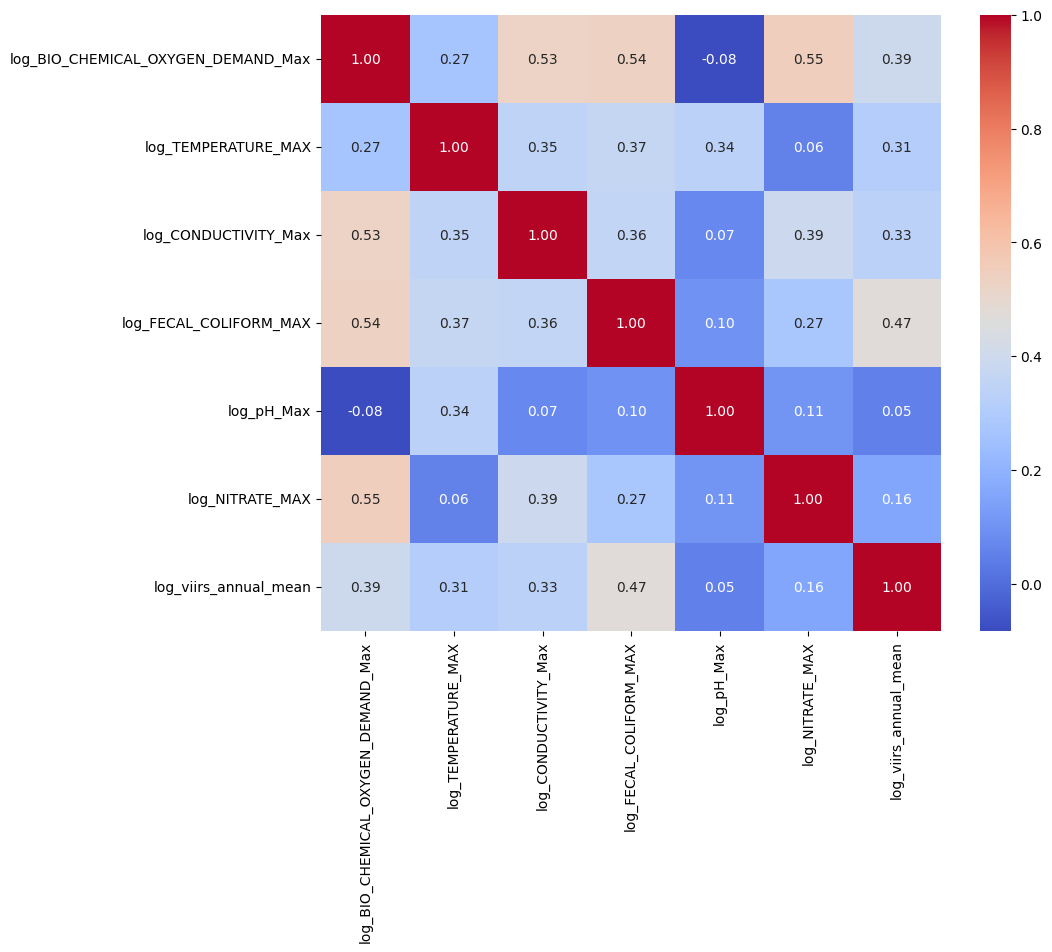

In [220]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
correlation_matrix = data_crop.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


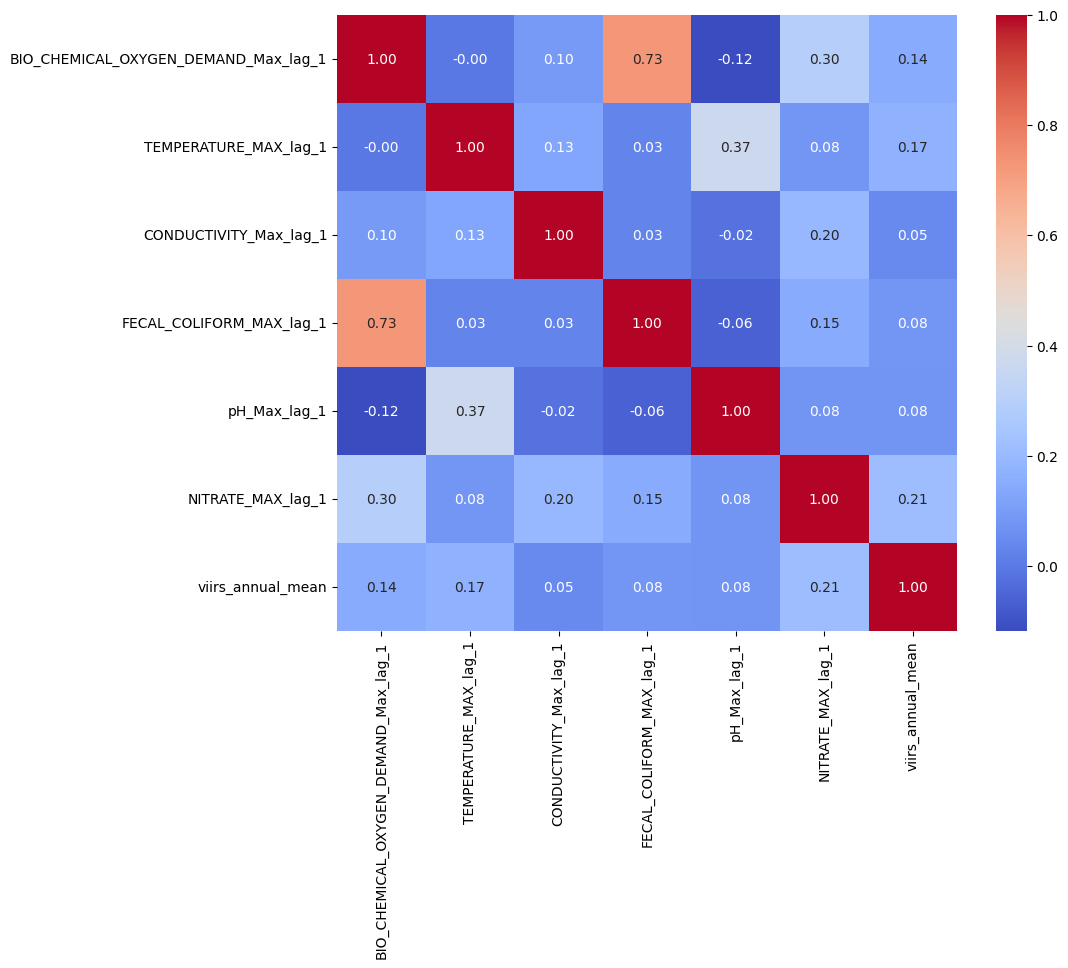

In [224]:
#Do the same thing for lagged variables
data_crop = data[['BIO_CHEMICAL_OXYGEN_DEMAND_Max_lag_1', 'TEMPERATURE_MAX_lag_1','CONDUCTIVITY_Max_lag_1','FECAL_COLIFORM_MAX_lag_1','pH_Max_lag_1','NITRATE_MAX_lag_1', 'viirs_annual_mean']]
correlation_matrix = data_crop.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


In [227]:
from scipy.stats import pearsonr
"""
3. Statistical Testing:
3.1 Hypothesis Testing:

Perform hypothesis tests to determine whether the observed correlations are statistically 
"""
# Example: Correlation between 'log_BIO_CHEMICAL_OXYGEN_DEMAND_Max' and 'log_viirs_annual_mean'

# Define the variables
x = data['log_BIO_CHEMICAL_OXYGEN_DEMAND_Max']
y = data['log_viirs_annual_mean']

#Check for infs or Nan values
inf_mask = np.isfinite(x) & np.isfinite(y)
x = x[inf_mask]
y = y[inf_mask]


corr_coeff, p_value = pearsonr(x, y)
print(f"Correlation coefficient: {corr_coeff}")
print(f"P-value: {p_value}")

Correlation coefficient: 0.3913606141286072
P-value: 1.0274937474423947e-28


In [237]:
# Example: Correlation between 'log_nitrate_max' and 'log_viirs_annual_mean'

# Define the variables
x = data['log_NITRATE_MAX']
y = data['log_viirs_annual_mean']

#Check for infs or Nan values
inf_mask = np.isfinite(x) & np.isfinite(y)
x = x[inf_mask]
y = y[inf_mask]


corr_coeff, p_value = pearsonr(x, y)
print(f"Correlation coefficient: {corr_coeff}")
print(f"P-value: {p_value}")

Correlation coefficient: 0.1575286906706379
P-value: 0.0007361221559155307


In [238]:
# Example: Correlation between 'log_nitrate_max' and 'log_viirs_annual_mean'

# Define the variables
x = data['not_drinkable']
y = data['viirs_annual_mean']

#Check for infs or Nan values
inf_mask = np.isfinite(x) & np.isfinite(y)
x = x[inf_mask]
y = y[inf_mask]


corr_coeff, p_value = pearsonr(x, y)
print(f"Correlation coefficient: {corr_coeff}")
print(f"P-value: {p_value}")

Correlation coefficient: 0.10774807327364272
P-value: 0.0028818585043432414


In [239]:
# Example: Correlation between 'log_nitrate_max' and 'log_viirs_annual_mean'

# Define the variables
x = data['log_TEMPERATURE_MAX']
y = data['log_viirs_annual_mean']

#Check for infs or Nan values
inf_mask = np.isfinite(x) & np.isfinite(y)
x = x[inf_mask]
y = y[inf_mask]


corr_coeff, p_value = pearsonr(x, y)
print(f"Correlation coefficient: {corr_coeff}")
print(f"P-value: {p_value}")

Correlation coefficient: 0.31272682615967573
P-value: 1.1563181595583881e-17


In [240]:
# Example: Correlation between 'log_nitrate_max' and 'log_viirs_annual_mean'

# Define the variables
x = data['log_pH_Max']
y = data['log_viirs_annual_mean']

#Check for infs or Nan values
inf_mask = np.isfinite(x) & np.isfinite(y)
x = x[inf_mask]
y = y[inf_mask]


corr_coeff, p_value = pearsonr(x, y)
print(f"Correlation coefficient: {corr_coeff}")
print(f"P-value: {p_value}")

Correlation coefficient: 0.0521358106119999
P-value: 0.15486226475156248


In [241]:
# Example: Correlation between 'log_nitrate_max' and 'log_viirs_annual_mean'

# Define the variables
x = data['log_FECAL_COLIFORM_MAX']
y = data['log_viirs_annual_mean']

#Check for infs or Nan values
inf_mask = np.isfinite(x) & np.isfinite(y)
x = x[inf_mask]
y = y[inf_mask]


corr_coeff, p_value = pearsonr(x, y)
print(f"Correlation coefficient: {corr_coeff}")
print(f"P-value: {p_value}")

Correlation coefficient: 0.47161098417676556
P-value: 4.6095237733679086e-39


In [254]:
# Example: Correlation between 'log_CONDUCTIVITY_Max' and 'log_viirs_annual_mean'

# Define the variables
x = data['log_CONDUCTIVITY_Max']
y = data['log_viirs_annual_mean']

#Check for infs or Nan values
inf_mask = np.isfinite(x) & np.isfinite(y)
x = x[inf_mask]
y = y[inf_mask]


corr_coeff, p_value = pearsonr(x, y)
print(f"Correlation coefficient: {corr_coeff}")
print(f"P-value: {p_value}")

Correlation coefficient: 0.3344559606698382
P-value: 6.519793883745812e-20


In [255]:
# Run a multi-variate analysis to determine the most important variables
# Define the variables
x = data[['log_NITRATE_MAX', 'log_TEMPERATURE_MAX', 'log_pH_Max', 'log_FECAL_COLIFORM_MAX', 'log_BIO_CHEMICAL_OXYGEN_DEMAND_Max', 'log_CONDUCTIVITY_Max']]
y = data['log_viirs_annual_mean']

#Check for infs or Nan values
inf_mask = np.isfinite(x).all(axis=1) & np.isfinite(y)
x = x[inf_mask]
y = y[inf_mask]

# Fit the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

# Print the coefficients
print(model.coef_)
print(model.intercept_)
print(model.score(x, y))



[-0.08088996  0.58947902 -0.10812845  0.07162802  0.16847013  0.15823421]
-3.710177119596214
0.19576604400061293


In [257]:
# Run a polynomial regression to determine the most important variables
# Define the variables
x = data[['log_NITRATE_MAX', 'log_TEMPERATURE_MAX', 'log_pH_Max', 'log_FECAL_COLIFORM_MAX', 'log_BIO_CHEMICAL_OXYGEN_DEMAND_Max', 'log_CONDUCTIVITY_Max']]
y = data['log_viirs_annual_mean']

#Check for infs or Nan values
inf_mask = np.isfinite(x).all(axis=1) & np.isfinite(y)
x = x[inf_mask]
y = y[inf_mask]

# Fit the model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
model = LinearRegression()
model.fit(x_poly, y)

# Print the coefficients
print(model.coef_)
print(model.intercept_)
print(model.score(x_poly, y))



[ 2.01475278e+11 -1.84074510e-01  9.43369021e+00 -1.26524892e+02
 -2.78496293e+00  5.58432711e+00  1.43451423e+00  4.90933953e-02
 -1.70860191e-01  2.05348569e-01  2.06502450e-02 -1.73183377e-01
  5.16369677e-02 -7.96377987e-01  1.41079798e+00  3.50048483e-01
  8.39096707e-02 -1.56611254e+00  2.50840801e+01  7.27853405e-01
 -2.95502902e+00  2.22433660e+00 -5.30510795e-03  1.52810282e-02
  3.86198734e-02  9.44822962e-02 -1.84463665e-02 -6.83816927e-02]
-201475277912.4518
0.26188696559427627


In [258]:
#Run another linear regression with the most important variables but also keeping fixed effects in mind like District and Year
# Define the variables
x = data[['log_NITRATE_MAX', 'log_TEMPERATURE_MAX', 'log_pH_Max', 'log_FECAL_COLIFORM_MAX', 'log_BIO_CHEMICAL_OXYGEN_DEMAND_Max', 'log_CONDUCTIVITY_Max']]
y = data['log_viirs_annual_mean']

#Check for infs or Nan values
inf_mask = np.isfinite(x).all(axis=1) & np.isfinite(y)
x = x[inf_mask]
y = y[inf_mask]

# Fit the model and add fixed effects
import statsmodels.api as sm
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     log_viirs_annual_mean   R-squared:                       0.196
Model:                               OLS   Adj. R-squared:                  0.184
Method:                    Least Squares   F-statistic:                     17.20
Date:                   Sun, 10 Dec 2023   Prob (F-statistic):           7.93e-18
Time:                           22:58:48   Log-Likelihood:                -453.52
No. Observations:                    431   AIC:                             921.0
Df Residuals:                        424   BIC:                             949.5
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [259]:
# Define the variables
x = data[['log_NITRATE_MAX', 'log_TEMPERATURE_MAX', 'log_pH_Max', 'log_FECAL_COLIFORM_MAX', 'log_BIO_CHEMICAL_OXYGEN_DEMAND_Max', 'log_CONDUCTIVITY_Max']]
y = data['log_viirs_annual_mean']


# Add constant term and fit the model with fixed effects
x = sm.add_constant(x)

# Add fixed effects (replace 'district' and 'year' with your actual column names)
district_fixed_effects = pd.get_dummies(data['District'], drop_first=True)
year_fixed_effects = pd.get_dummies(data['Year'], drop_first=True)
x = pd.concat([x, district_fixed_effects, year_fixed_effects], axis=1)

#Check for infs or Nan values
inf_mask = np.isfinite(x).all(axis=1) & np.isfinite(y)
x = x[inf_mask]
y = y[inf_mask]

# Fit the model
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())


                              OLS Regression Results                             
Dep. Variable:     log_viirs_annual_mean   R-squared:                       0.934
Model:                               OLS   Adj. R-squared:                  0.912
Method:                    Least Squares   F-statistic:                     42.55
Date:                   Sun, 10 Dec 2023   Prob (F-statistic):          4.46e-142
Time:                           22:59:11   Log-Likelihood:                 84.467
No. Observations:                    431   AIC:                             47.07
Df Residuals:                        323   BIC:                             486.2
Df Model:                            107                                         
Covariance Type:               nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [250]:
import pandas as pd
import statsmodels.api as sm

# Define the variables
x = data[['log_NITRATE_MAX', 'log_TEMPERATURE_MAX', 'log_pH_Max', 'log_FECAL_COLIFORM_MAX', 'log_BIO_CHEMICAL_OXYGEN_DEMAND_Max']]
y = data['log_viirs_annual_mean']

# Check for NaN or inf values in the original data
original_data_mask = np.isfinite(x).all(axis=1) & np.isfinite(y)
x = x[original_data_mask]
y = y[original_data_mask]

# Add constant term
x = sm.add_constant(x)

# Add fixed effects using dummy variables
district_fixed_effects = pd.get_dummies(data['District'], drop_first=True, prefix='District')
year_fixed_effects = pd.get_dummies(data['Year'], drop_first=True, prefix='Year')
x = pd.concat([x, district_fixed_effects, year_fixed_effects], axis=1)

# Check for NaN or inf values after creating dummy variables
dummy_data_mask = np.isfinite(x).all(axis=1) & np.isfinite(y)
x = x[dummy_data_mask]
y = y[dummy_data_mask]

# Fit the model
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())


                              OLS Regression Results                             
Dep. Variable:     log_viirs_annual_mean   R-squared:                       0.934
Model:                               OLS   Adj. R-squared:                  0.912
Method:                    Least Squares   F-statistic:                     43.08
Date:                   Sun, 10 Dec 2023   Prob (F-statistic):          6.90e-143
Time:                           22:50:15   Log-Likelihood:                 84.442
No. Observations:                    431   AIC:                             45.12
Df Residuals:                        324   BIC:                             480.2
Df Model:                            106                                         
Covariance Type:               nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

/var/folders/wm/jf5bq5r94mqgp8j4gnpmb7xw0000gn/T/ipykernel_35238/496693014.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x = x[dummy_data_mask]


In [230]:
from statsmodels.tsa.stattools import grangercausalitytests

# Assuming df is your DataFrame
max_lag = 3  # Choose an appropriate lag value
#Check for infs or Nan values
inf_mask = np.isfinite(data['log_viirs_annual_mean']) & np.isfinite(data['log_BIO_CHEMICAL_OXYGEN_DEMAND_Max'])
df = data[inf_mask]

test_result = grangercausalitytests(df[['log_viirs_annual_mean', 'log_BIO_CHEMICAL_OXYGEN_DEMAND_Max']], max_lag, verbose=True)

#test_result = grangercausalitytests(df[['nightlight_intensity', 'pollution_measure']], max_lag, verbose=True)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.0681  , p=0.0046  , df_denom=742, df_num=1
ssr based chi2 test:   chi2=8.1008  , p=0.0044  , df=1
likelihood ratio test: chi2=8.0570  , p=0.0045  , df=1
parameter F test:         F=8.0681  , p=0.0046  , df_denom=742, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.3319  , p=0.0007  , df_denom=739, df_num=2
ssr based chi2 test:   chi2=14.7630 , p=0.0006  , df=2
likelihood ratio test: chi2=14.6184 , p=0.0007  , df=2
parameter F test:         F=7.3319  , p=0.0007  , df_denom=739, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.2763  , p=0.0013  , df_denom=736, df_num=3
ssr based chi2 test:   chi2=15.9795 , p=0.0011  , df=3
likelihood ratio test: chi2=15.8101 , p=0.0012  , df=3
parameter F test:         F=5.2763  , p=0.0013  , df_denom=736, df_num=3


/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [231]:
#Same for nitrate
inf_mask = np.isfinite(data['log_viirs_annual_mean']) & np.isfinite(data['log_NITRATE_MAX'])
df = data[inf_mask]
test_result = grangercausalitytests(df[['log_viirs_annual_mean', 'log_NITRATE_MAX']], max_lag, verbose=True)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1566  , p=0.2827  , df_denom=452, df_num=1
ssr based chi2 test:   chi2=1.1643  , p=0.2806  , df=1
likelihood ratio test: chi2=1.1628  , p=0.2809  , df=1
parameter F test:         F=1.1566  , p=0.2827  , df_denom=452, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.9824  , p=0.3752  , df_denom=449, df_num=2
ssr based chi2 test:   chi2=1.9867  , p=0.3703  , df=2
likelihood ratio test: chi2=1.9823  , p=0.3711  , df=2
parameter F test:         F=0.9824  , p=0.3752  , df_denom=449, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1908  , p=0.3128  , df_denom=446, df_num=3
ssr based chi2 test:   chi2=3.6285  , p=0.3045  , df=3
likelihood ratio test: chi2=3.6140  , p=0.3063  , df=3
parameter F test:         F=1.1908  , p=0.3128  , df_denom=446, df_num=3


/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [232]:
# Same for not drinkable
inf_mask = np.isfinite(data['viirs_annual_mean']) & np.isfinite(data['not_drinkable'])
df = data[inf_mask]
test_result = grangercausalitytests(df[['viirs_annual_mean', 'not_drinkable']], max_lag, verbose=True)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2242  , p=0.6360  , df_denom=759, df_num=1
ssr based chi2 test:   chi2=0.2251  , p=0.6352  , df=1
likelihood ratio test: chi2=0.2251  , p=0.6352  , df=1
parameter F test:         F=0.2242  , p=0.6360  , df_denom=759, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6341  , p=0.5307  , df_denom=756, df_num=2
ssr based chi2 test:   chi2=1.2767  , p=0.5282  , df=2
likelihood ratio test: chi2=1.2756  , p=0.5285  , df=2
parameter F test:         F=0.6341  , p=0.5307  , df_denom=756, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4105  , p=0.7455  , df_denom=753, df_num=3
ssr based chi2 test:   chi2=1.2430  , p=0.7427  , df=3
likelihood ratio test: chi2=1.2420  , p=0.7430  , df=3
parameter F test:         F=0.4105  , p=0.7455  , df_denom=753, df_num=3


/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [261]:
#Same for nitrate
inf_mask = np.isfinite(data['log_viirs_annual_mean']) & np.isfinite(data['log_FECAL_COLIFORM_MAX'])
df = data[inf_mask]
test_result = grangercausalitytests(df[['log_viirs_annual_mean', 'log_FECAL_COLIFORM_MAX']], max_lag, verbose=True)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0000  , p=0.9948  , df_denom=678, df_num=1
ssr based chi2 test:   chi2=0.0000  , p=0.9947  , df=1
likelihood ratio test: chi2=0.0000  , p=0.9947  , df=1
parameter F test:         F=0.0000  , p=0.9948  , df_denom=678, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=10.2426 , p=0.0000  , df_denom=675, df_num=2
ssr based chi2 test:   chi2=20.6370 , p=0.0000  , df=2
likelihood ratio test: chi2=20.3301 , p=0.0000  , df=2
parameter F test:         F=10.2426 , p=0.0000  , df_denom=675, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.2362  , p=0.0004  , df_denom=672, df_num=3
ssr based chi2 test:   chi2=18.9035 , p=0.0003  , df=3
likelihood ratio test: chi2=18.6451 , p=0.0003  , df=3
parameter F test:         F=6.2362  , p=0.0004  , df_denom=672, df_num=3


/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [262]:
#Same for nitrate
inf_mask = np.isfinite(data['log_viirs_annual_mean']) & np.isfinite(data['log_CONDUCTIVITY_Max'])
df = data[inf_mask]
test_result = grangercausalitytests(df[['log_viirs_annual_mean', 'log_CONDUCTIVITY_Max']], max_lag, verbose=True)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.1928  , p=0.0230  , df_denom=702, df_num=1
ssr based chi2 test:   chi2=5.2150  , p=0.0224  , df=1
likelihood ratio test: chi2=5.1958  , p=0.0226  , df=1
parameter F test:         F=5.1928  , p=0.0230  , df_denom=702, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.8055  , p=0.0612  , df_denom=699, df_num=2
ssr based chi2 test:   chi2=5.6512  , p=0.0593  , df=2
likelihood ratio test: chi2=5.6286  , p=0.0599  , df=2
parameter F test:         F=2.8055  , p=0.0612  , df_denom=699, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.8057  , p=0.1448  , df_denom=696, df_num=3
ssr based chi2 test:   chi2=5.4714  , p=0.1404  , df=3
likelihood ratio test: chi2=5.4503  , p=0.1416  , df=3
parameter F test:         F=1.8057  , p=0.1448  , df_denom=696, df_num=3


/Users/arjunarora/opt/miniconda3/envs/fdps/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


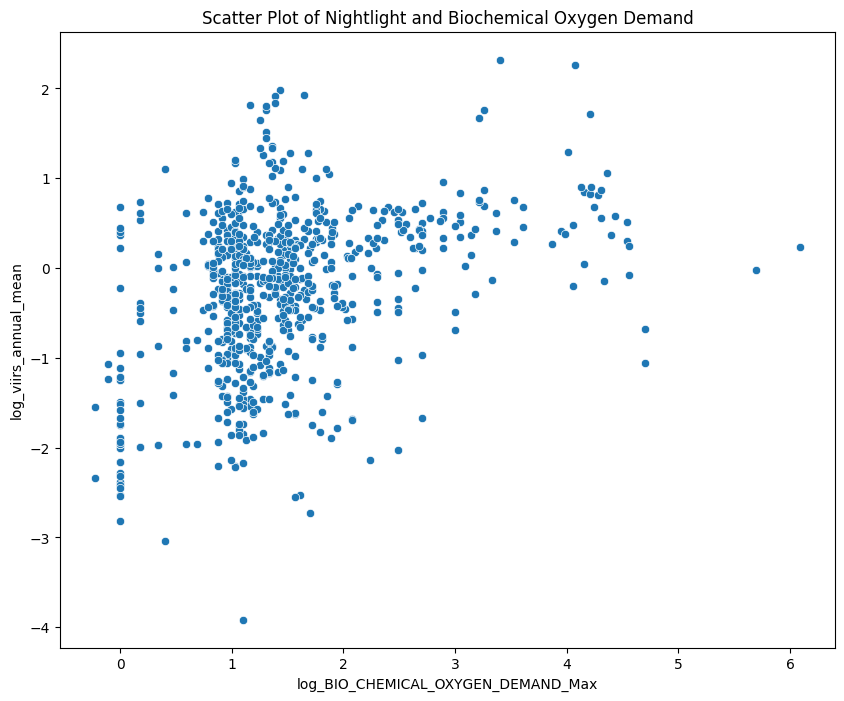

In [233]:
#Plot a scatter plot of the two variables: log BOD and log nightlight
# Assuming df is your DataFrame
df = data.copy()
#Check for infs or Nan values
inf_mask = np.isfinite(df['log_BIO_CHEMICAL_OXYGEN_DEMAND_Max']) & np.isfinite(df['log_viirs_annual_mean']) 
df = df[inf_mask]

# Plot the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='log_BIO_CHEMICAL_OXYGEN_DEMAND_Max', y='log_viirs_annual_mean', data=df)
plt.title('Scatter Plot of Nightlight and Biochemical Oxygen Demand')
plt.show()


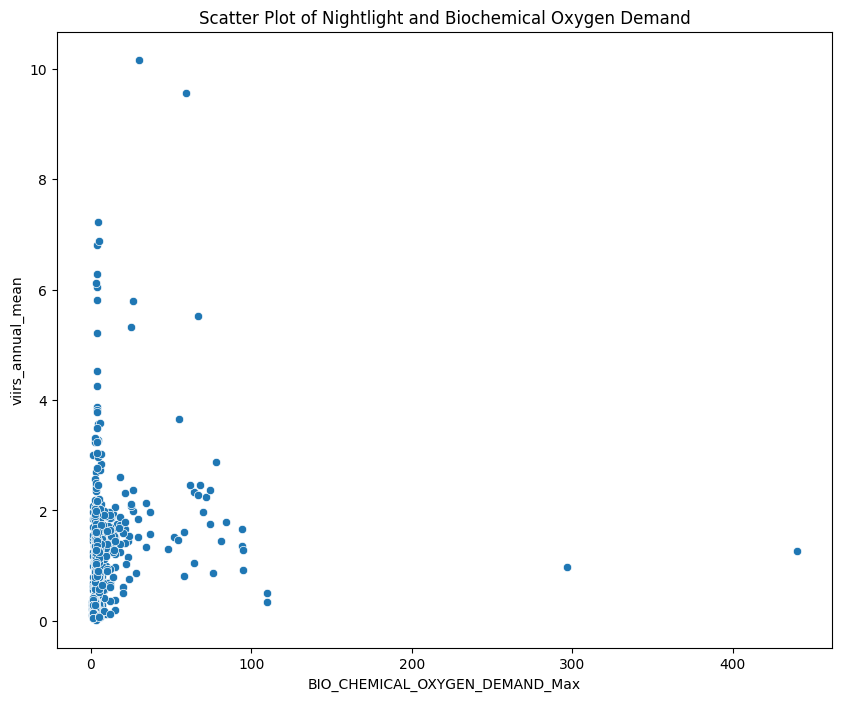

In [234]:
#Plot a scatter plot of the two variables: BOD and nightlight
df = data.copy()
#Check for infs or Nan values
inf_mask = np.isfinite(df['BIO_CHEMICAL_OXYGEN_DEMAND_Max']) & np.isfinite(df['viirs_annual_mean']) 
df = df[inf_mask]

# Plot the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='BIO_CHEMICAL_OXYGEN_DEMAND_Max', y='viirs_annual_mean', data=df)
plt.title('Scatter Plot of Nightlight and Biochemical Oxygen Demand')
plt.show()


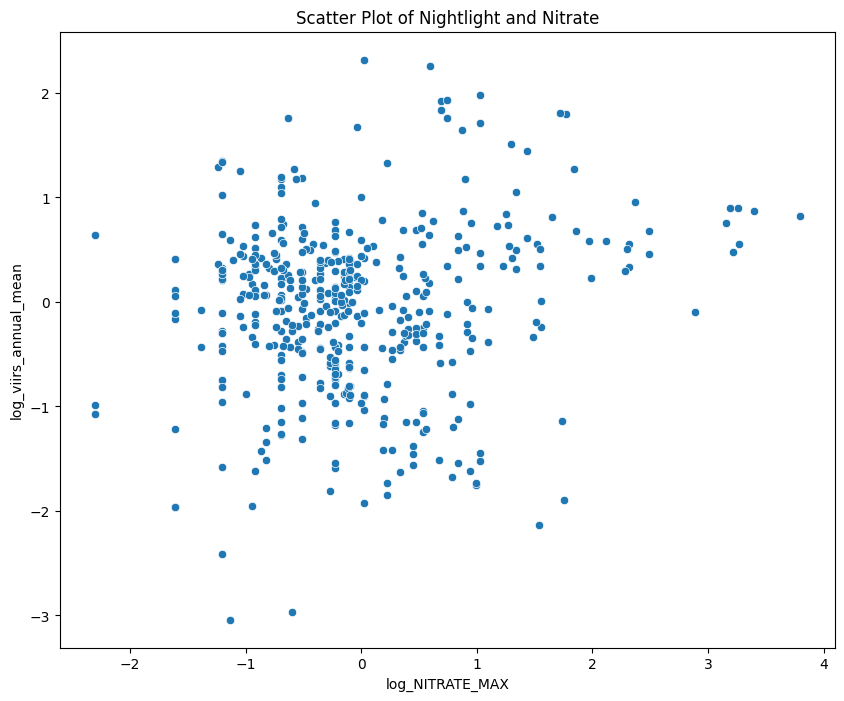

In [235]:
#Plot a scatter plot of the two variables: log nitrate and log nightlight
# Assuming df is your DataFrame
df = data.copy()
#Check for infs or Nan values
inf_mask = np.isfinite(df['log_NITRATE_MAX']) & np.isfinite(df['log_viirs_annual_mean'])
df = df[inf_mask]

# Plot the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='log_NITRATE_MAX', y='log_viirs_annual_mean', data=df)
plt.title('Scatter Plot of Nightlight and Nitrate')
plt.show()


In [253]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

df = data.copy()

features = ['log_NITRATE_MAX', 'log_TEMPERATURE_MAX', 'log_pH_Max', 'log_FECAL_COLIFORM_MAX', 'log_BIO_CHEMICAL_OXYGEN_DEMAND_Max']
covariates = ['District', 'Year']

#Check for infs or Nan values
inf_mask = np.isfinite(df['log_NITRATE_MAX']) & np.isfinite(df['log_TEMPERATURE_MAX']) & np.isfinite(df['log_pH_Max']) & np.isfinite(df['log_FECAL_COLIFORM_MAX']) & np.isfinite(df['log_BIO_CHEMICAL_OXYGEN_DEMAND_Max'])
df = df[inf_mask]

# Create a treatment variable (e.g., pollution level) and an outcome variable (e.g., nightlight intensity)
treatment = 'log_BIO_CHEMICAL_OXYGEN_DEMAND_Max'
outcome = 'log_viirs_annual_mean'

# --- Propensity Score Matching (PSM) ---
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df[features + covariates], df[[treatment, outcome]], test_size=0.2, random_state=42)


# Fit a logistic regression model to predict the treatment variable
model = LogisticRegression()
model.fit(X_train[features], X_train[treatment])

# Predict the treatment variable for the test set
X_test['Treatment'] = model.predict(X_test[features])

# Fit a linear regression model to predict the outcome variable
model = LinearRegression()

# Fit the model on the training set
model.fit(X_train[X_train['Treatment'] == 1][features], X_train[X_train['Treatment'] == 1][outcome])

# Predict the outcome variable for the test set
X_test['Outcome'] = model.predict(X_test[features])

# Compute the MSE
mse = mean_squared_error(X_test[X_test['Treatment'] == 0][outcome], X_test[X_test['Treatment'] == 0]['Outcome'])
print(f"MSE: {mse}")

# --- Nearest Neighbor Matching (NNM) ---
# Fit a NearestNeighbors model
model = NearestNeighbors()
model.fit(X_train[features])

# Find the nearest neighbors for each observation in the test set
distances, indices = model.kneighbors(X_test[features])

# Compute the average outcome for the nearest neighbors
X_test['Outcome'] = X_train.iloc[indices.flatten()][outcome].mean(axis=1)

# Compute the MSE
mse = mean_squared_error(X_test[X_test['Treatment'] == 0][outcome], X_test[X_test['Treatment'] == 0]['Outcome'])
print(f"MSE: {mse}")



ValueError: Unknown label type: 'continuous'